In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import numpy as np
plt.style.use('seaborn-dark')

In [3]:
bbrd_fits_file_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*MM.fits")
bbrd_csv_file_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*map.csv")
bbrd_combo_df = pd.read_csv('/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/bbrd_combo.csv')
print(bbrd_combo_df.shape)
bbrd_combo_df.head()

(26744, 76)


Unnamed: 0  Unnamed: 0.1  HALPHA  HALPHA KCORR  HBETA KCORR  NII6585 KCORR  \
0           0             0     NaN           NaN          NaN            NaN   
1           1             1     NaN           NaN          NaN            NaN   
2           2             2     NaN           NaN          NaN            NaN   
3           3             3     NaN           NaN          NaN            NaN   
4           4             4     NaN           NaN          NaN            NaN   

   OII3727 KCORR  OII3729 KCORR  OIII5008 KCORR  SII6718 KCORR  ...  \
0            NaN            NaN             NaN            NaN  ...   
1            NaN            NaN             NaN            NaN  ...   
2            NaN            NaN             NaN            NaN  ...   
3            NaN            NaN             NaN            NaN  ...   
4            NaN            NaN             NaN            NaN  ...   

   DAP_D4000_IVAR  DAP_DN4000_IVAR  DAP_HDELTAA_IVAR  DAP_HDELTAF_IVAR  \
0             NaN              NaN               NaN               NaN   
1             NaN              NaN               NaN               NaN   
2             NaN              NaN               NaN               NaN   
3             NaN              NaN               NaN               NaN   
4             NaN              NaN               NaN               NaN   

      R_KPC  GASVEL_DISP  GASVEL_ERR_DISP  STARVEL_DISP1  STARVEL_DISP2  \
0  9.873321          NaN              NaN            NaN            NaN   
1  9.586238          NaN              NaN            NaN            NaN   
2  9.316042          NaN              NaN            NaN            NaN   
3  9.064243          NaN              NaN            NaN            NaN   
4  8.832416          NaN              NaN            NaN            NaN   

   STARVEL_DISPERR  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  

[5 rows x 76 columns]

In [4]:
# bbrd_combo_df.replace(0.0, np.nan, inplace=True)

In [5]:
def radial_intergration(df, radius_series_str, min, max):
    spaxels_lessthan_max_df = df[df[radius_series_str] <= max]
    spaxels_btwminmax_df = spaxels_lessthan_max_df[spaxels_lessthan_max_df[radius_series_str] >= min]
    return spaxels_btwminmax_df
    # spaxels_btwminmax_df, spaxels_btwminmax_df.sum(), spaxels_btwminmax_df.median(), spaxels_btwminmax_df.mean(), spaxels_btwminmax_df.std(), spaxels_btwminmax_df.mode()


In [6]:
def dataframe_reff_bin_med_dist(df, ydata0_series_str, ydata0err_series_str, bins):
    '''
    Drop nan values for a given series in a given dataframe generated from MM_fits script and bins the values into predetermined radial bins. 
    The function also provides dataframes of the spaxels of central and disk region by a predetermeined radii
    '''
    # Replace lower values of working with Age
    if ydata0_series_str == 'GYR_LW':
    # df = df.copy()
        df[df[ydata0_series_str] < 5.0] = np.nan
    # df.head()
    else:
        pass
    
    
    df.dropna(subset=[ydata0_series_str, ydata0err_series_str, 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)

    # Make central spaxels dataframe from Combo
    central_spaxels_df = radial_intergration(df=df, radius_series_str='R/REFF', min=0.0, max=0.5)
    outer_spaxels_df = radial_intergration(df=df, radius_series_str='R/REFF', min=0.5, max=1.5)


    # Read in radial data
    xdata0 = df['R/REFF']

    # Properties for raidal profile
    ydata0 = df[ydata0_series_str]
    ydata0_err = df[ydata0err_series_str] # property error


    ###### R/Reff
    # Bin xdata and ydata into even bins of R/Reff and take median value
    # bins = np.linspace(0, 2, 16)
    digitized = np.digitize(xdata0, bins)
    xdata0_reffbin_meds = [xdata0[digitized == i].median() for i in range(1, len(bins))]
    ydata0_reffbin_meds = [ydata0[digitized == i].median() for i in range(1, len(bins))]

    # Error binning into even bins of R/Reff
    ydata0_err_reffbin_meds = [ydata0_err[digitized == i].median() for i in range(1, len(bins))]

    return xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df

In [7]:
def df_reff_bin_mean_dist(df, xdata0_series_str, ydata0_series_str, ydata0err_series_str, bins):
    '''
    Drop nan values for a given series in a given dataframe generated from MM_fits script and bins the values into predetermined radial bins. 
    The function also provides dataframes of the spaxels of central and disk region by a predetermeined radii
    '''
    # Replace lower values of working with Age
    if ydata0_series_str == 'GYR_LW':
    # df = df.copy()
        df[df[ydata0_series_str] < 8.5] = np.nan
    # df.head()
    else:
        pass
    
    
    df.dropna(subset=[xdata0_series_str, ydata0_series_str, ydata0err_series_str, 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)

    # # Make central spaxels dataframe from Combo
    # central_spaxels_df = radial_intergration(df=df, radius_series_str=xdata0_series_str, min=0.0, max=0.5)
    # outer_spaxels_df = radial_intergration(df=df, radius_series_str=xdata0_series_str, min=0.5, max=1.5)


    # Read in radial data
    xdata0 = df[xdata0_series_str]

    # Properties for raidal profile
    ydata0 = df[ydata0_series_str]
    ydata0_err = df[ydata0err_series_str] # property error


    ###### R/Reff
    # Bin xdata and ydata into even bins of R/Reff and take median value
    # bins = np.linspace(0, 2, 16)
    digitized = np.digitize(xdata0, bins)
    xdata0_binned_mean = [xdata0[digitized == i].max() for i in range(1, len(bins))]
    ydata0_binned_mean = [ydata0[digitized == i].mean() for i in range(1, len(bins))]

    # Error binning into even bins of R/Reff
    ydata0_err_binned_mean = [ydata0_err[digitized == i].median() for i in range(1, len(bins))]

    return xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df #, central_spaxels_df, outer_spaxels_df

In [8]:
# xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(df, xdata0_series_str, ydata0_series_str, ydata0err_series_str, bins)

In [9]:
def weighted_avg_binning(xdata_str, ydata_str, bins, csv_file_list):



    # Create a new CSV file to store the BreakBRd weights
    bbrd_weight_df = pd.DataFrame()
    # Create a CSV to store all the weights and averages of a bin for each galaxy
    bbrd_weighted_avgs_df = pd.DataFrame()

    for csv_file_path in csv_file_list:
        # Remove the merger and AGN galaxy from the Combo csv file and adds AGn to there own csv 
        if (csv_file_path == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/9183-3703_map.csv"
            or csv_file_path == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/11827-1902_map.csv"
            or csv_file_path == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8595-3703_map.csv"
            ):
            pass
        
        else:
            # print(csv_file_path)
            bbrd_df = pd.read_csv(csv_file_path)
                # Replace bad age values
            if ydata_str == 'GYR_LW':
            # df = df.copy()
                bbrd_df[bbrd_df[ydata_str] < 5.0] = np.nan
            # df.head()
            else:
                pass
            
            # Copy the combo csv to drop nan values but keep the combo_df from changing
            bbrd_combo_cp_df = bbrd_df.copy()
            bbrd_combo_cp_df.replace([np.inf, -np.inf], np.nan, inplace=True)
            bbrd_combo_cp_df.dropna(subset=[xdata_str, ydata_str, 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)
            
            # Read in x and y data
            xdata = bbrd_combo_cp_df[xdata_str]
            ydata = bbrd_combo_cp_df[ydata_str]

            # remove inf values from ydata
            

            # Start binning
            digitized = np.digitize(xdata, bins)

            # Interate through each file to collect the total number of spaxels from each gaalxy in each in bin (the weight of each galaxy in a bin)
            #     # Create a new CSV file to store the BreakBRd weights
            # bbrd_weight_df = pd.DataFrame()
            # # Create a CSV to store all the weights and averages of a bin for each galaxy
            # bbrd_weighted_avgs_df = pd.DataFrame()

            # Empty list to store weights  and weights*avg values
            ydata_bin_weight = []
            ydata_w_avg_per_bin = []
            # count = np.isinf(ydata).values.sum()
            # print("It contains " + str(count) + " infinite values")
            for i in range(1, len(bins)):
                
                ydata_bin_spax = ydata[digitized == i]
                ydata_bin_weight.append(len(ydata_bin_spax))
                # print(np.mean(ydata_bin_spax), len(ydata_bin_spax))
                ydata_w_avg_per_bin.append(np.mean(ydata_bin_spax) * len(ydata_bin_spax))
                
            # Appends weights to a dataframe
            bbrd_weight_df[csv_file_path[-19:]] = ydata_bin_weight
            bbrd_weighted_avgs_df[csv_file_path[-19:]] = ydata_w_avg_per_bin

    # Adds the total number of spaxels in a bin (Denominator)
    
    
    bbrd_weight_df['Total # spaxels in bin'] = bbrd_weight_df.sum(axis=1)

    # Sums of all the weights (Numerator)
    # bbrd_weighted_avgs_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    bbrd_weighted_avgs_df['Sum of w*avg in bin'] = bbrd_weighted_avgs_df.sum(axis=1)
    # weighted_average radial profile
    bbrd_ydata_w_avgs = bbrd_weighted_avgs_df['Sum of w*avg in bin'] / bbrd_weight_df['Total # spaxels in bin']
    xdata_bin_spax = [xdata[digitized == i].max() for i in range(1, len(bins))]

    return xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df



In [53]:
bbrd_csv_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv")
bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str='R/REFF', ydata_str='LOGSFR DENSITY', bins=np.linspace(0, 1.8, 12), csv_file_list=bbrd_csv_list)

In [54]:
bbrd_weighted_avgs_df.head(14)

/12094-1901_map.csv  /10217-6103_map.csv  /11758-1901_map.csv  \
0             -1.076309            -2.588069            -0.525750   
1             -8.941010           -11.639730            -2.120435   
2            -17.234770           -21.238788            -3.621886   
3            -25.153599           -31.021379            -6.970278   
4            -43.389352           -53.907209           -14.575068   
5            -55.436842           -80.271042           -12.653024   
6            -86.064871          -109.434384           -29.539765   
7           -123.057297          -156.062087           -41.216320   
8           -148.082019          -229.919728           -43.085880   
9           -184.471176          -237.164311           -54.262668   
10          -197.108130          -301.263889           -72.911578   

    s/9894-3703_map.csv  s/8565-1902_map.csv  s/8254-1902_map.csv  \
0             -3.346016            -0.759138            -0.696162   
1             -8.680986            -3.164460            -5.886572   
2            -19.399465            -5.209934            -5.028201   
3            -43.585350            -9.919043           -11.011058   
4            -66.170153           -18.848873           -17.190222   
5           -103.118782           -20.278257           -25.137393   
6           -152.792779           -33.320841           -29.392016   
7           -223.935033           -47.884775           -49.451028   
8           -246.234136           -58.358659           -44.320096   
9           -345.361709           -66.173702           -70.582985   
10          -297.841590           -99.251236           -92.636474   

    s/8465-9102_map.csv  /8550-12703_map.csv  /11760-1902_map.csv  \
0            -16.719536           -24.048429            -0.571841   
1            -69.109108          -102.577370                  NaN   
2           -178.567636          -231.198717            -3.826613   
3           -345.183571          -345.211015            -1.292229   
4           -562.012854          -425.706728            -9.349015   
5           -710.327699          -582.801075            -1.860257   
6           -988.622661          -945.314936           -13.561734   
7          -1190.195908         -1233.976860            -7.706152   
8          -1388.949826         -1645.633326           -19.279694   
9          -1303.854618         -1818.800640           -12.792620   
10          -635.023214         -1666.934424           -26.315554   

    /10001-3702_map.csv  /8312-12704_map.csv  Sum of w*avg in bin  
0             -3.424025           -25.743011           -79.498285  
1            -12.789354           -95.791254          -320.700279  
2            -32.607529          -199.162234          -717.095772  
3            -61.212568          -343.930739         -1224.490828  
4            -87.396295          -474.208891         -1772.754660  
5           -156.244497          -632.460591         -2380.589460  
6           -230.163357          -922.590992         -3540.798336  
7           -273.427614         -1045.311413         -4392.224488  
8           -426.873605         -1106.221587         -5356.958555  
9           -466.453361          -998.426653         -5558.344443  
10          -345.591269          -769.885944         -4504.763303

In [26]:
bbrd_combo_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'HALPHA', 'HALPHA KCORR', 'HBETA KCORR',
       'NII6585 KCORR', 'OII3727 KCORR', 'OII3729 KCORR', 'OIII5008 KCORR',
       'SII6718 KCORR', 'SII6732 KCORR', 'HALPHA SNR', 'HBETA SNR',
       'NII6585 SNR', 'OII3727 SNR', 'OII3729 SNR', 'OIII5008 SNR',
       'SII6718 SNR', 'SII6732 SNR', 'HALPHA ERROR', 'HBETA ERROR',
       'NII6585 ERROR', 'OII3727 ERROR', 'OII3729 ERROR', 'OIII5008 ERROR',
       'SII6718 ERROR', 'SII6732 ERROR', 'HALPHA_DQ', 'HA/HB', 'HA LUM',
       'LOGSFR', 'LOGSFR DENSITY', 'ELLIP R', 'R/REFF', 'LOG(O/H)+12_[N2O2]',
       'LOG(O/H)+12_[O3N2]', 'LOG(O/H)+12_[N2]', 'GYR_LW', 'GYR_MW', 'GYR_ERR',
       'SP_ZSUBL', 'SP_ZSUBM', 'SP_ZERR', 'VEL_KM/S', 'VEL_ERR]', 'VDISP_KM/S',
       'VDISP_ERR', 'M/L', 'MSUN/SPX2', 'MSUN/ARCS2', 'MSUN_ERR', 'D4000',
       'D4000_ERR', 'HDELTA', 'HDELTA_ERR', 'O3HB_RATIO', 'N2HA_RATIO',
       'BPT_CLASS', 'B20_DELTASFR', 'B20_SFRD', 'B20_SFRD_UPLIM',
       'B20_SFRD_LOWLIM', 'DAP_D4000', 'DA

In [29]:
np.isinf(bbrd_combo_df['LOGSFR DENSITY']).unique()

array([False])

# D4000 Radial Profile

In [11]:
# # Subplot
# fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), constrained_layout=True, dpi=300, sharey=True)



# # Copy the combo csv to drop nan values but keep the combo_df from changing
# bbrd_combo_cp_df = bbrd_combo_df.copy()
# xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_combo_cp_df, 'R/REFF', 'DAP_DN4000', 'DAP_DN4000_IVAR', np.linspace(0, 1.8, 12))# bbrd_combo_cp_df.dropna(subset=['DAP_DN4000', 'DAP_D4000', 'D4000', 'DAP_DN4000_IVAR', 'DAP_D4000_IVAR', 'D4000_ERR', 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)

# # DN4000 weighted Average radial profile (reff)
# bbrd_csv_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv")
# bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str='R/REFF', ydata_str='DAP_DN4000', bins=np.linspace(0, 3, 12), csv_file_list=bbrd_csv_list)

# # AX0
# sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax0, color='grey', label=r'All DAP $D_{n}4000$')
# sns.lineplot(bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, ax=ax0, marker="o", color='blue', alpha=1.0, label=r'Frequency-Weighted $D_{n}4000$ profile', linewidth=5)
# ax0.hlines(1.4, 0, 3, color='red')
# ax0.grid(True)
# ax0.set_xlim(0, 2.5)
# ax0.set_ylim(0.5, 1.9)
# ax0.tick_params(axis='x', labelsize=18)
# ax0.tick_params(axis='y', labelsize=18)
# ax0.set_xlabel(r'$R/R_{eff}$', fontsize=18)
# ax0.set_ylabel(r'$D_{n}$4000 Index', fontsize=18)
# ax0.legend(ncol=1, fontsize=12)


# #AX1
# bbrd_combo_cp_df = bbrd_combo_df.copy()
# xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_combo_cp_df, 'ELLIP R', 'DAP_DN4000', 'DAP_DN4000_IVAR', np.linspace(0, 16, 16))# bbrd_combo_cp_df.dropna(subset=['DAP_DN4000', 'DAP_D4000', 'D4000', 'DAP_DN4000_IVAR', 'DAP_D4000_IVAR', 'D4000_ERR', 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)

# # DN4000 weighted Average radial profile (reff)
# bbrd_csv_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv")
# bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str='ELLIP R', ydata_str='DAP_DN4000', bins=np.linspace(0, 16, 16), csv_file_list=bbrd_csv_list)

# sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax1, color='grey', label=r'All DAP $D_{n}4000$', legend=False)
# sns.lineplot(bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, ax=ax1, marker="o", color='blue', alpha=1.0, label=r'Frequency-Weighted Avg $D_{n}4000$ profile', linewidth=5, legend=False)
# ax1.hlines(1.4, 0, 20, color='red')
# ax1.grid(True)
# ax1.set_xlim(0, 18)
# ax1.tick_params(axis='x', labelsize=18)
# # ax1.set_ylim(0.8, 1.6)
# ax1.set_xlabel(r'$R[arcsec]$', fontsize=18)
# # ax1.set_ylabel('D4000 Index')
# # g._legend.remove()

# # AX2
# # Make central spaxels dataframe from Combo
# central_reff_spaxels_df = radial_intergration(df=df, radius_series_str='R/REFF', min=0.0, max=0.5)
# outer_reff_spaxels_df = radial_intergration(df=df, radius_series_str='R/REFF', min=0.5, max=1.5)
# sns.distplot(central_reff_spaxels_df['DAP_DN4000'], bins=30, ax=ax2, kde=False, color='blue', hist_kws={"histtype": "step", "linewidth": 3, "alpha":0.5}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
# sns.distplot(outer_reff_spaxels_df['DAP_DN4000'], bins=75, ax=ax2, kde=False, color='blue', hist_kws={"histtype": "step", "linewidth": 3,  "alpha":1.0}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')
# ax2.hlines(1.4, 0, 2000, color='red')
# # ax2.hlines(np.mean(central_reff_spaxels_df['DAP_DN4000']), 0, 300, color='blue', linestyle='--', label=r'Central Mean ($\mu$)')
# ax2.hlines(np.mean(central_reff_spaxels_df['DAP_DN4000']), 0, 2000, color='blue', alpha=0.5, linestyle='--', label=r'Central Mean ($\mu$)')
# ax2.hlines(np.mean(outer_reff_spaxels_df['DAP_DN4000']), 0, 2000, color='blue', alpha=1.0, linestyle='--', label=r'Outer Mean ($\mu$)')
# ax2.set_xlim(0, 300)
# ax2.grid(True)
# ax2.set_xlabel('Count', fontsize=18)
# ax2.set_ylabel(' ')
# ax2.tick_params(axis='x', labelsize=18)
# ax2.legend(fontsize=14)
# plt.tight_layout()

# # Interate through all BBRD dataframes and plots indivdual the profiles in subplots
# for bbrd_csv in glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv"):
#     # Remove the merger and AGN galaxy from the Combo csv file and adds AGn to there own csv 
#     if (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/9183-3703_map.csv"
#         or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/11827-1902_map.csv"
#         or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8595-3703_map.csv"
#         ):
#         pass

#     # elif (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8312-12704_map.csv"
#     #     or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8465-9102_map.csv"
#     #     or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8550-12703_map.csv"
#     #     ):
#     #     bbrd_df = pd.read_csv(bbrd_csv)
#     #     bbrd_copy_df = bbrd_df.copy()
#     #     xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_copy_df, 'DAP_DN4000', 'DAP_D4000_IVAR', bins = np.linspace(0, 1.8, 12))
#     #     print(bbrd_csv, len(ydata0))
#     #     print(' ')
#     #     sns.lineplot(xdata0_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='purple', alpha=0.5, legend=False, linewidth=3)

#     else:
#         # print(bbrd_csv)
#         bbrd_df = pd.read_csv(bbrd_csv)
#         bbrd_copy_df = bbrd_df.copy()
#         # bbrd_combo_cp_df.dropna(subset=['DAP_DN4000', 'DAP_D4000', 'D4000', 'DAP_DN4000_IVAR', 'DAP_D4000_IVAR', 'D4000_ERR', 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)
#         xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_copy_df, 'R/REFF', 'DAP_DN4000', 'DAP_DN4000_IVAR', np.linspace(0, 2.5, 12))# 
#         sns.lineplot(xdata0_binned_mean, ydata0_binned_mean, ax=ax0, color='blue', alpha=0.2, legend=False, linewidth=3)

#         xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_copy_df, 'ELLIP R', 'DAP_DN4000', 'DAP_DN4000_IVAR', np.linspace(0, 16, 16))# 
#         sns.lineplot(xdata0_binned_mean, ydata0_binned_mean, ax=ax1, color='blue', alpha=0.2, legend=False, linewidth=3)


# plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/Dn4000_dist_radpro.jpeg")
# plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/Dn4000_dist_radpro.pdf")

/Users/mmckay/conda/envs/marvin_v2/lib/python3.6/site-packages/ipykernel_launcher.py:80: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


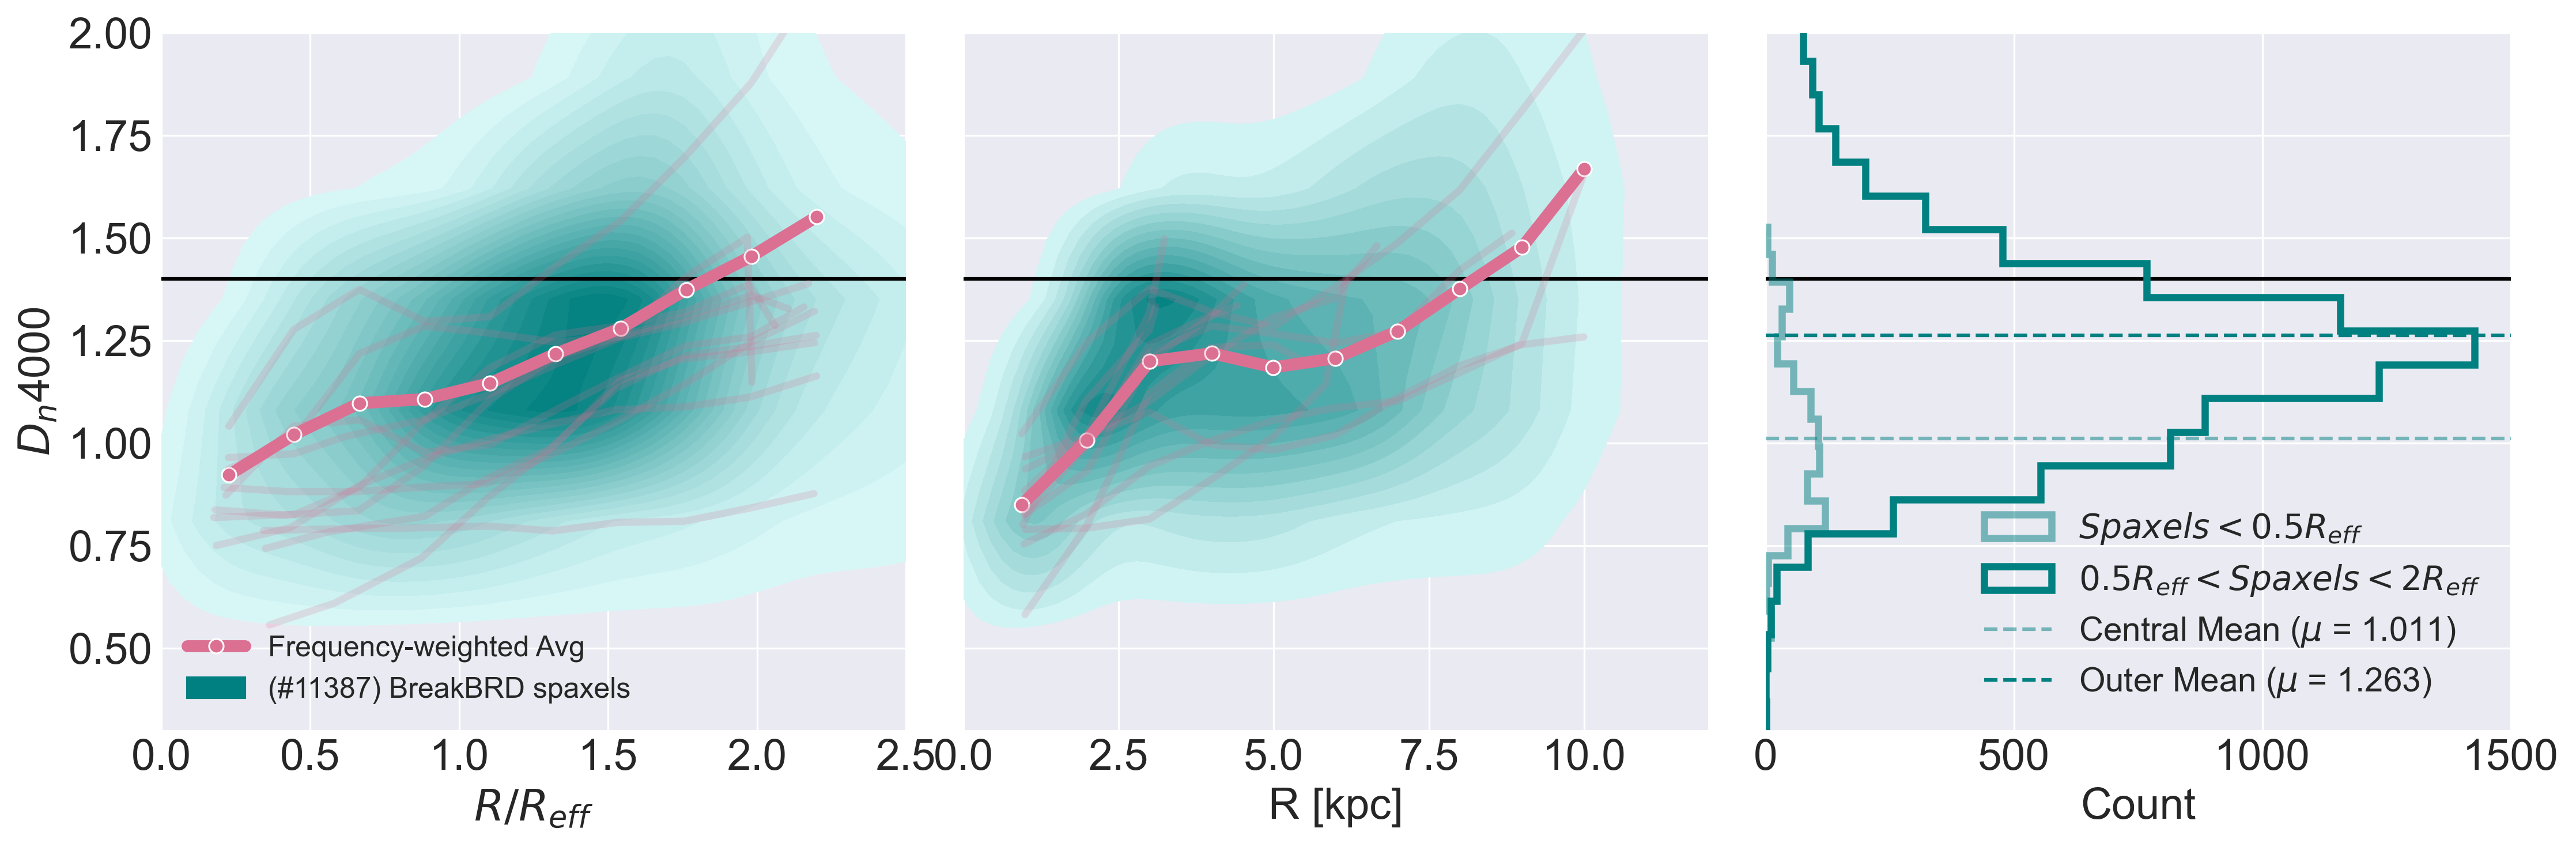

In [55]:
x_reff_str = 'R/REFF'
x_rellip_str = 'R_KPC'
ydata_str = 'DAP_DN4000'
yerr_str = 'GYR_ERR'
# reff_bins = np.linspace(0.2, 3.0, 12)
reff_bins = np.linspace(0.01, 2.2, 11)
rellip_bins = np.linspace(0, 10, 11)


# Subplot
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True, dpi=300, sharey=True)

# Copy the combo csv to drop nan values but keep the combo_df from changing
bbrd_combo_cp_df = bbrd_combo_df.copy()
xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_combo_cp_df, x_reff_str, ydata_str, yerr_str, reff_bins)

# DN4000 weighted Average radial profile (reff)
bbrd_csv_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv")
bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str=x_reff_str, ydata_str=ydata_str, bins=reff_bins, csv_file_list=bbrd_csv_list)
# print(bbrd_weighted_avgs_df.head(20))

# AX0
sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax0, color='teal', label='(#{}) BreakBRD spaxels'.format(len(ydata0)), levels=30)
# sns.scatterplot(xdata0, ydata0, ax=ax0, color='black')
sns.lineplot(bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, ax=ax0, marker="o", color='palevioletred', alpha=1.0, label='Frequency-weighted Avg', linewidth=5)
ax0.hlines(1.4, 0, 3, color='black')
ax0.grid(True)
ax0.set_xlim(0.0, 2.5)
ax0.set_ylim(0.3, 2.0)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_xlabel(r'$R/R_{eff}$', fontsize=18)
ax0.set_ylabel(r'$D_{n}$4000', fontsize=18)
ax0.legend(ncol=1, fontsize=12, loc='lower left')


#AX1
bbrd_combo_cp_df = bbrd_combo_df.copy()
xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_combo_cp_df, x_rellip_str, ydata_str, yerr_str, rellip_bins)

# DN4000 weighted Average radial profile (reff)
bbrd_csv_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv")
bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str=x_rellip_str, ydata_str=ydata_str, bins=rellip_bins, csv_file_list=bbrd_csv_list)
sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax1, color='teal', label=r'$D_{n}$4000 spaxels', legend=False, levels=15)
sns.lineplot(bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, ax=ax1, marker="o", color='palevioletred', alpha=1.0, label=r' ', linewidth=5, legend=False)
ax1.hlines(1.4, 0, 20, color='black') 
ax1.grid(True)
ax1.set_xlim(0, 12)
# ax1.set_ylim(0.8, 1.6)
ax1.tick_params(axis='x', labelsize=18)

#2nd axes
# ax1t = ax1.twiny()
# ax1t.plot(bbrd_combo_cp_df['R_KPC'], ydata0)
# ax1t.set_xlabel('R_kpc')
# ax1t.tick_params(axis='x', labelsize=18)
# ax1t.lines = []
ax1.set_xlabel('R [kpc]', fontsize=18)
# ax1.set_ylabel('D4000 Index')
# g._legend.remove()

# AX2
# Make central spaxels dataframe from Combo 
central_reff_spaxels_df = radial_intergration(df=df, radius_series_str=x_reff_str, min=0.0, max=0.5)
outer_reff_spaxels_df = radial_intergration(df=df, radius_series_str=x_reff_str, min=0.5, max=2.0)
sns.distplot(central_reff_spaxels_df[ydata_str], bins=15, ax=ax2, kde=False, color='teal', hist_kws={"histtype": "step", "linewidth": 3, "alpha":0.5}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(outer_reff_spaxels_df[ydata_str], bins=100, ax=ax2, kde=False, color='teal', hist_kws={"histtype": "step", "linewidth": 3,  "alpha":1.0}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 2 R_{eff}$')
ax2.hlines(1.4, 0, 2000, color='black')
# ax2.hlines(np.mean(central_reff_spaxels_df[ydata_str]), 0, 300, color='palevioletred', linestyle='--', label=r'Central Mean ($\mu$)')
central_mean = np.mean(central_reff_spaxels_df[ydata_str])
outer_mean = np.mean(outer_reff_spaxels_df[ydata_str])
ax2.hlines(np.mean(central_reff_spaxels_df[ydata_str]), 0, 2000, color='teal', alpha=0.5, linestyle='--', label=r'Central Mean ($\mu$ = {})'.format(round(central_mean, 3)))
ax2.hlines(np.mean(outer_reff_spaxels_df[ydata_str]), 0, 2000, color='teal', alpha=1.0, linestyle='--', label=r'Outer Mean ($\mu$ = {})'.format(round(outer_mean, 3)))
ax2.set_xlim(0, 1500)
ax2.grid(True)
ax2.set_xlabel('Count', fontsize=18)
ax2.set_ylabel(' ')
ax2.tick_params(axis='x', labelsize=18)
ax2.legend(fontsize=14, loc='lower right')
plt.tight_layout()

# Interate through all BBRD dataframes and plots indivdual the profiles in subplots
for bbrd_csv in glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv"):
    # Remove the merger and AGN galaxy from the Combo csv file and adds AGn to there own csv 
    if (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/9183-3703_map.csv"
        or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/11827-1902_map.csv"
        or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8595-3703_map.csv"
        ):
        pass

    # elif (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8312-12704_map.csv"
    #     or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8465-9102_map.csv"
    #     or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8550-12703_map.csv"
    #     ):
    #     bbrd_df = pd.read_csv(bbrd_csv)
    #     bbrd_copy_df = bbrd_df.copy()
    #     xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_copy_df, ydata_str, 'DAP_D4000_IVAR', bins = np.linspace(0, 1.8, 12))
    #     print(bbrd_csv, len(ydata0))
    #     print(' ')
    #     sns.lineplot(xdata0_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='grey', alpha=0.5, legend=False, linewidth=3)

    else:
        # print(bbrd_csv)
        bbrd_df = pd.read_csv(bbrd_csv)
        bbrd_copy_df = bbrd_df.copy()
        # bbrd_combo_cp_df.dropna(subset=[ydata_str, 'DAP_D4000', 'D4000', yerr_str, 'DAP_D4000_IVAR', 'D4000_ERR', x_rellip_str, x_reff_str,'R_KPC'], inplace=True)
        xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_copy_df, x_reff_str, ydata_str, yerr_str, reff_bins) 
        sns.lineplot(xdata0_binned_mean, ydata0_binned_mean, ax=ax0, color='palevioletred', alpha=0.2, legend=False, linewidth=3)
        # sns.scatterplot(xdata0, ydata0, ax=ax0)
        xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_copy_df, x_rellip_str, ydata_str, yerr_str, rellip_bins) 
        sns.lineplot(xdata0_binned_mean, ydata0_binned_mean, ax=ax1, color='palevioletred', alpha=0.2, legend=False, linewidth=3)


plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/Dn4000_dist_radpro.jpeg")
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/Dn4000_dist_radpro.pdf")

In [55]:
# Delete
# # # Make central spaxels dataframe
# # central_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.0, max=0.5)
# # outer_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.5, max=1.5)


# # # Read in D4000 data from DAP and Pipe3d
# # ydata0 = bbrd_combo_cp_df['DAP_DN4000']
# # ydata1 = bbrd_combo_cp_df['DAP_D4000']
# # ydata2 = bbrd_combo_cp_df['D4000']

# # # Read in error data
# # ydata0_err = bbrd_combo_cp_df['DAP_DN4000_IVAR']
# # ydata1_err = bbrd_combo_cp_df['DAP_D4000_IVAR']
# # ydata2_err = bbrd_combo_cp_df['D4000_ERR']

# # # Read in radial data
# # xdata0 = bbrd_combo_cp_df['ELLIP R'] # Elliptical radius
# # xdata1 = bbrd_combo_cp_df['R/REFF']
# # xdata2 = bbrd_combo_cp_df['R_KPC']


# # ###### R/Reff
# # # Bin xdata and ydata into even bins of R/Reff and take median value
# # bins = np.linspace(0, 1.8, 12)
# # digitized = np.digitize(xdata1, bins)
# # xdata1_reffbin_meds = [xdata1[digitized == i].median() for i in range(1, len(bins))]
# # ydata0_reffbin_meds = [ydata0[digitized == i].median() for i in range(1, len(bins))]
# # ydata1_reffbin_meds = [ydata1[digitized == i].median() for i in range(1, len(bins))]
# # ydata2_reffbin_meds = [ydata2[digitized == i].median() for i in range(1, len(bins))]

# # # Error binning into even bins of R/Reff
# # ydata0_err_reffbin_meds = [ydata0_err[digitized == i].median() for i in range(1, len(bins))]
# # ydata1_err_reffbin_meds = [ydata1_err[digitized == i].median() for i in range(1, len(bins))]
# # ydata2_err_reffbin_meds = [ydata2_err[digitized == i].median() for i in range(1, len(bins))]


# # Subplot
# fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), constrained_layout=True, dpi=300, sharey=True)


# # AX0
# # Copy the combo csv to drop nan values but keep the combo_df from changing
# bbrd_combo_cp_df = bbrd_combo_df.copy()
# xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_combo_cp_df, 'R/REFF', 'DAP_DN4000_IVAR', 'DAP_DN4000_IVAR', np.linspace(0, 1.8, 12))# bbrd_combo_cp_df.dropna(subset=['DAP_DN4000', 'DAP_D4000', 'D4000', 'DAP_DN4000_IVAR', 'DAP_D4000_IVAR', 'D4000_ERR', 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)

# # DN4000 weighted Average radial profile (reff)
# bbrd_csv_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv")
# bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str='R/REFF', ydata_str='DAP_DN4000', bins=np.linspace(0, 3, 12), csv_file_list=bbrd_csv_list)



# sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax0, color='grey', label=r'All DAP $D_{n}4000$')
# sns.lineplot(bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, ax=ax0, marker="o", color='blue', alpha=1.0, label=r'Frequency-Weighted $D_{n}4000$ profile', linewidth=5)
# # sns.lineplot(xdata1_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='blue', label=r'DAP $D_{n}4000$', linewidth=5)
# # ax0.errorbar(xdata1_reffbin_meds, ydata0_reffbin_meds, yerr=1/np.sqrt(ydata0_err_reffbin_meds), color='blue')
# # sns.lineplot(xdata1_reffbin_meds, ydata1_reffbin_meds, ax=ax0, marker="o", color='cyan', label='DAP D4000', linewidth=5)
# # ax0.errorbar(xdata1_reffbin_meds, ydata1_reffbin_meds, yerr=1/np.sqrt(ydata1_err_reffbin_meds), color='cyan')
# # sns.lineplot(xdata1_reffbin_meds, ydata2_reffbin_meds, ax=ax0, marker="o", color='navy', label='Pipe3D D4000', linewidth=5)
# ax0.hlines(1.4, 0, 3, color='red')
# ax0.grid(True)
# ax0.set_xlim(0, 2.5)
# ax0.set_ylim(0.5, 1.8)
# ax0.tick_params(axis='x', labelsize=18)
# ax0.tick_params(axis='y', labelsize=18)
# ax0.set_xlabel(r'$R/R_{eff}$', fontsize=18)
# ax0.set_ylabel('D4000 Index', fontsize=18)
# ax0.legend(ncol=2, fontsize=12)

# # # AX1

# # ###### Elliptical radius
# # # Bin xdata and ydata into even bins of Elliptical and take median value
# # bins = np.linspace(0, 16, 16)
# # digitized = np.digitize(xdata0, bins)
# # xdata0_elliprbin_meds = [xdata0[digitized == i].median() for i in range(1, len(bins))]
# # ydata0_elliprbin_meds = [ydata0[digitized == i].median() for i in range(1, len(bins))]
# # ydata1_elliprbin_meds = [ydata1[digitized == i].median() for i in range(1, len(bins))]
# # ydata2_elliprbin_meds = [ydata2[digitized == i].median() for i in range(1, len(bins))]

# # # Error binning into even bins of R/Reff
# # ydata0_err_elliprbin_meds = [ydata0_err[digitized == i].median() for i in range(1, len(bins))]
# # ydata1_err_elliprbin_meds = [ydata1_err[digitized == i].median() for i in range(1, len(bins))]
# # ydata2_err_elliprbin_meds = [ydata2_err[digitized == i].median() for i in range(1, len(bins))]

# bbrd_combo_cp_df = bbrd_combo_df.copy()
# xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_combo_cp_df, 'R/REFF', 'DAP_DN4000_IVAR', 'DAP_DN4000_IVAR', np.linspace(0, 1.8, 12))# bbrd_combo_cp_df.dropna(subset=['DAP_DN4000', 'DAP_D4000', 'D4000', 'DAP_DN4000_IVAR', 'DAP_D4000_IVAR', 'D4000_ERR', 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)


# # sns.scatterplot(xdata0, ydata0)
# sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax1, color='grey', label=r'All DAP $D_{n}4000$', legend=False)
# # sns.lineplot(xdata0_elliprbin_meds, ydata0_elliprbin_meds, ax=ax1, marker="o", color='blue', label=r'DAP $D_{n}4000$', legend=False, linewidth=5)
# # ax1.errorbar(xdata0_elliprbin_meds, ydata0_elliprbin_meds, yerr=1/np.sqrt(ydata0_err_elliprbin_meds), color='blue')
# # sns.lineplot(xdata0_elliprbin_meds, ydata1_elliprbin_meds, ax=ax1, marker="o", color='cyan', label='DAP D4000', legend=False, linewidth=5)
# # ax1.errorbar(xdata0_elliprbin_meds, ydata1_elliprbin_meds, yerr=1/np.sqrt(ydata1_err_elliprbin_meds), color='cyan')
# # sns.lineplot(xdata0_elliprbin_meds, ydata2_elliprbin_meds, ax=ax1, marker="o", color='navy', label='Pipe3D D4000', legend=False, linewidth=5)
# ax1.hlines(1.4, 0, 20, color='red')
# ax1.grid(True)
# ax1.set_xlim(0, 18)
# ax1.tick_params(axis='x', labelsize=18)
# # ax1.set_ylim(0.8, 1.6)
# ax1.set_xlabel(r'$R[arcsec]$', fontsize=18)
# # ax1.set_ylabel('D4000 Index')
# # g._legend.remove()


# # AX2
# # ydata0_cp = np.copy(ydata0)
# # ydata0_cp[ydata0_cp==0.0]=np.nan
# # central_cp = np.copy(central_spaxels_df['DAP_DN4000'])
# # central_cp[central_cp==0.0]=np.nan
# # outer_cp = np.copy(outer_spaxels_df['DAP_DN4000'])
# # outer_cp[outer_cp==0.0]=np.nan

# # sns.distplot(ydata0_cp, bins=200, ax=ax2, kde=False, color='blue')
# # Make central spaxels dataframe from Combo
# central_reff_spaxels_df = radial_intergration(df=df, radius_series_str='R/REFF', min=0.0, max=0.5)
# outer_reff_spaxels_df = radial_intergration(df=df, radius_series_str='R/REFF', min=0.5, max=1.5)
# sns.distplot(central_reff_spaxels_df['DAP_DN4000'], bins=30, ax=ax2, kde=False, color='blue', hist_kws={"histtype": "step", "linewidth": 3, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
# sns.distplot(outer_reff_spaxels_df['DAP_DN4000'], bins=75, ax=ax2, kde=False, color='blue', hist_kws={"histtype": "step", "linewidth": 3,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')
# ax2.hlines(1.4, 0, 300, color='red')
# ax2.grid(True)
# ax2.set_xlabel('Count', fontsize=18)
# ax2.set_ylabel(' ')
# ax2.tick_params(axis='x', labelsize=18)
# ax2.legend(fontsize=14)
# plt.tight_layout()

# # # Large BreakBRD galaxies
# # xl_bbrd_df = pd.read_csv('/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/bbrd_xl_combo.csv')
# # xl_bbrd_copy_df = xl_bbrd_df.copy()
# # xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df = dataframe_reff_bin_med_dist(xl_bbrd_copy_df, 'DAP_DN4000', 'DAP_D4000_IVAR', bins = np.linspace(0, 1.8, 12))
# # sns.lineplot(xdata0_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='purple', alpha=1.0, legend=False, linewidth=5)

# # # Mean Radial profile
# # bbrd_mean_df = pd.read_csv('/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/bbrd_combo.csv')
# # bbrd_mean_copy_df = bbrd_mean_df.copy()
# # xdata0, ydata0, ydata0_err, xdata0_reffbin_mean, ydata0_reffbin_mean, ydata0_err_reffbin_mean, central_spaxels_df, outer_spaxels_df = df_reff_bin_mean_dist(bbrd_mean_copy_df, 'DAP_DN4000', 'DAP_D4000_IVAR', bins = np.linspace(0, 1.8, 12))
# # sns.lineplot(xdata0_reffbin_mean, ydata0_reffbin_mean, ax=ax0, marker="o", color='orange', alpha=1.0, legend=False, linewidth=5)


# # DN4000 weighted Average radial profile (r_ellip)
# # bbrd_csv_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv")
# # bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str='ELLIP R', ydata_str='DAP_DN4000', bins = np.linspace(0, 16, 16), csv_file_list=bbrd_csv_list)
# # sns.lineplot(bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, ax=ax1, marker="o", color='red', alpha=1.0, label=r'Frequency-Weighted Avg $D_{n}4000$ profile', linewidth=5)


# # Interate through all BBRD dataframes and plots indivdual the profiles in subplots
# for bbrd_csv in glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv"):
#     # Remove the merger and AGN galaxy from the Combo csv file and adds AGn to there own csv 
#     if (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/9183-3703_map.csv"
#         or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/11827-1902_map.csv"
#         or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8595-3703_map.csv"
#         ):
#         pass

#     # elif (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8312-12704_map.csv"
#     #     or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8465-9102_map.csv"
#     #     or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8550-12703_map.csv"
#     #     ):
#     #     bbrd_df = pd.read_csv(bbrd_csv)
#     #     bbrd_copy_df = bbrd_df.copy()
#     #     xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_copy_df, 'DAP_DN4000', 'DAP_D4000_IVAR', bins = np.linspace(0, 1.8, 12))
#     #     print(bbrd_csv, len(ydata0))
#     #     print(' ')
#     #     sns.lineplot(xdata0_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='purple', alpha=0.5, legend=False, linewidth=3)

#     else:
#         # print(bbrd_csv)
#         bbrd_df = pd.read_csv(bbrd_csv)
#         bbrd_copy_df = bbrd_df.copy()
#         xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df = df_reff_bin_mean_dist(bbrd_copy_df, 'DAP_DN4000', 'DAP_D4000_IVAR', bins = np.linspace(0, 3, 12))
#         # print(bbrd_csv, len(ydata0))
#         sns.lineplot(xdata0_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='blue', alpha=0.2, legend=False, linewidth=3)


# plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/Dn4000_dist_radpro.jpeg")
# plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/Dn4000_dist_radpro.pdf")

# Frequency Weighted Aveage profile

In [56]:
# Delete
# # Create a new CSV file to store the BreakBRd weights
# bbrd_weight_df = pd.DataFrame()

# # Create a CSV to store all the weights and averages of a bin for each galaxy
# bbrd_weighted_avgs_df = pd.DataFrame()


# for bbrd_csv in glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv"):
#     # Remove the merger and AGN galaxy from the Combo csv file and adds AGn to there own csv 
#     if (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/9183-3703_map.csv"
#         or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/11827-1902_map.csv"
#         or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8595-3703_map.csv"
#         ):
#         pass
    
#     else:
#         # print(bbrd_csv)
#         bbrd_df = pd.read_csv(bbrd_csv)
#         # bbrd_copy_df = bbrd_df.copy()

#         # Copy the combo csv to drop nan values but keep the combo_df from changing
#         bbrd_combo_cp_df = bbrd_df.copy()
#         bbrd_combo_cp_df.dropna(subset=['DAP_DN4000', 'DAP_D4000', 'D4000', 'DAP_DN4000_IVAR', 'DAP_D4000_IVAR', 'D4000_ERR', 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)

#         # # Make central spaxels dataframe
#         # central_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.0, max=0.5)
#         # outer_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.5, max=1.5)


#         # Read in D4000 data from DAP and Pipe3d
#         ydata0 = bbrd_combo_cp_df['DAP_DN4000']
#         # ydata1 = bbrd_combo_cp_df['DAP_D4000']
#         # ydata2 = bbrd_combo_cp_df['D4000']

#         # Read in error data
#         ydata0_err = bbrd_combo_cp_df['DAP_DN4000_IVAR']
#         # ydata1_err = bbrd_combo_cp_df['DAP_D4000_IVAR']
#         # ydata2_err = bbrd_combo_cp_df['D4000_ERR']

#         # Read in radial data
#         # xdata0 = bbrd_combo_cp_df['ELLIP R'] # Elliptical radius
#         xdata0 = bbrd_combo_cp_df['R/REFF']
#         # xdata2 = bbrd_combo_cp_df['R_KPC']
        

#         # bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_reff_binning(xdata=xdata0, ydata=ydata0, bins=np.linspace(0, 1.8, 12), csv_file_path=bbrd_csv)

#         bins = np.linspace(0, 1.8, 12)
#         digitized = np.digitize(xdata0, bins)

#         # Interate through each file to collect the total number of spaxels from each gaalxy in each in bin (the weight of each galaxy in a bin)
#         ydata_bin_weight = []
#         ydata_w_avg_per_bin = []
#         for i in range(1, len(bins)):
#             ydata_bin_spax = ydata0[digitized == i]
#             ydata_bin_weight.append(len(ydata_bin_spax))
#             ydata_w_avg_per_bin.append(np.mean(ydata_bin_spax) * len(ydata_bin_spax))
#         # Appends weights to a dataframe
#         bbrd_weight_df[bbrd_csv[-19:]] = ydata_bin_weight
#         bbrd_weighted_avgs_df[bbrd_csv[-19:]] = ydata_w_avg_per_bin

#         # ydata weight*avg for each bin from each galaxy
#         # ydata_w_avg_per_bin = []
#         # for i in range(1, len(bins)):
#         #     ydata_bin_spax = ydata0[digitized == i]
#         #     ydata_w_avg_per_bin.append(np.mean(ydata_bin_spax) * len(ydata_bin_spax))

#         # bbrd_weighted_avgs_df[bbrd_csv[-19:]] = ydata_w_avg_per_bin




# # Adds the total number of spaxels in a bin (Denominator)
# bbrd_weight_df['Total # spaxels in bin'] = bbrd_weight_df.sum(axis=1)

# # Sums of all the weights (Numerator)
# bbrd_weighted_avgs_df['Sum of w*avg in bin'] = bbrd_weighted_avgs_df.sum(axis=1)
# # weighted_average radial profile
# bbrd_ydata_w_avgs = bbrd_weighted_avgs_df['Sum of w*avg in bin'] / bbrd_weight_df['Total # spaxels in bin']

# bbrd_weight_df.head()



# Age Radial profile

In [7]:
bbrd_combo_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'HALPHA', 'HALPHA KCORR', 'HBETA KCORR',
       'NII6585 KCORR', 'OII3727 KCORR', 'OII3729 KCORR', 'OIII5008 KCORR',
       'SII6718 KCORR', 'SII6732 KCORR', 'HALPHA SNR', 'HBETA SNR',
       'NII6585 SNR', 'OII3727 SNR', 'OII3729 SNR', 'OIII5008 SNR',
       'SII6718 SNR', 'SII6732 SNR', 'HALPHA ERROR', 'HBETA ERROR',
       'NII6585 ERROR', 'OII3727 ERROR', 'OII3729 ERROR', 'OIII5008 ERROR',
       'SII6718 ERROR', 'SII6732 ERROR', 'HALPHA_DQ', 'HA/HB', 'HA LUM',
       'LOGSFR', 'LOGSFR DENSITY', 'ELLIP R', 'R/REFF', 'LOG(O/H)+12_[N2O2]',
       'LOG(O/H)+12_[O3N2]', 'LOG(O/H)+12_[N2]', 'GYR_LW', 'GYR_MW', 'GYR_ERR',
       'SP_ZSUBL', 'SP_ZSUBM', 'SP_ZERR', 'VEL_KM/S', 'VEL_ERR]', 'VDISP_KM/S',
       'VDISP_ERR', 'M/L', 'MSUN/SPX2', 'MSUN/ARCS2', 'MSUN_ERR', 'D4000',
       'D4000_ERR', 'HDELTA', 'HDELTA_ERR', 'O3HB_RATIO', 'N2HA_RATIO',
       'BPT_CLASS', 'B20_DELTASFR', 'B20_SFRD', 'B20_SFRD_UPLIM',
       'B20_SFRD_LOWLIM', 'DAP_D4000', 'DA

/Users/mmckay/conda/envs/marvin_v2/lib/python3.6/site-packages/ipykernel_launcher.py:79: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


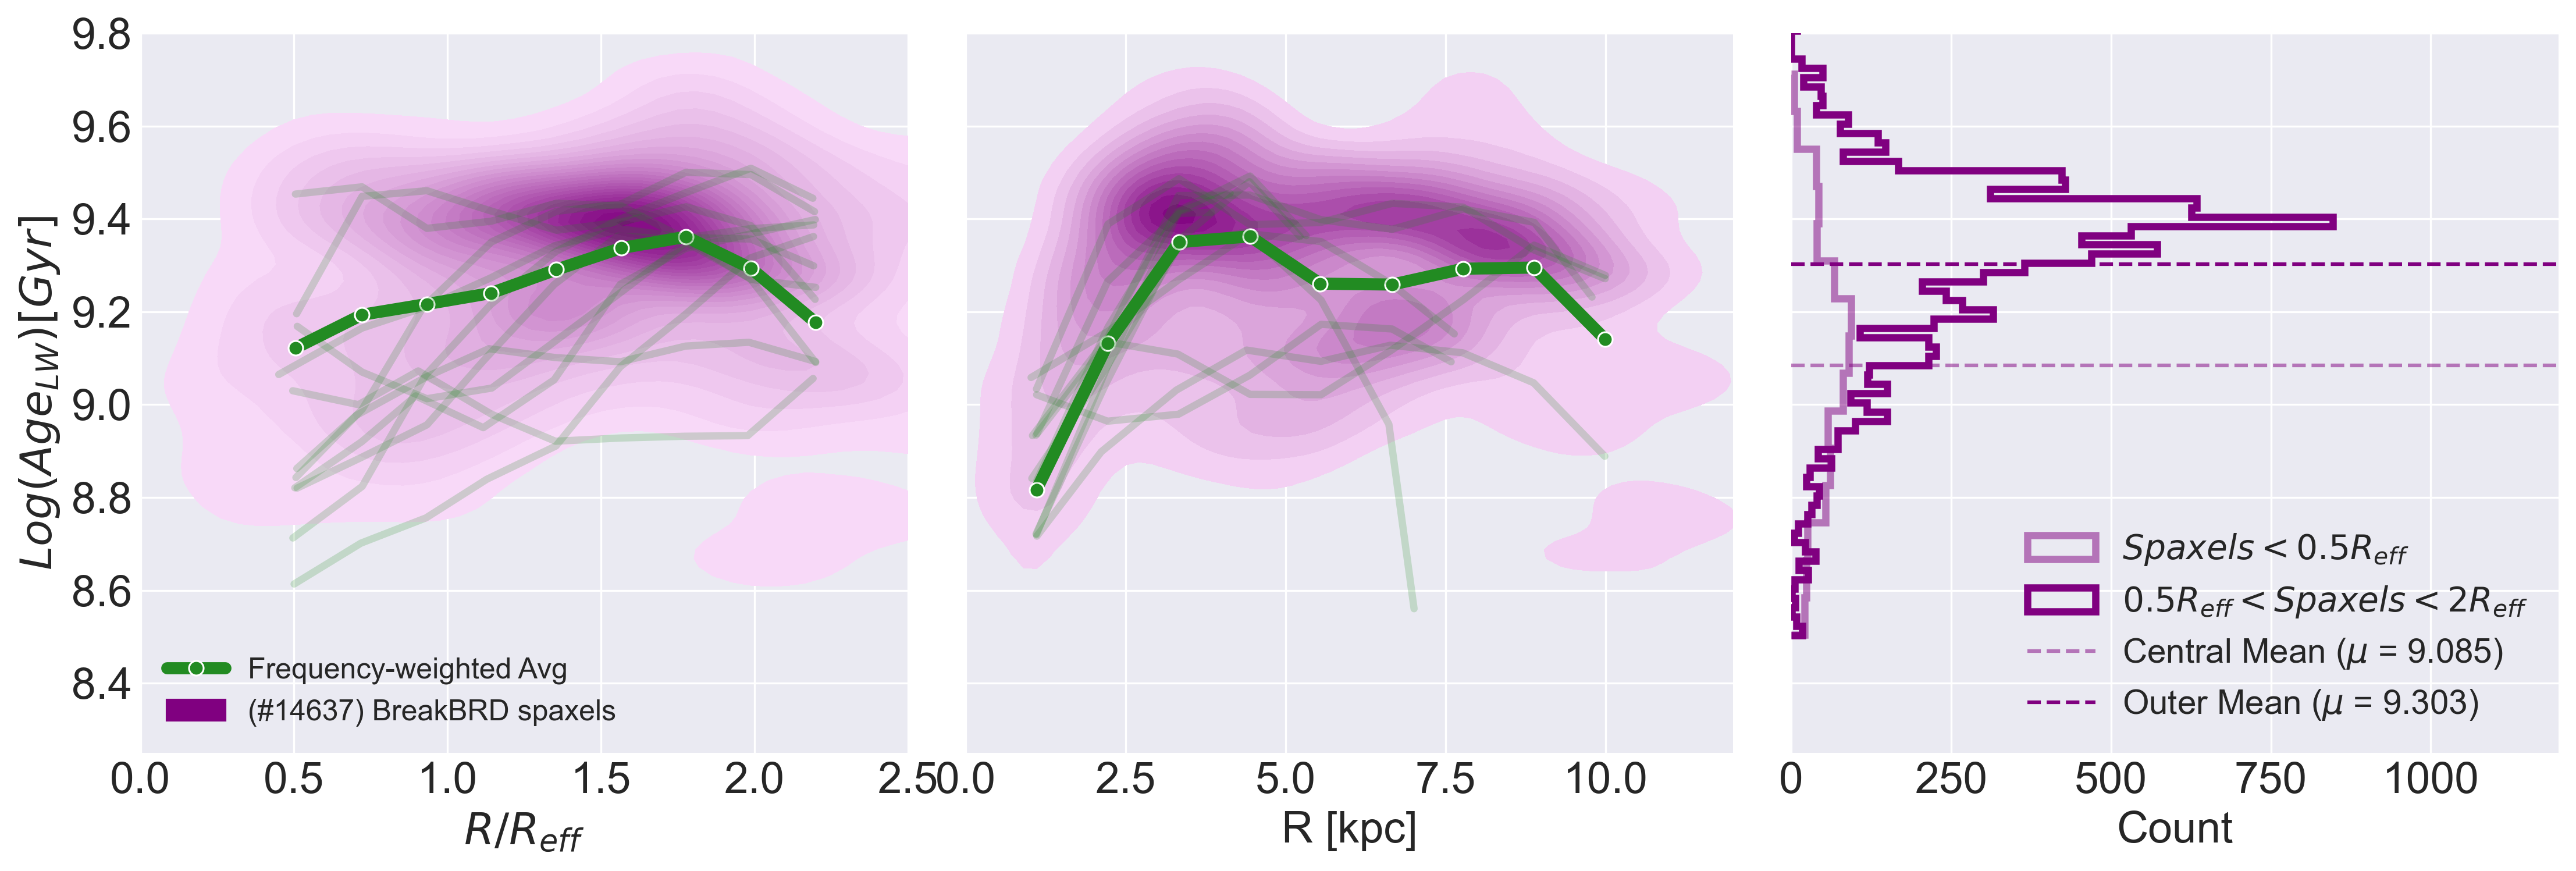

In [13]:
x_reff_str = 'R/REFF'
x_rellip_str = 'R_KPC'
ydata_str = 'GYR_LW'
yerr_str = 'GYR_ERR'
# reff_bins = np.linspace(0.2, 3.0, 12)
reff_bins = np.linspace(0.3, 2.2, 10)
rellip_bins = np.linspace(0, 10, 10)

# Subplot
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True, dpi=300, sharey=True)

# Copy the combo csv to drop nan values but keep the combo_df from changing
bbrd_combo_cp_df = bbrd_combo_df.copy()
xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_combo_cp_df, x_reff_str, ydata_str, yerr_str, reff_bins)

# DN4000 weighted Average radial profile (reff)
bbrd_csv_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv")
bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str=x_reff_str, ydata_str=ydata_str, bins=reff_bins, csv_file_list=bbrd_csv_list)
# print(bbrd_weighted_avgs_df.head(20))

# AX0
sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax0, color='purple', label='(#{}) BreakBRD spaxels'.format(len(ydata0)), levels=30)
# sns.scatterplot(xdata0, ydata0, ax=ax0, color='black')
sns.lineplot(bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, ax=ax0, marker="o", color='forestgreen', alpha=1.0, label='Frequency-weighted Avg', linewidth=5)
ax0.hlines(1.4, 0, 3, color='red')
ax0.grid(True)
ax0.set_xlim(0.0, 2.5)
ax0.set_ylim(8.25, 9.8)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_xlabel(r'$R/R_{eff}$', fontsize=18)
ax0.set_ylabel(r'$Log(Age_{LW}) [Gyr]$', fontsize=18)
ax0.legend(ncol=1, fontsize=12, loc='lower left')


#AX1
bbrd_combo_cp_df = bbrd_combo_df.copy()
xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_combo_cp_df, x_rellip_str, ydata_str, yerr_str, rellip_bins)

# DN4000 weighted Average radial profile (reff)
bbrd_csv_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv")
bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str=x_rellip_str, ydata_str=ydata_str, bins=rellip_bins, csv_file_list=bbrd_csv_list)
sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax1, color='purple', label=r'$Log(Age_{LW}) [Gyr]$', legend=False, levels=15)
sns.lineplot(bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, ax=ax1, marker="o", color='forestgreen', alpha=1.0, label=r' ', linewidth=5, legend=False)
ax1.hlines(1.4, 0, 20, color='red')
ax1.grid(True)
ax1.set_xlim(0, 12)
# ax1.set_ylim(0.8, 1.6)
ax1.tick_params(axis='x', labelsize=18)

#2nd axes
# ax1t = ax1.twiny()
# ax1t.plot(bbrd_combo_cp_df['R_KPC'], ydata0)
# ax1t.set_xlabel('R_kpc')
# ax1t.tick_params(axis='x', labelsize=18)
# ax1t.lines = []
ax1.set_xlabel('R [kpc]', fontsize=18)
# ax1.set_ylabel('D4000 Index')
# g._legend.remove()

# AX2
# Make central spaxels dataframe from Combo 
central_reff_spaxels_df = radial_intergration(df=df, radius_series_str=x_reff_str, min=0.0, max=0.5)
outer_reff_spaxels_df = radial_intergration(df=df, radius_series_str=x_reff_str, min=0.5, max=2.0)
sns.distplot(central_reff_spaxels_df[ydata_str], bins=15, ax=ax2, kde=False, color='purple', hist_kws={"histtype": "step", "linewidth": 3, "alpha":0.5}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(outer_reff_spaxels_df[ydata_str], bins=75, ax=ax2, kde=False, color='purple', hist_kws={"histtype": "step", "linewidth": 3,  "alpha":1.0}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 2 R_{eff}$')
ax2.hlines(1.4, 0, 2000, color='red')
# ax2.hlines(np.mean(central_reff_spaxels_df[ydata_str]), 0, 300, color='purple', linestyle='--', label=r'Central Mean ($\mu$)')
central_mean = np.mean(central_reff_spaxels_df[ydata_str])
outer_mean = np.mean(outer_reff_spaxels_df[ydata_str])
ax2.hlines(np.mean(central_reff_spaxels_df[ydata_str]), 0, 2000, color='purple', alpha=0.5, linestyle='--', label=r'Central Mean ($\mu$ = {})'.format(round(central_mean, 3)))
ax2.hlines(np.mean(outer_reff_spaxels_df[ydata_str]), 0, 2000, color='purple', alpha=1.0, linestyle='--', label=r'Outer Mean ($\mu$ = {})'.format(round(outer_mean, 3)))
ax2.set_xlim(0, 1200)
ax2.grid(True)
ax2.set_xlabel('Count', fontsize=18)
ax2.set_ylabel(' ')
ax2.tick_params(axis='x', labelsize=18)
ax2.legend(fontsize=14, loc='lower right')
plt.tight_layout()

# Interate through all BBRD dataframes and plots indivdual the profiles in subplots
for bbrd_csv in glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv"):
    # Remove the merger and AGN galaxy from the Combo csv file and adds AGn to there own csv 
    if (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/9183-3703_map.csv"
        or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/11827-1902_map.csv"
        or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8595-3703_map.csv"
        ):
        pass

    # elif (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8312-12704_map.csv"
    #     or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8465-9102_map.csv"
    #     or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8550-12703_map.csv"
    #     ):
    #     bbrd_df = pd.read_csv(bbrd_csv)
    #     bbrd_copy_df = bbrd_df.copy()
    #     xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_copy_df, ydata_str, 'DAP_D4000_IVAR', bins = np.linspace(0, 1.8, 12))
    #     print(bbrd_csv, len(ydata0))
    #     print(' ')
    #     sns.lineplot(xdata0_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='purple', alpha=0.5, legend=False, linewidth=3)

    else:
        # print(bbrd_csv)
        bbrd_df = pd.read_csv(bbrd_csv)
        bbrd_copy_df = bbrd_df.copy()
        # bbrd_combo_cp_df.dropna(subset=[ydata_str, 'DAP_D4000', 'D4000', yerr_str, 'DAP_D4000_IVAR', 'D4000_ERR', x_rellip_str, x_reff_str,'R_KPC'], inplace=True)
        xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_copy_df, x_reff_str, ydata_str, yerr_str, reff_bins) 
        sns.lineplot(xdata0_binned_mean, ydata0_binned_mean, ax=ax0, color='forestgreen', alpha=0.2, legend=False, linewidth=3)
        # sns.scatterplot(xdata0, ydata0, ax=ax0)
        xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_copy_df, x_rellip_str, ydata_str, yerr_str, rellip_bins) 
        sns.lineplot(xdata0_binned_mean, ydata0_binned_mean, ax=ax1, color='forestgreen', alpha=0.2, legend=False, linewidth=3)


plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/AgeLW_dist_radpro.jpeg")
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/AgeLW_dist_radpro.pdf")

In [81]:
# # Copy the combo csv to drop nan values but keep the combo_df from changing
# bbrd_combo_cp_df = bbrd_combo_df.copy()
# bbrd_combo_cp_df.dropna(subset=['GYR_LW', 'GYR_ERR', 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)

# # Make central spaxels dataframe
# central_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.0, max=0.5)
# outer_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.5, max=1.5)

# # Read in D4000 data from DAP and Pipe3d
# ydata0 = bbrd_combo_cp_df['GYR_LW']
# # ydata1 = bbrd_combo_cp_df['DAP_D4000']
# # ydata2 = bbrd_combo_cp_df['D4000']

# # Read in error data
# ydata0_err = bbrd_combo_cp_df['GYR_ERR']
# # ydata1_err = bbrd_combo_cp_df['DAP_D4000_IVAR']
# # ydata2_err = bbrd_combo_cp_df['D4000_ERR']

# # Read in radial data
# xdata0 = bbrd_combo_cp_df['ELLIP R'] # Elliptical radius
# xdata1 = bbrd_combo_cp_df['R/REFF']
# xdata2 = bbrd_combo_cp_df['R_KPC']


# ###### R/Reff
# # Bin xdata and ydata into even bins of R/Reff and take median value
# bins = np.linspace(0, 2, 8)
# digitized = np.digitize(xdata1, bins)
# xdata1_reffbin_meds = [xdata1[digitized == i].median() for i in range(1, len(bins))]
# ydata0_reffbin_meds = [ydata0[digitized == i].median() for i in range(1, len(bins))]
# # ydata1_reffbin_meds = [ydata1[digitized == i].median() for i in range(1, len(bins))]
# # ydata2_reffbin_meds = [ydata2[digitized == i].median() for i in range(1, len(bins))]

# # Error binning into even bins of R/Reff
# ydata0_err_reffbin_meds = [ydata0_err[digitized == i].median() for i in range(1, len(bins))]
# # ydata1_err_reffbin_meds = [ydata1_err[digitized == i].median() for i in range(1, len(bins))]
# # ydata2_err_reffbin_meds = [ydata2_err[digitized == i].median() for i in range(1, len(bins))]


# # Subplot
# fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), constrained_layout=True, dpi=300, sharey=True)


# # AX0
# sns.kdeplot(xdata1, ydata0, shade=True, shade_lowest=False, ax=ax0, color='purple', label='BreakBRD sample #{}'.format(len(ydata0)))
# sns.lineplot(xdata1_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='green', label=r'$Median Age_{LW}$', linewidth=5)
# ax0.errorbar(xdata1_reffbin_meds, ydata0_reffbin_meds, yerr=ydata0_err_reffbin_meds, color='green')


# # ax0.hlines(1.4, 0,3, color='red')
# ax0.grid(True)
# ax0.set_xlim(0, 2.5)
# ax0.set_ylim(9.0, 9.8)
# ax0.tick_params(axis='x', labelsize=18)
# ax0.tick_params(axis='y', labelsize=18)
# ax0.set_xlabel(r'$R/R_{eff}$', fontsize=18)
# ax0.set_ylabel(r'$Age_{LW} [Gyr]$', fontsize=18)
# ax0.legend(ncol=1, fontsize=14, loc='upper left')

# # AX1

# ###### Elliptical radius
# # Bin xdata and ydata into even bins of Elliptical and take median value
# bins = np.linspace(0, 15, 15)
# digitized = np.digitize(xdata0, bins)
# xdata0_elliprbin_meds = [xdata0[digitized == i].median() for i in range(1, len(bins))]
# ydata0_elliprbin_meds = [ydata0[digitized == i].median() for i in range(1, len(bins))]
# # ydata1_elliprbin_meds = [ydata1[digitized == i].median() for i in range(1, len(bins))]
# # ydata2_elliprbin_meds = [ydata2[digitized == i].median() for i in range(1, len(bins))]

# # Error binning into even bins of R/Reff
# ydata0_err_elliprbin_meds = [ydata0_err[digitized == i].median() for i in range(1, len(bins))]
# # ydata1_err_elliprbin_meds = [ydata1_err[digitized == i].median() for i in range(1, len(bins))]
# # ydata2_err_elliprbin_meds = [ydata2_err[digitized == i].median() for i in range(1, len(bins))]


# # sns.scatterplot(xdata0, ydata0)
# sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax1, color='purple', label='BreakBRD sample #{}'.format(len(ydata0)), legend=False)
# sns.lineplot(xdata0_elliprbin_meds, ydata0_elliprbin_meds, ax=ax1, marker="o", color='green', label=r'Median $Age_{LW}$', legend=False, linewidth=5)
# ax1.errorbar(xdata0_elliprbin_meds, ydata0_elliprbin_meds, yerr=ydata0_err_elliprbin_meds, color='green')
# ax1.grid(True)
# ax1.set_xlim(0, 20)
# ax1.tick_params(axis='x', labelsize=18)
# ax1.set_xlabel(r'$R[arcsec]$', fontsize=18)


# # AX2
# # ydata0_cp = np.copy(ydata0)
# # ydata0_cp[ydata0_cp==0.0]=np.nan
# # central_cp = np.copy(central_spaxels_df['GYR_LW'])
# # central_cp[central_cp==0.0]=np.nan
# # outer_cp = np.copy(outer_spaxels_df['GYR_LW'])
# # outer_cp[outer_cp==0.0]=np.nan

# # sns.distplot(ydata0_cp, bins=200, ax=ax2, kde=False, color='blue')
# sns.distplot(central_spaxels_df['GYR_LW'], bins=30, ax=ax2, kde=False, color='green', hist_kws={"histtype": "step", "linewidth": 3, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
# sns.distplot(outer_spaxels_df['GYR_LW'], bins=60, ax=ax2, kde=False, color='green', hist_kws={"histtype": "step", "linewidth": 3,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')
# # ax2.hlines(1.4, 0, 300, color='red')
# ax2.grid(True)
# ax2.set_xlabel('Count', fontsize=18)
# ax2.set_ylabel(' ')
# ax2.tick_params(axis='x', labelsize=18)
# ax2.legend(fontsize=14, loc='upper right')

# plt.tight_layout()
# plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/AgeLW_dist_radpro.jpeg")
# plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/AgeLW_dist_radpro.pdf")

# Star Formation Rate Surface Density

In [9]:
bbrd_combo_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'HALPHA', 'HALPHA KCORR', 'HBETA KCORR',
       'NII6585 KCORR', 'OII3727 KCORR', 'OII3729 KCORR', 'OIII5008 KCORR',
       'SII6718 KCORR', 'SII6732 KCORR', 'HALPHA SNR', 'HBETA SNR',
       'NII6585 SNR', 'OII3727 SNR', 'OII3729 SNR', 'OIII5008 SNR',
       'SII6718 SNR', 'SII6732 SNR', 'HALPHA ERROR', 'HBETA ERROR',
       'NII6585 ERROR', 'OII3727 ERROR', 'OII3729 ERROR', 'OIII5008 ERROR',
       'SII6718 ERROR', 'SII6732 ERROR', 'HALPHA_DQ', 'HA/HB', 'HA LUM',
       'LOGSFR', 'LOGSFR DENSITY', 'ELLIP R', 'R/REFF', 'LOG(O/H)+12_[N2O2]',
       'LOG(O/H)+12_[O3N2]', 'LOG(O/H)+12_[N2]', 'GYR_LW', 'GYR_MW', 'GYR_ERR',
       'SP_ZSUBL', 'SP_ZSUBM', 'SP_ZERR', 'VEL_KM/S', 'VEL_ERR]', 'VDISP_KM/S',
       'VDISP_ERR', 'M/L', 'MSUN/SPX2', 'MSUN/ARCS2', 'MSUN_ERR', 'D4000',
       'D4000_ERR', 'HDELTA', 'HDELTA_ERR', 'O3HB_RATIO', 'N2HA_RATIO',
       'BPT_CLASS', 'B20_DELTASFR', 'B20_SFRD', 'B20_SFRD_UPLIM',
       'B20_SFRD_LOWLIM', 'DAP_D4000', 'DA

/Users/mmckay/conda/envs/marvin_v2/lib/python3.6/site-packages/ipykernel_launcher.py:82: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


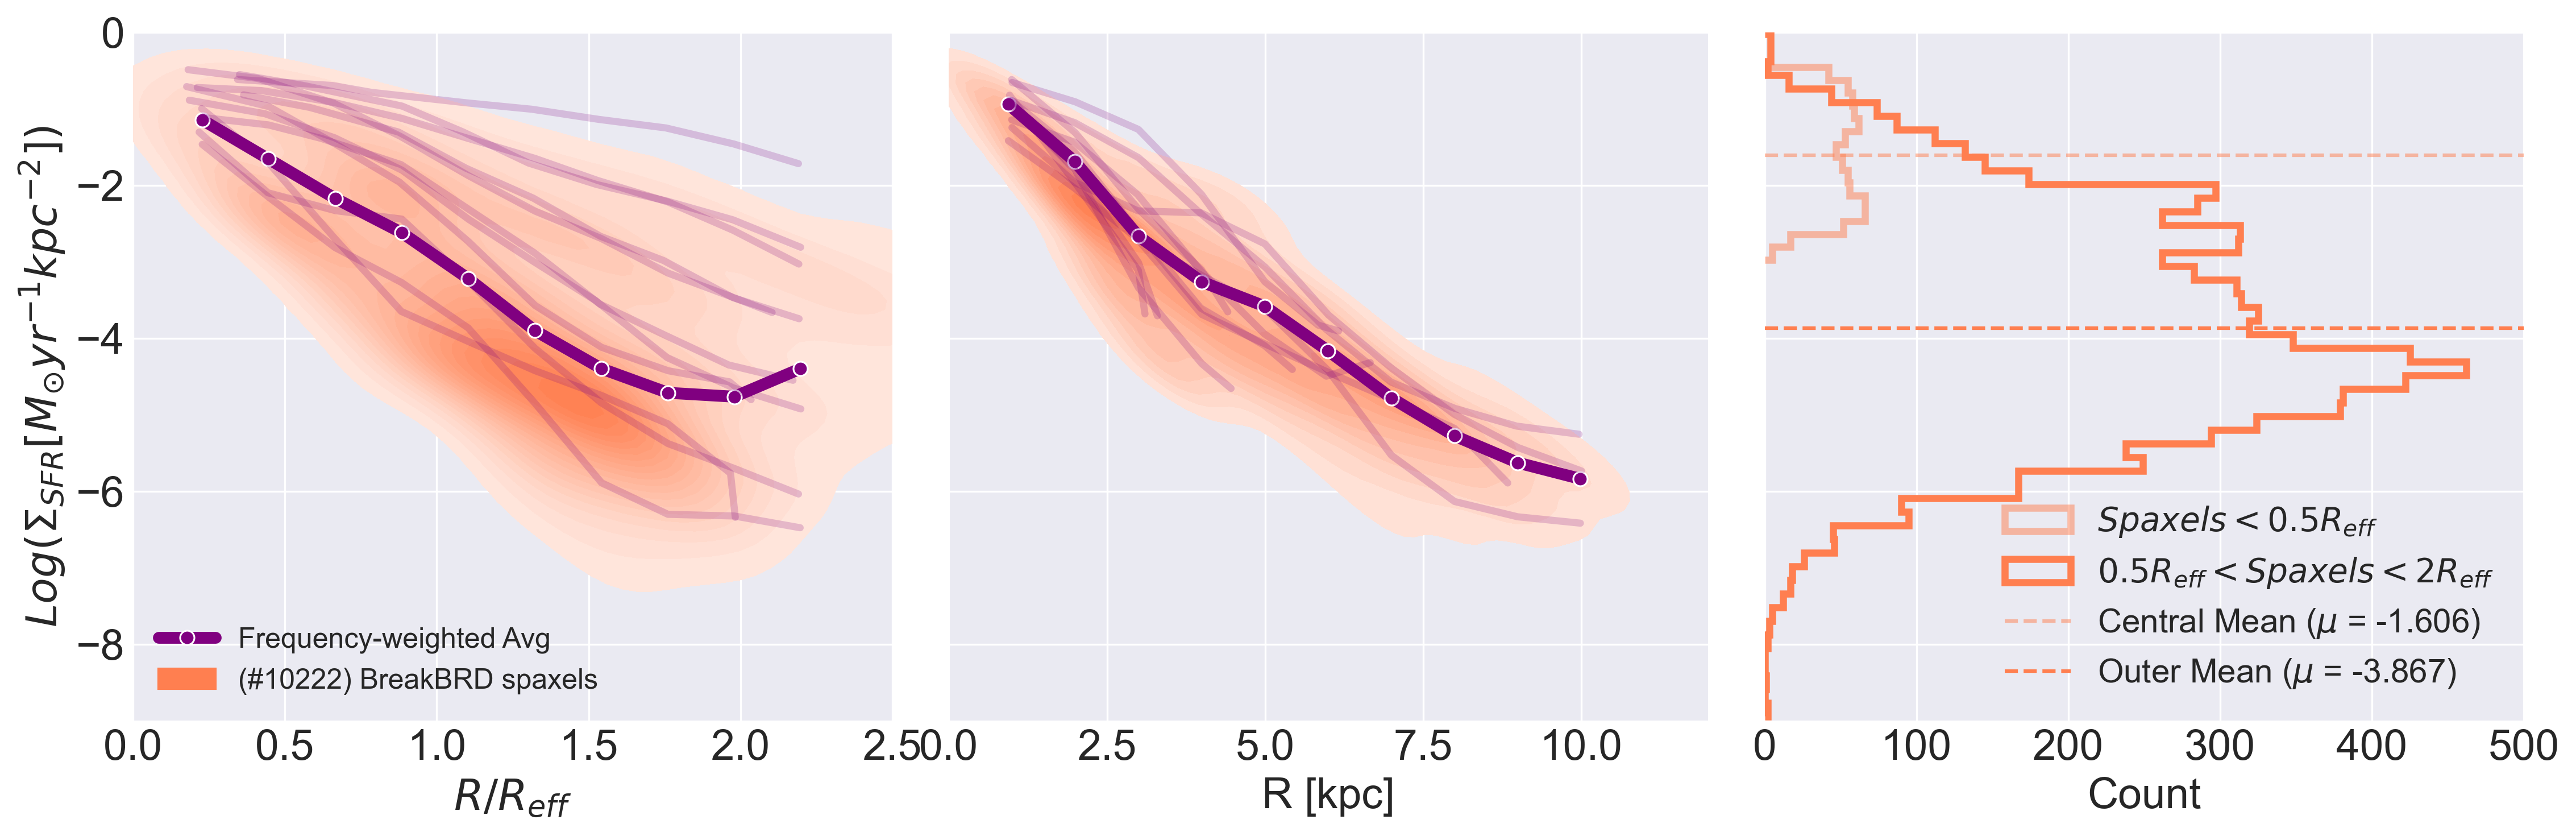

In [191]:
x_reff_str = 'R/REFF'
x_rellip_str = 'R_KPC'
ydata_str = 'LOGSFR DENSITY'
yerr_str = 'GYR_ERR'
# reff_bins = np.linspace(0.2, 3.0, 12)
reff_bins = np.linspace(0.01, 2.2, 11)
rellip_bins = np.linspace(0, 10, 11)


# Subplot
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True, dpi=300, sharey=True)

# Copy the combo csv to drop nan values but keep the combo_df from changing
bbrd_combo_cp_df = bbrd_combo_df.copy()
# bbrd_combo_cp_df.replace([np.inf, -np.inf], np.nan, inplace=True)
xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_combo_cp_df, x_reff_str, ydata_str, yerr_str, reff_bins)

# DN4000 weighted Average radial profile (reff)
bbrd_csv_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv")
bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str=x_reff_str, ydata_str=ydata_str, bins=reff_bins, csv_file_list=bbrd_csv_list)
# print(bbrd_weighted_avgs_df.head(20))

# AX0
sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax0, color='coral', label='(#{}) BreakBRD spaxels'.format(len(ydata0)), levels=30)
# sns.scatterplot(xdata0, ydata0, ax=ax0, color='black')
sns.lineplot(bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, ax=ax0, marker="o", color='purple', alpha=1.0, label='Frequency-weighted Avg', linewidth=5)
ax0.hlines(1.4, 0, 3, color='black')
ax0.grid(True)
ax0.set_xlim(0.0, 2.5)
ax0.set_ylim(-9.0, 0.0)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_xlabel(r'$R/R_{eff}$', fontsize=18)
ax0.set_ylabel(r'$Log(\Sigma_{SFR}[M_{\odot}yr^{-1}kpc^{-2}])$', fontsize=18)
ax0.legend(ncol=1, fontsize=12, loc='lower left')


#AX1
bbrd_combo_cp_df = bbrd_combo_df.copy()
xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_combo_cp_df, x_rellip_str, ydata_str, yerr_str, rellip_bins)

# DN4000 weighted Average radial profile (reff)
bbrd_csv_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv")
bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str=x_rellip_str, ydata_str=ydata_str, bins=rellip_bins, csv_file_list=bbrd_csv_list)

sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax1, color='coral', label=r'$\Sigma_{SFR} spaxels', legend=False, levels=15)
sns.lineplot(bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, ax=ax1, marker="o", color='purple', alpha=1.0, label=r' ', linewidth=5, legend=False)
# ax1.hlines(1.4, 0, 20, color='black') 
ax1.grid(True)
ax1.set_xlim(0, 12)
# ax1.set_ylim(0.8, 1.6)
ax1.tick_params(axis='x', labelsize=18)

#2nd axes
# ax1t = ax1.twiny()
# ax1t.plot(bbrd_combo_cp_df['R_KPC'], ydata0)
# ax1t.set_xlabel('R_kpc')
# ax1t.tick_params(axis='x', labelsize=18)
# ax1t.lines = []
ax1.set_xlabel('R [kpc]', fontsize=18)
# ax1.set_ylabel('D4000 Index')
# g._legend.remove()

# AX2
# Make central spaxels dataframe from Combo 
central_reff_spaxels_df = radial_intergration(df=df, radius_series_str=x_reff_str, min=0.0, max=0.5)
outer_reff_spaxels_df = radial_intergration(df=df, radius_series_str=x_reff_str, min=0.5, max=2.0)
sns.distplot(central_reff_spaxels_df[ydata_str], bins=15, ax=ax2, kde=False, color='coral', hist_kws={"histtype": "step", "linewidth": 3, "alpha":0.5}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(outer_reff_spaxels_df[ydata_str], bins=50, ax=ax2, kde=False, color='coral', hist_kws={"histtype": "step", "linewidth": 3,  "alpha":1.0}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 2 R_{eff}$')
ax2.hlines(1.4, 0, 2000, color='black')
# ax2.hlines(np.mean(central_reff_spaxels_df[ydata_str]), 0, 300, color='purple', linestyle='--', label=r'Central Mean ($\mu$)')
central_mean = np.mean(central_reff_spaxels_df[ydata_str])
outer_mean = np.mean(outer_reff_spaxels_df[ydata_str])
ax2.hlines(np.mean(central_reff_spaxels_df[ydata_str]), 0, 2000, color='coral', alpha=0.5, linestyle='--', label=r'Central Mean ($\mu$ = {})'.format(round(central_mean, 3)))
ax2.hlines(np.mean(outer_reff_spaxels_df[ydata_str]), 0, 2000, color='coral', alpha=1.0, linestyle='--', label=r'Outer Mean ($\mu$ = {})'.format(round(outer_mean, 3)))
ax2.set_xlim(0, 500)
ax2.grid(True)
ax2.set_xlabel('Count', fontsize=18)
ax2.set_ylabel(' ')
ax2.tick_params(axis='x', labelsize=18)
ax2.legend(fontsize=14, loc='lower right')
plt.tight_layout()

# Interate through all BBRD dataframes and plots indivdual the profiles in subplots
for bbrd_csv in glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv"):
    # Remove the merger and AGN galaxy from the Combo csv file and adds AGn to there own csv 
    if (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/9183-3703_map.csv"
        or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/11827-1902_map.csv"
        or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8595-3703_map.csv"
        ):
        pass

    # elif (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8312-12704_map.csv"
    #     or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8465-9102_map.csv"
    #     or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8550-12703_map.csv"
    #     ):
    #     bbrd_df = pd.read_csv(bbrd_csv)
    #     bbrd_copy_df = bbrd_df.copy()
    #     xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_copy_df, ydata_str, 'DAP_D4000_IVAR', bins = np.linspace(0, 1.8, 12))
    #     print(bbrd_csv, len(ydata0))
    #     print(' ')
    #     sns.lineplot(xdata0_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='grey', alpha=0.5, legend=False, linewidth=3)

    else:
        # print(bbrd_csv)
        bbrd_df = pd.read_csv(bbrd_csv)
        bbrd_df['LOGSFR DENSITY'].replace([np.inf, -np.inf], np.nan, inplace=True)
        bbrd_copy_df = bbrd_df.copy()
        # bbrd_combo_cp_df.dropna(subset=[ydata_str, 'DAP_D4000', 'D4000', yerr_str, 'DAP_D4000_IVAR', 'D4000_ERR', x_rellip_str, x_reff_str,'R_KPC'], inplace=True)
        xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_copy_df, x_reff_str, ydata_str, yerr_str, reff_bins) 
        sns.lineplot(xdata0_binned_mean, ydata0_binned_mean, ax=ax0, color='purple', alpha=0.2, legend=False, linewidth=3)
        # sns.scatterplot(xdata0, ydata0, ax=ax0)
        xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_copy_df, x_rellip_str, ydata_str, yerr_str, rellip_bins) 
        sns.lineplot(xdata0_binned_mean, ydata0_binned_mean, ax=ax1, color='purple', alpha=0.2, legend=False, linewidth=3)


plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/logSFRden_dist_radpro.jpeg")
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/logSFRden_dist_radpro.pdf")

In [188]:
bbrd_combo_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'HALPHA', 'HALPHA KCORR', 'HBETA KCORR',
       'NII6585 KCORR', 'OII3727 KCORR', 'OII3729 KCORR', 'OIII5008 KCORR',
       'SII6718 KCORR', 'SII6732 KCORR', 'HALPHA SNR', 'HBETA SNR',
       'NII6585 SNR', 'OII3727 SNR', 'OII3729 SNR', 'OIII5008 SNR',
       'SII6718 SNR', 'SII6732 SNR', 'HALPHA ERROR', 'HBETA ERROR',
       'NII6585 ERROR', 'OII3727 ERROR', 'OII3729 ERROR', 'OIII5008 ERROR',
       'SII6718 ERROR', 'SII6732 ERROR', 'HALPHA_DQ', 'HA/HB', 'HA LUM',
       'LOGSFR', 'LOGSFR DENSITY', 'ELLIP R', 'R/REFF', 'LOG(O/H)+12_[N2O2]',
       'LOG(O/H)+12_[O3N2]', 'LOG(O/H)+12_[N2]', 'GYR_LW', 'GYR_MW', 'GYR_ERR',
       'SP_ZSUBL', 'SP_ZSUBM', 'SP_ZERR', 'VEL_KM/S', 'VEL_ERR]', 'VDISP_KM/S',
       'VDISP_ERR', 'M/L', 'MSUN/SPX2', 'MSUN/ARCS2', 'MSUN_ERR', 'D4000',
       'D4000_ERR', 'HDELTA', 'HDELTA_ERR', 'O3HB_RATIO', 'N2HA_RATIO',
       'BPT_CLASS', 'B20_DELTASFR', 'B20_SFRD', 'B20_SFRD_UPLIM',
       'B20_SFRD_LOWLIM', 'DAP_D4000', 'DA

# $\Delta\Sigma_{SFR}$

/Users/mmckay/conda/envs/marvin_v2/lib/python3.6/site-packages/ipykernel_launcher.py:153: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


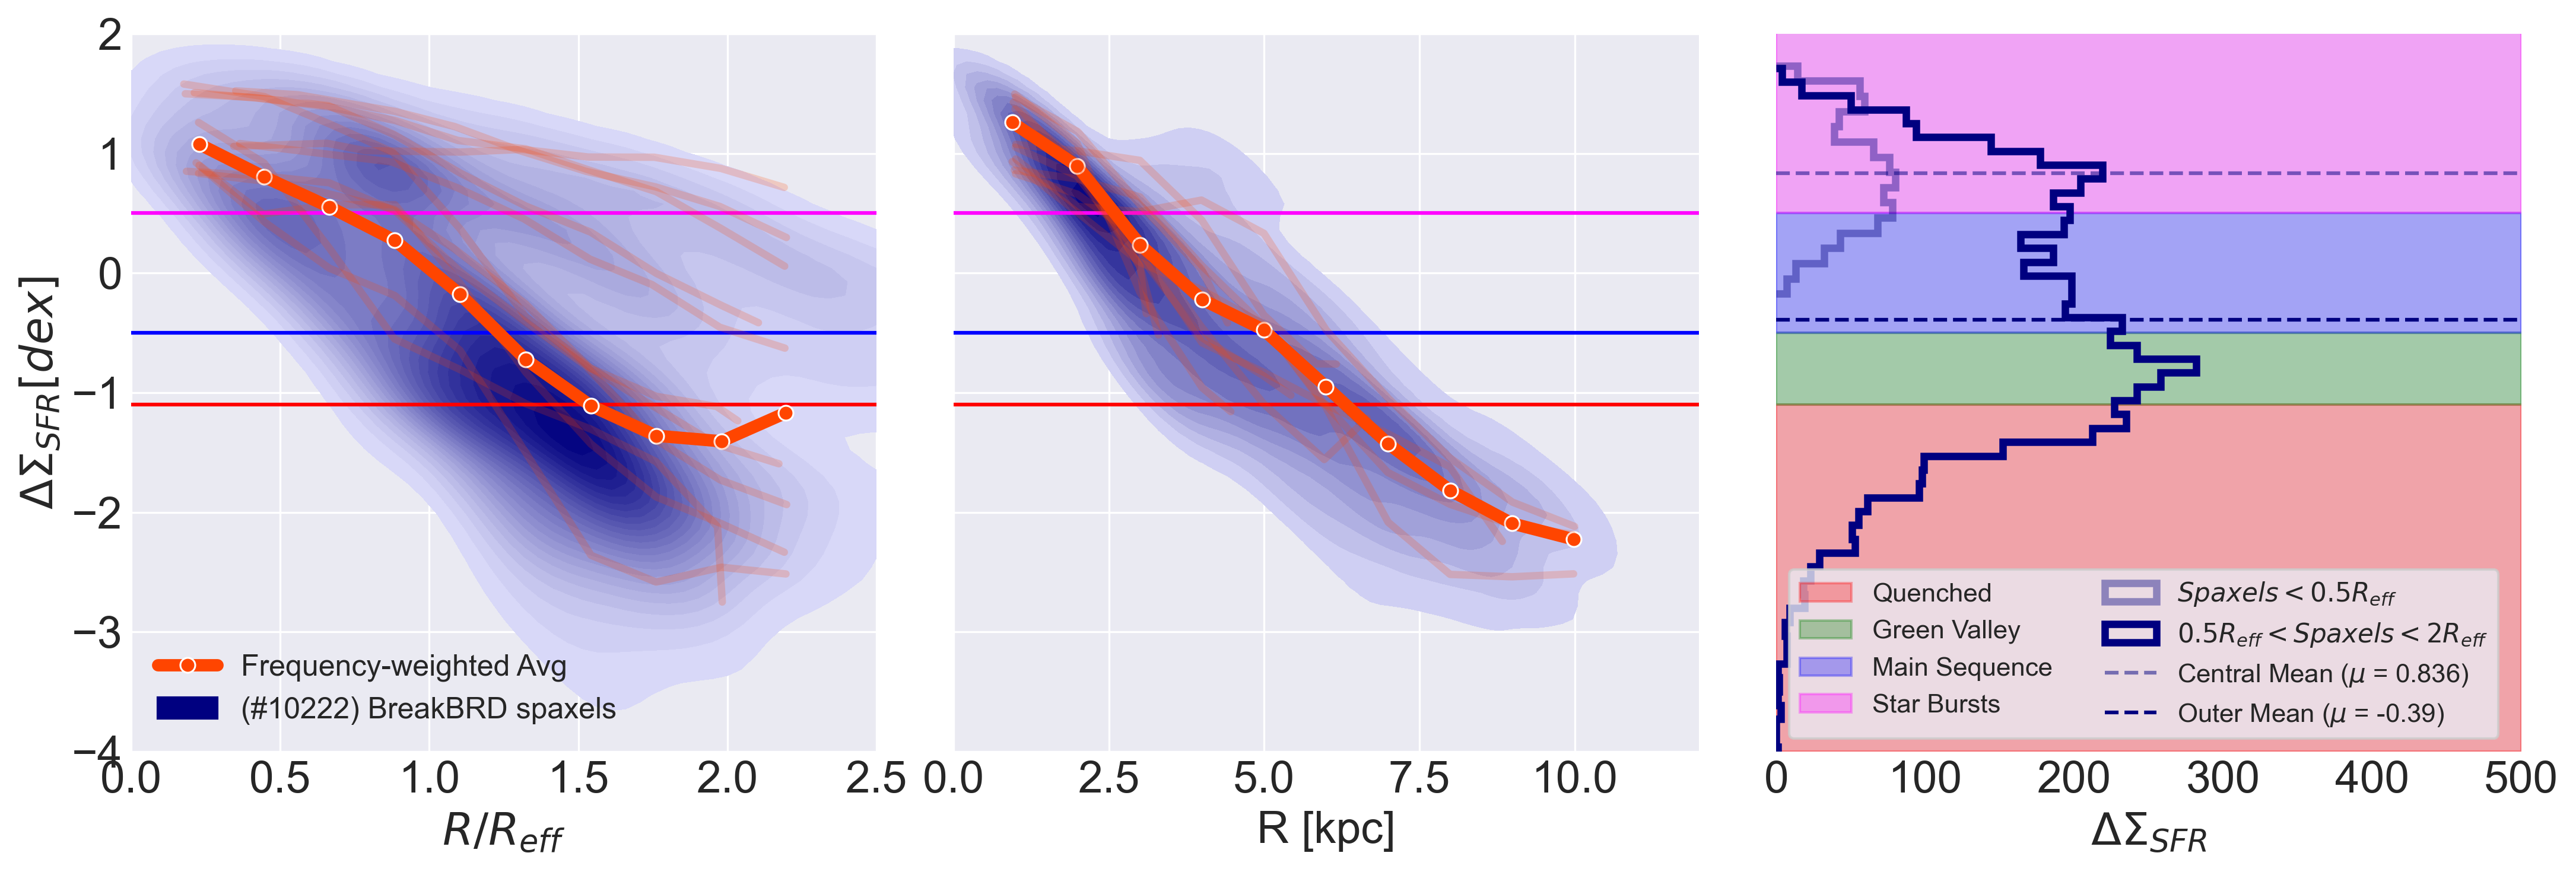

In [250]:
x_reff_str = 'R/REFF'
x_rellip_str = 'R_KPC'
ydata_str = 'B20_DELTASFR'
yerr_str = 'GYR_ERR'
# reff_bins = np.linspace(0.2, 3.0, 12)
reff_bins = np.linspace(0.01, 2.2, 11)
rellip_bins = np.linspace(0, 10, 11)


# Subplot
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True, dpi=300, sharey=True)

# Copy the combo csv to drop nan values but keep the combo_df from changing
bbrd_combo_cp_df = bbrd_combo_df.copy()
# bbrd_combo_cp_df.replace([np.inf, -np.inf], np.nan, inplace=True)
xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_combo_cp_df, x_reff_str, ydata_str, yerr_str, reff_bins)

# DN4000 weighted Average radial profile (reff)
bbrd_csv_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv")
bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str=x_reff_str, ydata_str=ydata_str, bins=reff_bins, csv_file_list=bbrd_csv_list)
# print(bbrd_weighted_avgs_df.head(20))

# AX0
sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax0, color='navy', label='(#{}) BreakBRD spaxels'.format(len(ydata0)), levels=30)
# sns.scatterplot(xdata0, ydata0, ax=ax0, color='navy')
sns.lineplot(bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, ax=ax0, marker="o", color='orangered', alpha=1.0, label='Frequency-weighted Avg', linewidth=5)
# ax0.hlines(1.4, 0, 3, color='navy')

ax0.hlines(0.5, 0, 20, color='magenta', linestyle='-')
ax0.hlines(-0.5, 0, 20, color='blue', linestyle='-')
ax0.hlines(-1.1, 0, 20, color='red', linestyle='-')

ax0.grid(True)
ax0.set_xlim(0.0, 2.5)
ax0.set_ylim(-4.0, 2.0)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_xlabel(r'$R/R_{eff}$', fontsize=18)
ax0.set_ylabel(r'$\Delta\Sigma_{SFR}[dex]$', fontsize=18)
ax0.legend(ncol=1, fontsize=12, loc='lower left')


#AX1
bbrd_combo_cp_df = bbrd_combo_df.copy()
xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_combo_cp_df, x_rellip_str, ydata_str, yerr_str, rellip_bins)

# DN4000 weighted Average radial profile (reff)
bbrd_csv_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv")
bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str=x_rellip_str, ydata_str=ydata_str, bins=rellip_bins, csv_file_list=bbrd_csv_list)

sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax1, color='navy', label=r'$\Delta\Sigma_{SFR}[dex]$', legend=False, levels=15)
sns.lineplot(bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, ax=ax1, marker="o", color='orangered', alpha=1.0, label=r' ', linewidth=5, legend=False)

ax1.hlines(0.5, 0, 20, color='magenta', linestyle='-')
ax1.hlines(-0.5, 0, 20, color='blue', linestyle='-')
ax1.hlines(-1.1, 0, 20, color='red', linestyle='-')


ax1.grid(True)
ax1.set_xlim(0, 12)
# ax1.set_ylim(0.8, 1.6)
ax1.tick_params(axis='x', labelsize=18)

#2nd axes
# ax1t = ax1.twiny()
# ax1t.plot(bbrd_combo_cp_df['R_KPC'], ydata0)
# ax1t.set_xlabel('R_kpc')
# ax1t.tick_params(axis='x', labelsize=18)
# ax1t.lines = []
ax1.set_xlabel('R [kpc]', fontsize=18)
# ax1.set_ylabel('D4000 Index')
# g._legend.remove()

# AX2
# # Make central spaxels dataframe from Combo 
# central_reff_spaxels_df = radial_intergration(df=df, radius_series_str=x_reff_str, min=0.0, max=0.5)
# outer_reff_spaxels_df = radial_intergration(df=df, radius_series_str=x_reff_str, min=0.5, max=2.0)
# sns.distplot(central_reff_spaxels_df[ydata_str], bins=15, ax=ax2, kde=False, color='navy', hist_kws={"histtype": "step", "linewidth": 3, "alpha":0.5}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
# sns.distplot(outer_reff_spaxels_df[ydata_str], bins=50, ax=ax2, kde=False, color='navy', hist_kws={"histtype": "step", "linewidth": 3,  "alpha":1.0}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 2 R_{eff}$')
# # ax2.hlines(1.4, 0, 2000, color='navy')
# # ax2.hlines(np.mean(central_reff_spaxels_df[ydata_str]), 0, 300, color='orangered', linestyle='--', label=r'Central Mean ($\mu$)')
# central_mean = np.mean(central_reff_spaxels_df[ydata_str])
# outer_mean = np.mean(outer_reff_spaxels_df[ydata_str])
# ax2.hlines(np.mean(central_reff_spaxels_df[ydata_str]), 0, 2000, color='navy', alpha=0.5, linestyle='--', label=r'Central Mean ($\mu$ = {})'.format(round(central_mean, 3)))
# ax2.hlines(np.mean(outer_reff_spaxels_df[ydata_str]), 0, 2000, color='navy', alpha=1.0, linestyle='--', label=r'Outer Mean ($\mu$ = {})'.format(round(outer_mean, 3)))
# ax2.set_xlim(0, 500)
# ax2.grid(True)
# ax2.set_xlabel('Count', fontsize=18)
# ax2.set_ylabel(' ')
# ax2.tick_params(axis='x', labelsize=18)
# ax2.legend(fontsize=14, loc='lower right')

# Make central spaxels dataframe
central_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.0, max=0.5)
outer_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.5, max=1.5)

ax2.axhspan(-1.1, -4, alpha=0.3, color='red', label='Quenched')
ax2.axhspan(-1.1, -0.5, alpha=0.3, color='green', label='Green Valley')
ax2.axhspan(-0.5, 0.5, alpha=0.3, color='blue', label='Main Sequence')
ax2.axhspan(0.5, 3.0, alpha=0.3, color='magenta', label='Star Bursts')

# ax2.hlines(0.5, 0, 2000, color='magenta', linestyle='-', label='Star Bursts')
# ax2.hlines(-0.5, 0, 2000, color='blue', linestyle='-', label='Main Sequence')
# ax2.hlines(-0.51, 0, 2000, color='green', linestyle='-', label='Green Valley')
# ax2.hlines(-1.1, 0, 2000, color='red', linestyle='-', label='Quenched')
# sns.distplot(bbrd_combo_cp_df['B20_DELTASFR'], bins=75, ax=ax2, vertical=True, kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha":1.0}, color='cyan')
sns.distplot(central_spaxels_df['B20_DELTASFR'], bins=15, ax=ax2, vertical=True, kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha":0.4}, color='navy', label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(outer_spaxels_df['B20_DELTASFR'], bins=50, ax=ax2, vertical=True, kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha":1.0}, color='navy', label=r'$0.5 R_{eff} < Spaxels < 2 R_{eff}$')


ax2.hlines(np.mean(central_spaxels_df['B20_DELTASFR']), 0, 2000, color='navy', alpha=0.5, linestyle='--', label=r'Central Mean ($\mu$ = {})'.format(round(np.mean(central_spaxels_df['B20_DELTASFR']), 3)))
ax2.hlines(np.mean(outer_spaxels_df['B20_DELTASFR']), 0, 2000, color='navy', alpha=1.0, linestyle='--', label=r'Outer Mean ($\mu$ = {})'.format(round(np.mean(outer_spaxels_df['B20_DELTASFR']), 3)))
ax2.tick_params(labelsize=18)
# ax2.set_xlim(-2.5, 2)
ax2.set_xlim(0, 500)
ax2.set_xlabel(r'$\Delta\Sigma_{SFR}$', fontsize=18)
ax2.set_ylabel(' ', fontsize=18)
ax2.legend(loc='lower left', frameon=True, ncol=2, fontsize=10.5)
# plt.tight_layout()

# Interate through all BBRD dataframes and plots indivdual the profiles in subplots
for bbrd_csv in glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv"):
    # Remove the merger and AGN galaxy from the Combo csv file and adds AGn to there own csv 
    if (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/9183-3703_map.csv"
        or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/11827-1902_map.csv"
        or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8595-3703_map.csv"
        ):
        pass

    # elif (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8312-12704_map.csv"
    #     or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8465-9102_map.csv"
    #     or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8550-12703_map.csv"
    #     ):
    #     bbrd_df = pd.read_csv(bbrd_csv)
    #     bbrd_copy_df = bbrd_df.copy()
    #     xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_copy_df, ydata_str, 'DAP_D4000_IVAR', bins = np.linspace(0, 1.8, 12))
    #     print(bbrd_csv, len(ydata0))
    #     print(' ')
    #     sns.lineplot(xdata0_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='grey', alpha=0.5, legend=False, linewidth=3)

    else:
        # print(bbrd_csv)
        bbrd_df = pd.read_csv(bbrd_csv)
        bbrd_df['B20_DELTASFR'].replace([np.inf, -np.inf], np.nan, inplace=True)
        bbrd_copy_df = bbrd_df.copy()
        # bbrd_combo_cp_df.dropna(subset=[ydata_str, 'DAP_D4000', 'D4000', yerr_str, 'DAP_D4000_IVAR', 'D4000_ERR', x_rellip_str, x_reff_str,'R_KPC'], inplace=True)
        xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_copy_df, x_reff_str, ydata_str, yerr_str, reff_bins) 
        sns.lineplot(xdata0_binned_mean, ydata0_binned_mean, ax=ax0, color='orangered', alpha=0.2, legend=False, linewidth=3)
        # sns.scatterplot(xdata0, ydata0, ax=ax0)
        xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_copy_df, x_rellip_str, ydata_str, yerr_str, rellip_bins) 
        sns.lineplot(xdata0_binned_mean, ydata0_binned_mean, ax=ax1, color='orangered', alpha=0.2, legend=False, linewidth=3)

plt.tight_layout()
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/deltaSFR_dist_radpro.jpeg")
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/deltaSFR_dist_radpro.pdf")

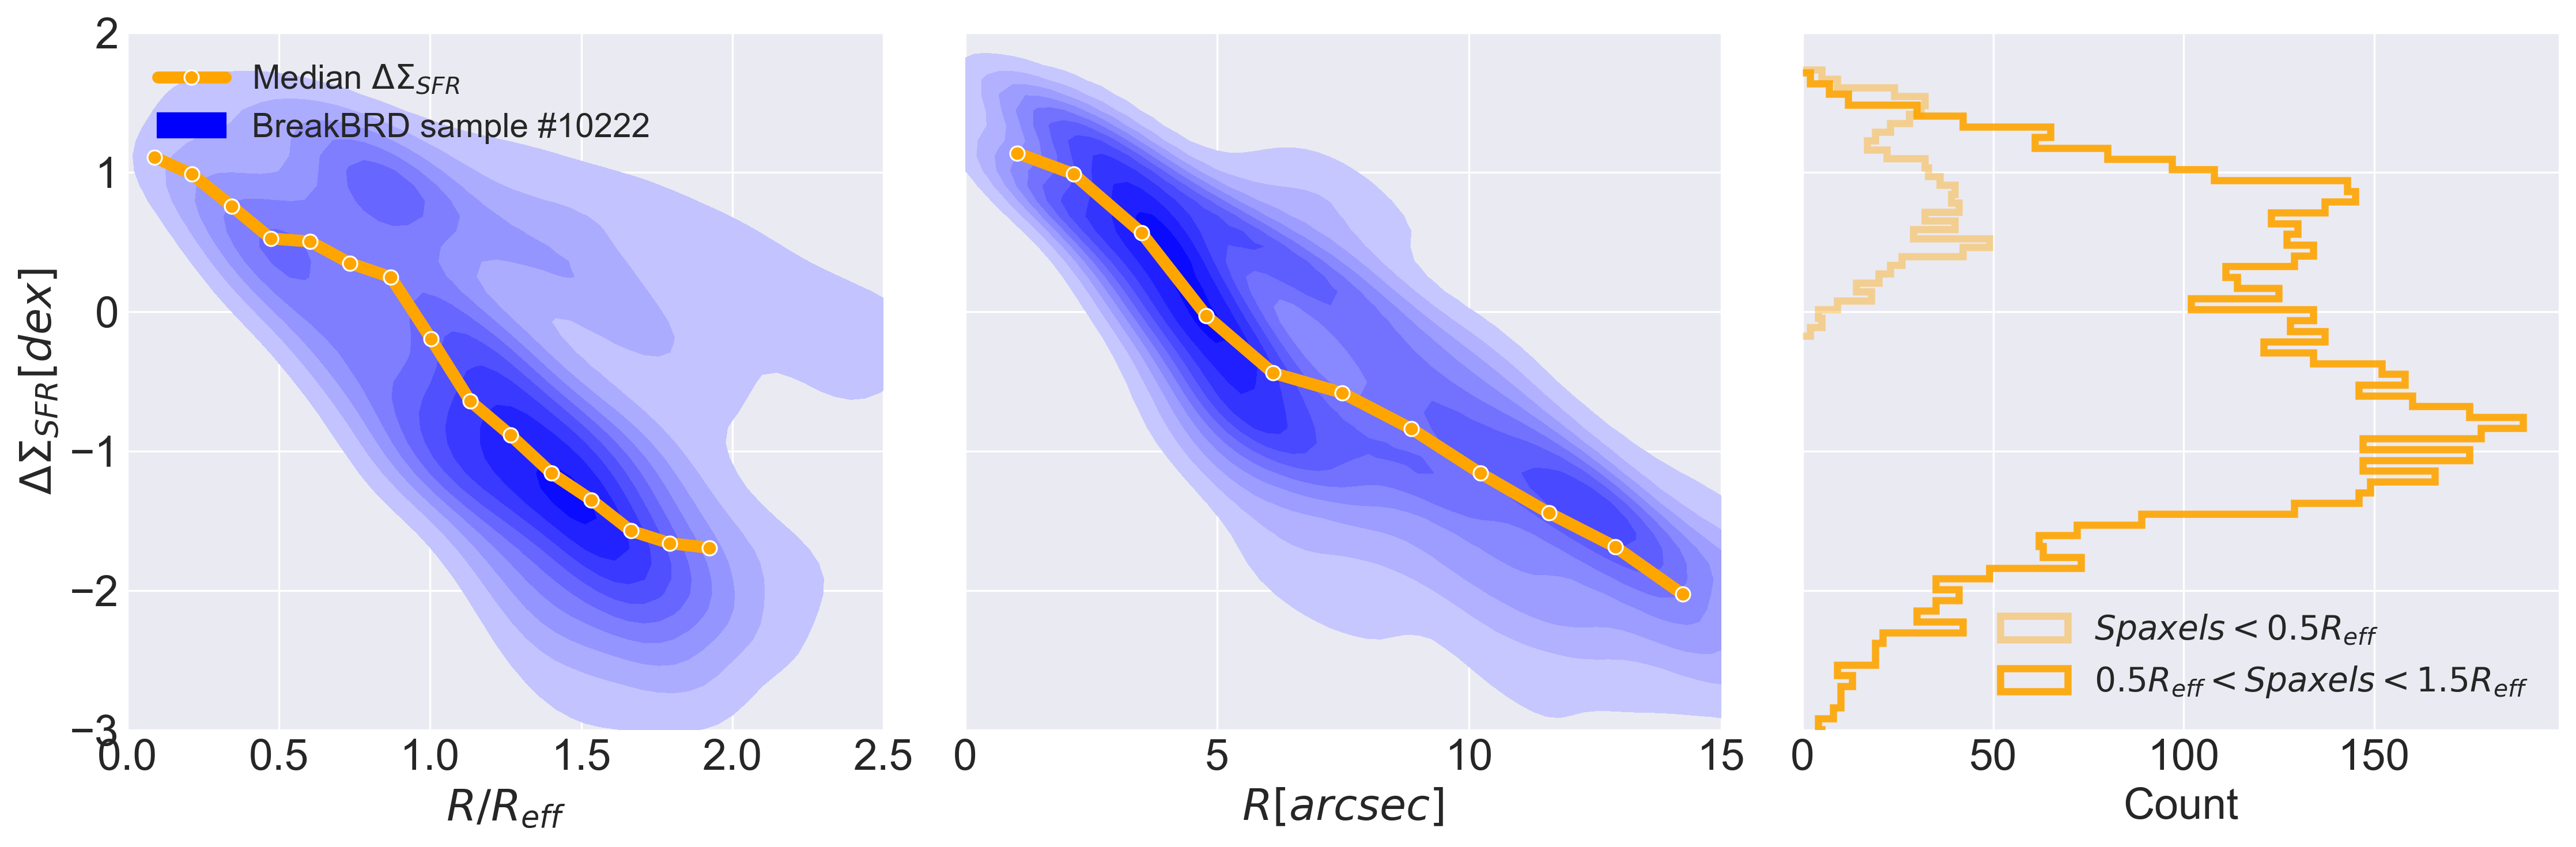

In [11]:
# Copy the combo csv to drop nan values but keep the combo_df from changing
bbrd_combo_cp_df = bbrd_combo_df.copy()
bbrd_combo_cp_df.dropna(subset=['B20_DELTASFR', 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)
# bbrd_combo_cp_df[['B20_DELTASFR', 'ELLIP R', 'R/REFF','R_KPC']].head()
# bbrd_combo_cp_df.shape

# Make central spaxels dataframe
central_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.0, max=0.5)
outer_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.5, max=1.5)

# Read in D4000 data from DAP and Pipe3d
ydata0 = bbrd_combo_cp_df['B20_DELTASFR']
# ydata1 = bbrd_combo_cp_df['B20_SFRD']


# Read in error data
# ydata0_err = bbrd_combo_cp_df['GYR_ERR']

# Read in radial data
xdata0 = bbrd_combo_cp_df['ELLIP R'] # Elliptical radius
xdata1 = bbrd_combo_cp_df['R/REFF']
xdata2 = bbrd_combo_cp_df['R_KPC']



###### R/Reff
# Bin xdata and ydata into even bins of R/Reff and take median value
bins = np.linspace(0, 2, 16)
digitized = np.digitize(xdata1, bins)
xdata1_reffbin_meds = [xdata1[digitized == i].median() for i in range(1, len(bins))]
ydata0_reffbin_meds = [ydata0[digitized == i].median() for i in range(1, len(bins))]
# ydata1_reffbin_meds = [ydata1[digitized == i].median() for i in range(1, len(bins))]
# ydata2_reffbin_meds = [ydata2[digitized == i].median() for i in range(1, len(bins))]

# Error binning into even bins of R/Reff
# ydata0_err_reffbin_meds = [ydata0_err[digitized == i].median() for i in range(1, len(bins))]



# Subplot
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), constrained_layout=False, dpi=300, sharey=True)


# AX0
sns.kdeplot(xdata1, ydata0, shade=True, shade_lowest=False, ax=ax0, color='blue', label='BreakBRD sample #{}'.format(len(ydata0)))
# sns.kdeplot(xdata1, ydata1, shade=True, shade_lowest=False, ax=ax0, color='cyan', label='BreakBRD sample #{}'.format(len(ydata0)))
sns.lineplot(xdata1_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='orange', label=r'Median $\Delta\Sigma_{SFR}$', linewidth=5)
# sns.lineplot(xdata1_reffbin_meds, ydata1_reffbin_meds, ax=ax0, marker="o", color='purple', label=r'$Log(\Sigma_{SFR}[M_{\odot}yr^{-1}kpc^{-2}])$', linewidth=5)


# ax0.errorbar(xdata1_reffbin_meds, ydata0_reffbin_meds, yerr=ydata0_err_reffbin_meds, color='green')


# ax0.hlines(1.4, 0,3, color='red')
ax0.grid(True)
ax0.set_xlim(0, 2.5)
ax0.set_ylim(-3.0, 2.0)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_xlabel(r'$R/R_{eff}$', fontsize=18)
ax0.set_ylabel(r'$\Delta\Sigma_{SFR} [dex]$', fontsize=18)
ax0.legend(ncol=1, fontsize=14, loc='upper left')

# AX1

###### Elliptical radius
# Bin xdata and ydata into even bins of Elliptical and take median value
bins = np.linspace(0, 15, 12)
digitized = np.digitize(xdata0, bins)
xdata0_elliprbin_meds = [xdata0[digitized == i].median() for i in range(1, len(bins))]
ydata0_elliprbin_meds = [ydata0[digitized == i].median() for i in range(1, len(bins))]
# ydata1_elliprbin_meds = [ydata1[digitized == i].median() for i in range(1, len(bins))]
# ydata2_elliprbin_meds = [ydata2[digitized == i].median() for i in range(1, len(bins))]

# Error binning into even bins of R/Reff
# ydata0_err_elliprbin_meds = [ydata0_err[digitized == i].median() for i in range(1, len(bins))]
# ydata1_err_elliprbin_meds = [ydata1_err[digitized == i].median() for i in range(1, len(bins))]
# ydata2_err_elliprbin_meds = [ydata2_err[digitized == i].median() for i in range(1, len(bins))]


# sns.scatterplot(xdata0, ydata0)
sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax1, color='blue', label='BreakBRD sample', legend=False)
sns.lineplot(xdata0_elliprbin_meds, ydata0_elliprbin_meds, ax=ax1, marker="o", color='orange', label=r'$\Delta\Sigma_{SFR}$', legend=False, linewidth=5)
# ax1.errorbar(xdata0_elliprbin_meds, ydata0_elliprbin_meds, yerr=ydata0_err_elliprbin_meds, color='green')
# sns.lineplot(xdata0_elliprbin_meds, ydata1_elliprbin_meds, ax=ax1, marker="o", color='cyan', label='DAP D4000', legend=False, linewidth=5)
# ax1.errorbar(xdata0_elliprbin_meds, ydata1_elliprbin_meds, yerr=1/np.sqrt(ydata1_err_elliprbin_meds), color='cyan')
# sns.lineplot(xdata0_elliprbin_meds, ydata2_elliprbin_meds, ax=ax1, marker="o", color='navy', label='Pipe3D D4000', legend=False, linewidth=5)
# ax1.hlines(1.4, 0,16, color='red')
ax1.grid(True)
ax1.set_xlim(0, 15)
ax1.tick_params(axis='x', labelsize=18)
ax1.set_xlabel(r'$R[arcsec]$', fontsize=18)
ax1.set_ylabel(' ')
# g._legend.remove()


# AX2
# ydata0_cp = np.copy(ydata0)
# ydata0_cp[ydata0_cp==0.0]=np.nan
# central_cp = np.copy(central_spaxels_df['LOGSFR DENSITY'])
# central_cp[central_cp==0.0]=np.nan
# outer_cp = np.copy(outer_spaxels_df['LOGSFR DENSITY'])
# outer_cp[outer_cp==0.0]=np.nan

# sns.distplot(ydata0_cp, bins=200, ax=ax2, kde=False, color='blue')
sns.distplot(central_spaxels_df['B20_DELTASFR'], bins=30, ax=ax2, kde=False, color='orange', hist_kws={"histtype": "step", "linewidth": 3, "alpha":0.4}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(outer_spaxels_df['B20_DELTASFR'], bins=75, ax=ax2, kde=False, color='orange', hist_kws={"histtype": "step", "linewidth": 3,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')
ax2.grid(True)
ax2.set_xlabel('Count', fontsize=18)
ax2.set_ylabel(' ')
ax2.tick_params(axis='x', labelsize=18)
ax2.legend(fontsize=14, loc='lower right')

plt.tight_layout()
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/DeltaSFRden_dist_radpro.jpeg")
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/DeltaSFRden_dist_radpro.pdf")

# resolved Star forming Main Sequence

In [66]:
bbrd_combo_cp_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'HALPHA', 'HALPHA KCORR', 'HBETA KCORR',
       'NII6585 KCORR', 'OII3727 KCORR', 'OII3729 KCORR', 'OIII5008 KCORR',
       'SII6718 KCORR', 'SII6732 KCORR', 'HALPHA SNR', 'HBETA SNR',
       'NII6585 SNR', 'OII3727 SNR', 'OII3729 SNR', 'OIII5008 SNR',
       'SII6718 SNR', 'SII6732 SNR', 'HALPHA ERROR', 'HBETA ERROR',
       'NII6585 ERROR', 'OII3727 ERROR', 'OII3729 ERROR', 'OIII5008 ERROR',
       'SII6718 ERROR', 'SII6732 ERROR', 'HALPHA_DQ', 'HA/HB', 'HA LUM',
       'LOGSFR', 'LOGSFR DENSITY', 'ELLIP R', 'R/REFF', 'LOG(O/H)+12_[N2O2]',
       'LOG(O/H)+12_[O3N2]', 'LOG(O/H)+12_[N2]', 'GYR_LW', 'GYR_MW', 'GYR_ERR',
       'SP_ZSUBL', 'SP_ZSUBM', 'SP_ZERR', 'VEL_KM/S', 'VEL_ERR]', 'VDISP_KM/S',
       'VDISP_ERR', 'M/L', 'MSUN/SPX2', 'MSUN/ARCS2', 'MSUN_ERR', 'D4000',
       'D4000_ERR', 'HDELTA', 'HDELTA_ERR', 'O3HB_RATIO', 'N2HA_RATIO',
       'BPT_CLASS', 'B20_DELTASFR', 'B20_SFRD', 'B20_SFRD_UPLIM',
       'B20_SFRD_LOWLIM', 'DAP_D4000', 'DA

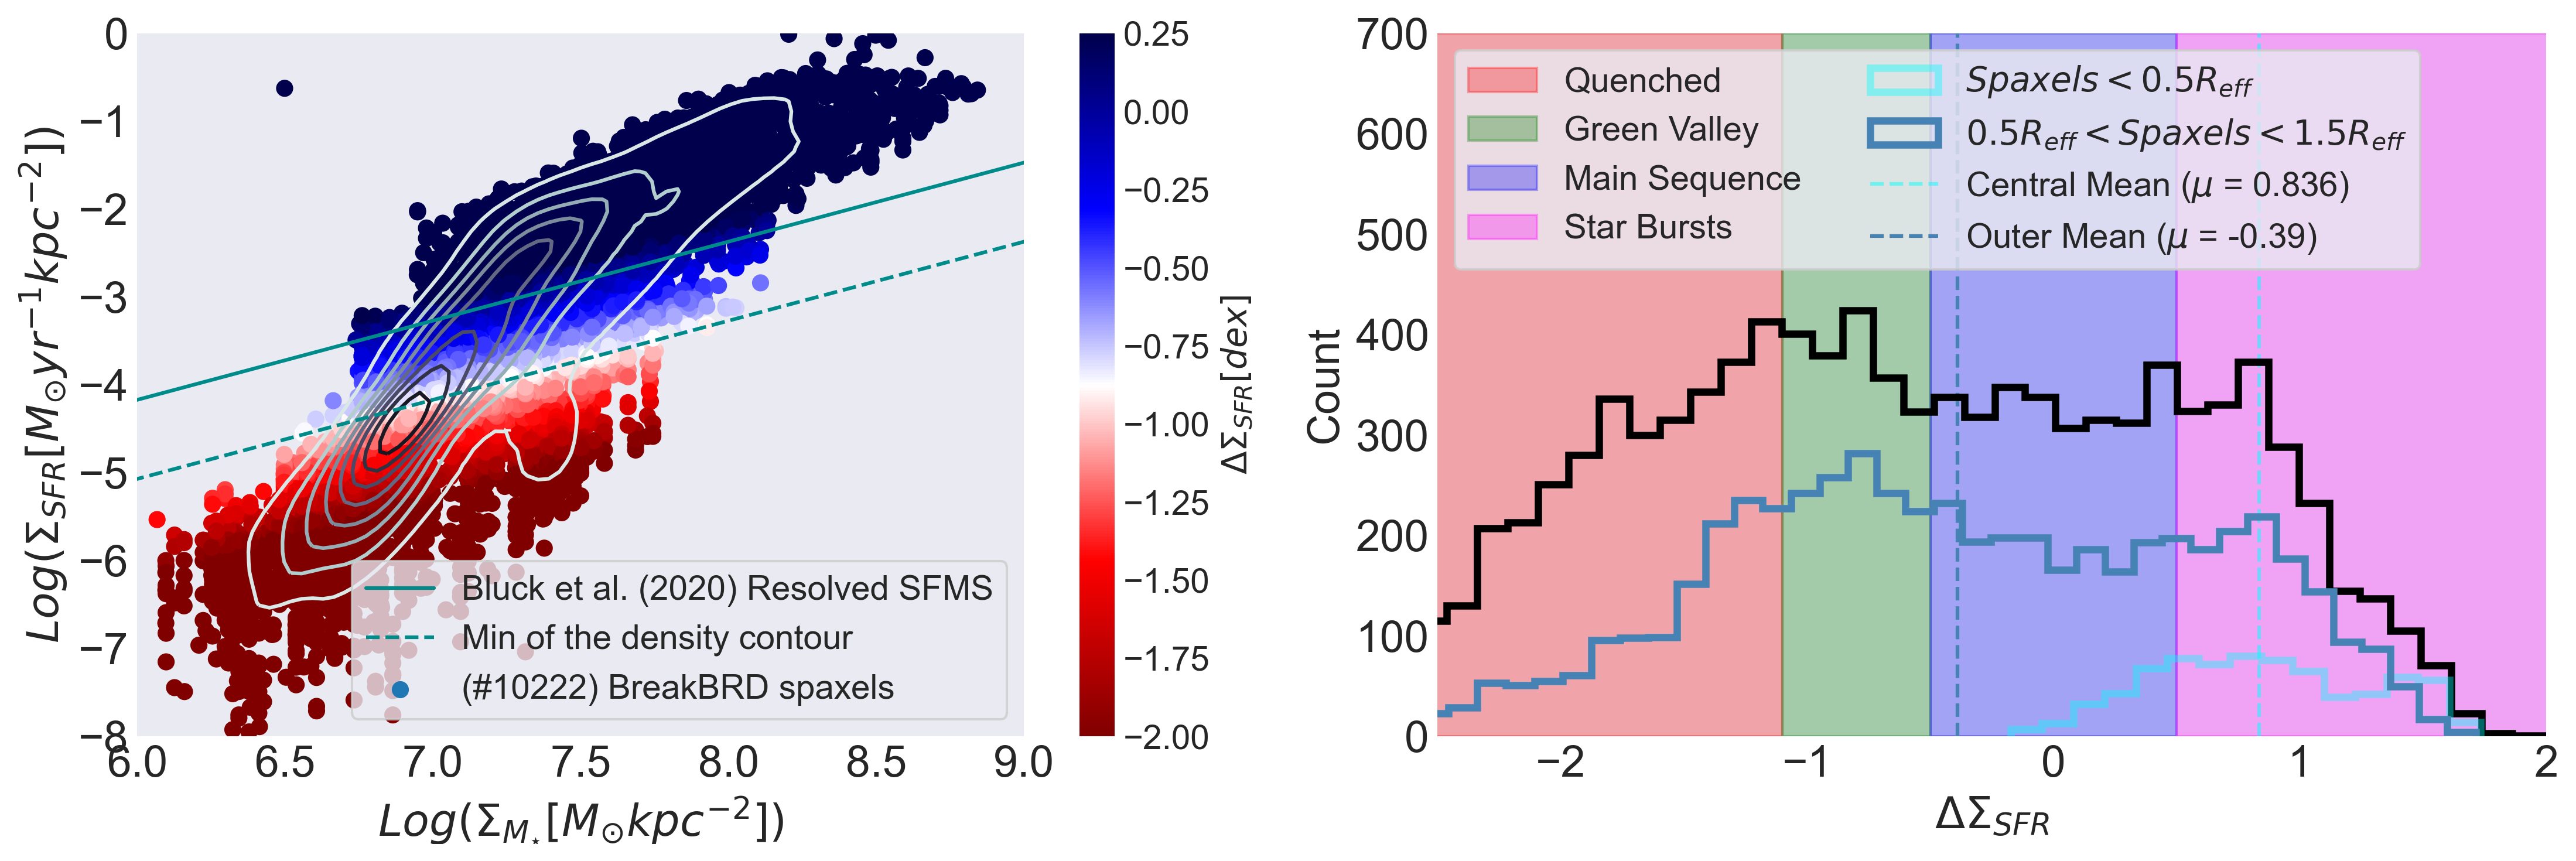

In [201]:
# Copy the combo csv to drop nan values but keep the combo_df from changing
bbrd_combo_cp_df = bbrd_combo_df.copy()
bbrd_combo_cp_df.replace([np.inf, -np.inf], np.nan)
bbrd_combo_cp_df.dropna(subset=['MSUN/SPX2', 'LOGSFR DENSITY', 'B20_DELTASFR', 'MSUN_ERR', 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)

mass_range = np.linspace(5.0, 10.0, 10)
sfms_fit_map = 0.90 * mass_range - 9.57
# Subplot
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,5), constrained_layout=False, dpi=300, sharey=False)

# sns.scatterplot(bbrd_combo_cp_df['MSUN/SPX2'], bbrd_combo_cp_df['LOGSFR DENSITY'], ax=ax0)
im = ax0.scatter(bbrd_combo_cp_df['MSUN/SPX2'], bbrd_combo_cp_df['LOGSFR DENSITY'], c=bbrd_combo_cp_df['B20_DELTASFR'], cmap='seismic_r', vmin=-2.0, vmax=0.25, label='(#{}) BreakBRD spaxels'.format(len(bbrd_combo_cp_df['LOGSFR DENSITY'])))
cb = fig.colorbar(im, ax=ax0, orientation='vertical')
cb.set_label(label=r'$\Delta \Sigma_{SFR}[dex]$', size=14, weight='bold')
cb.ax.tick_params(labelsize=14)
sns.kdeplot(bbrd_combo_cp_df['MSUN/SPX2'], bbrd_combo_cp_df['LOGSFR DENSITY'], ax=ax0, shade=False, shade_lowest=False, levels=10, cmap='bone_r')


sns.lineplot(mass_range, sfms_fit_map, ax=ax0, color='darkcyan', label='Bluck et al. (2020) Resolved SFMS')
a = sns.lineplot(mass_range, sfms_fit_map-0.9, linestyle='-.', ax=ax0, color='darkcyan', label='Min of the density contour')
a.lines[1].set_linestyle("--")
# sns.lineplot(mass_range, sfms_fit_map-0.2, linestyle='--', ax=ax0)
ax0.set_xlim(6.0,9.0)
ax0.set_ylim(-8.0, 0)
ax0.set_ylabel(r'$Log(\Sigma_{SFR}[M_{\odot}yr^{-1}kpc^{-2}])$', fontsize=18)
ax0.set_xlabel(r'$Log(\Sigma_{M_{\star}}[M_{\odot}kpc^{-2}])$', fontsize=18)
ax0.tick_params(labelsize=18)
ax0.legend(fontsize=14, frameon=True)



# Make central spaxels dataframe
central_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.0, max=0.5)
outer_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.5, max=1.5)

# ax0.vlines(1.4, 0,3, color='red')
ax1.axvspan(-1.1, -4, alpha=0.3, color='red', label='Quenched')
ax1.axvspan(-1.1, -0.5, alpha=0.3, color='green', label='Green Valley')
ax1.axvspan(-0.5, 0.5, alpha=0.3, color='blue', label='Main Sequence')
ax1.axvspan(0.5, 3.0, alpha=0.3, color='magenta', label='Star Bursts')
sns.distplot(bbrd_combo_cp_df['B20_DELTASFR'], bins=75, ax=ax1, kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha":1.0}, color='black')
sns.distplot(central_spaxels_df['B20_DELTASFR'], bins=15, ax=ax1, kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha":0.4}, color='cyan', label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(outer_spaxels_df['B20_DELTASFR'], bins=50, ax=ax1, kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha":1.0}, color='steelblue', label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')


ax1.vlines(np.mean(central_spaxels_df['B20_DELTASFR']), 0, 2000, color='cyan', alpha=0.5, linestyle='--', label=r'Central Mean ($\mu$ = {})'.format(round(np.mean(central_spaxels_df['B20_DELTASFR']), 3)))
ax1.vlines(np.mean(outer_spaxels_df['B20_DELTASFR']), 0, 2000, color='steelblue', alpha=1.0, linestyle='--', label=r'Outer Mean ($\mu$ = {})'.format(round(np.mean(outer_spaxels_df['B20_DELTASFR']), 3)))
ax1.tick_params(labelsize=18)
ax1.set_xlim(-2.5, 2)
ax1.set_ylim(0, 700)
ax1.set_xlabel(r'$\Delta\Sigma_{SFR}$', fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.legend(loc='upper left', frameon=True, ncol=2, fontsize=14)

plt.tight_layout()
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/rSFMS_&_DeltaSFRdist.jpeg")
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/rSFMS_&_DeltaSFRdist.pdf")


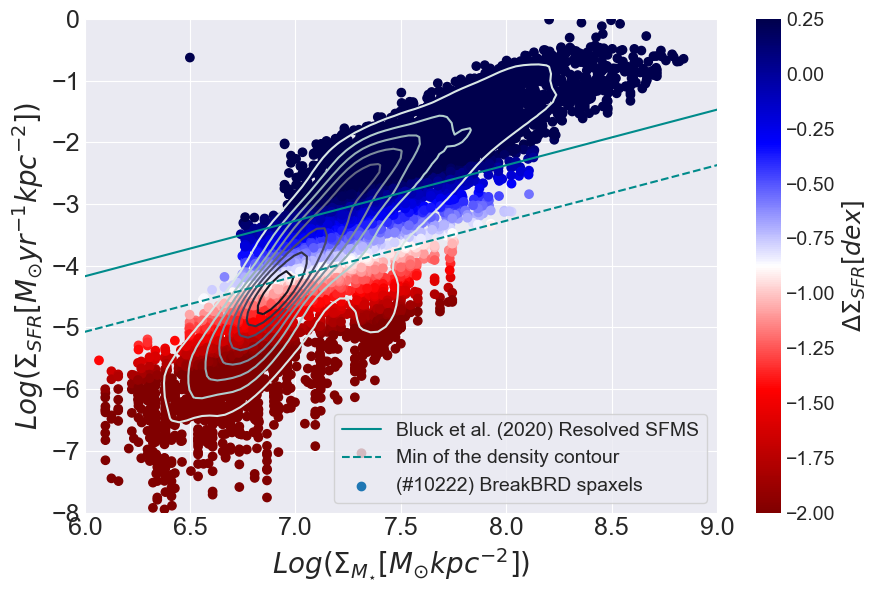

In [248]:
# Copy the combo csv to drop nan values but keep the combo_df from changing
bbrd_combo_cp_df = bbrd_combo_df.copy()
bbrd_combo_cp_df.replace([np.inf, -np.inf], np.nan)
bbrd_combo_cp_df.dropna(subset=['MSUN/SPX2', 'LOGSFR DENSITY', 'B20_DELTASFR', 'MSUN_ERR', 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)

mass_range = np.linspace(5.0, 10.0, 10)
sfms_fit_map = 0.90 * mass_range - 9.57
# Subplot
fig, ax0 = plt.subplots(1,1, figsize=(9,6), constrained_layout=False, dpi=100, sharey=False)

# sns.scatterplot(bbrd_combo_cp_df['MSUN/SPX2'], bbrd_combo_cp_df['LOGSFR DENSITY'], ax=ax0)
im = ax0.scatter(bbrd_combo_cp_df['MSUN/SPX2'], bbrd_combo_cp_df['LOGSFR DENSITY'], c=bbrd_combo_cp_df['B20_DELTASFR'], cmap='seismic_r', vmin=-2.0, vmax=0.25, label='(#{}) BreakBRD spaxels'.format(len(bbrd_combo_cp_df['LOGSFR DENSITY'])))
cb = fig.colorbar(im, ax=ax0, orientation='vertical')
cb.set_label(label=r'$\Delta \Sigma_{SFR}[dex]$', size=18, weight='bold')
cb.ax.tick_params(labelsize=14)
sns.kdeplot(bbrd_combo_cp_df['MSUN/SPX2'], bbrd_combo_cp_df['LOGSFR DENSITY'], ax=ax0, shade=False, shade_lowest=False, levels=10, cmap='bone_r')


sns.lineplot(mass_range, sfms_fit_map, ax=ax0, color='darkcyan', label='Bluck et al. (2020) Resolved SFMS')
a = sns.lineplot(mass_range, sfms_fit_map-0.9, linestyle='-.', ax=ax0, color='darkcyan', label='Min of the density contour')
a.lines[1].set_linestyle("--")
# sns.lineplot(mass_range, sfms_fit_map-0.2, linestyle='--', ax=ax0)
ax0.set_xlim(6.0,9.0)
ax0.set_ylim(-8.0, 0)
ax0.set_ylabel(r'$Log(\Sigma_{SFR}[M_{\odot}yr^{-1}kpc^{-2}])$', fontsize=20)
ax0.set_xlabel(r'$Log(\Sigma_{M_{\star}}[M_{\odot}kpc^{-2}])$', fontsize=20)
ax0.tick_params(labelsize=18)
ax0.legend(fontsize=14, frameon=True)
ax0.grid(True)

plt.tight_layout()
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/bbrd_rSFRM.jpeg")
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/bbrd_rSFRM.pdf")

# Stellar Mass Surface Density 

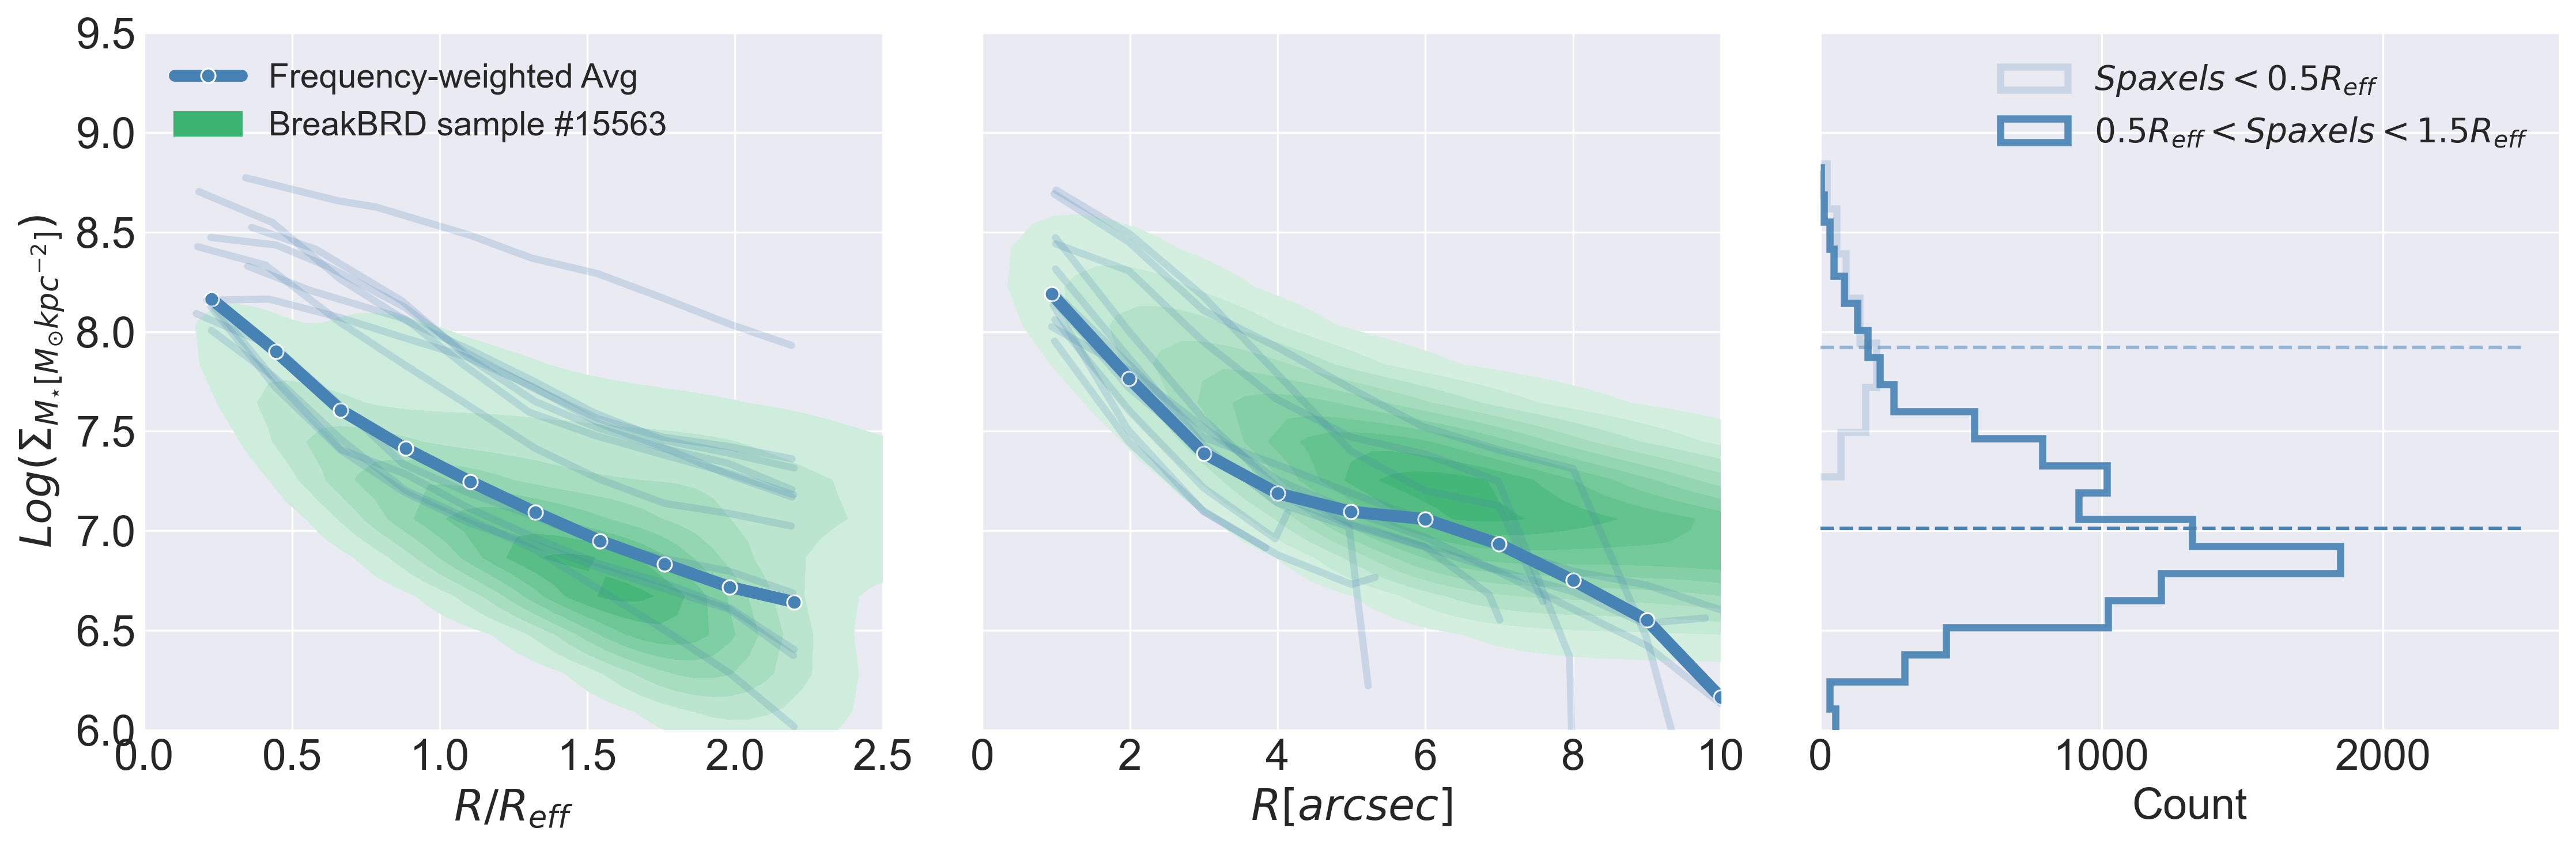

In [30]:
x_reff_str = 'R/REFF'
x_rellip_str = 'R_KPC'
ydata_str = 'MSUN/SPX2'
yerr_str = 'MSUN_ERR'
# reff_bins = np.linspace(0.2, 3.0, 12)
reff_bins = np.linspace(0.01, 2.2, 11)
rellip_bins = np.linspace(0, 10, 11)

# Copy the combo csv to drop nan values but keep the combo_df from changing
bbrd_combo_cp_df = bbrd_combo_df.copy()
bbrd_combo_cp_df.dropna(subset=['MSUN/SPX2', 'MSUN_ERR', 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)
# bbrd_combo_cp_df[['MSUN/SPX2', 'ELLIP R', 'R/REFF','R_KPC']].head()
# bbrd_combo_cp_df.shape

# Make central spaxels dataframe
central_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.0, max=0.5)
outer_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.5, max=2.0)

# Read in D4000 data from DAP and Pipe3d
ydata0 = bbrd_combo_cp_df['MSUN/SPX2']


# Read in error data
ydata0_err = bbrd_combo_cp_df['MSUN_ERR']

# Read in radial data
xdata0 = bbrd_combo_cp_df['ELLIP R'] # Elliptical radius
xdata1 = bbrd_combo_cp_df['R/REFF']
xdata2 = bbrd_combo_cp_df['R_KPC']



###### R/Reff
# Bin xdata and ydata into even bins of R/Reff and take median value
bins = np.linspace(0, 2, 16)
digitized = np.digitize(xdata1, bins)
xdata1_reffbin_meds = [xdata1[digitized == i].median() for i in range(1, len(bins))]
ydata0_reffbin_meds = [ydata0[digitized == i].median() for i in range(1, len(bins))]

# Error binning into even bins of R/Reff
ydata0_err_reffbin_meds = [ydata0_err[digitized == i].median() for i in range(1, len(bins))]



# Subplot
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), constrained_layout=False, dpi=300, sharey=True)


# DN4000 weighted Average radial profile (reff)
bbrd_csv_list = glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv")
bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str=x_reff_str, ydata_str=ydata_str, bins=reff_bins, csv_file_list=bbrd_csv_list)
# print(bbrd_weighted_avgs_df.head(20))

# ax0.hlines(1.4, 0, 3, color='navy')

# AX0
sns.kdeplot(xdata1, ydata0, shade=True, shade_lowest=False, levels=10, ax=ax0, color='mediumseagreen', label='BreakBRD sample #{}'.format(len(ydata0)))
sns.lineplot(bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, ax=ax0, marker="o", color='steelblue', alpha=1.0, label='Frequency-weighted Avg', linewidth=5)

# sns.lineplot(xdata1_reffbin_meds[1:], ydata0_reffbin_meds[1:], ax=ax0, marker="o", color='steelblue', label=r'Median $Log(\Sigma_{M_{\star}})$', linewidth=5)

# Error binning into even bins of R/Reff
# ax0.errorbar(xdata1_reffbin_meds, ydata0_reffbin_meds, yerr=ydata0_err_reffbin_meds, color='steelblue')


ax0.grid(True)
ax0.set_xlim(0, 2.5)
ax0.set_ylim(6.0, 9.5)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_xlabel(r'$R/R_{eff}$', fontsize=18)
ax0.set_ylabel(r'$Log(\Sigma_{M_{\star} [M_{\odot}kpc^{-2}]})$', fontsize=18)
ax0.legend(ncol=1, fontsize=14, loc='upper left')

# ax1
###### Elliptical radius
# Bin xdata and ydata into even bins of Elliptical and take median value
bins = np.linspace(0, 15, 12)
digitized = np.digitize(xdata0, bins)
xdata0_elliprbin_meds = [xdata0[digitized == i].median() for i in range(1, len(bins))]
ydata0_elliprbin_meds = [ydata0[digitized == i].median() for i in range(1, len(bins))]


# Error binning into even bins of R/Reff
# ydata0_err_elliprbin_meds = [ydata0_err[digitized == i].median() for i in range(1, len(bins))]

bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, bbrd_weight_df, bbrd_weighted_avgs_df = weighted_avg_binning(xdata_str=x_rellip_str, ydata_str=ydata_str, bins=rellip_bins, csv_file_list=bbrd_csv_list)

# sns.scatterplot(xdata0, ydata0)
sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax1, color='mediumseagreen', label='BreakBRD sample', legend=False)
sns.lineplot(bbrd_xdata_bin_spax, bbrd_ydata_w_avgs, ax=ax1, marker="o", color='steelblue', alpha=1.0, label='Frequency-weighted Avg', linewidth=5, legend=False)

# sns.lineplot(xdata0_elliprbin_meds, ydata0_elliprbin_meds, ax=ax1, marker="o", color='steelblue', label=r'$Log(\Sigma_{M_{\star} [M_{\odot}kpc^{-2}]})$', legend=False, linewidth=5)
# ax1.errorbar(xdata0_elliprbin_meds, ydata0_elliprbin_meds, yerr=ydata0_err_elliprbin_meds, color='steelblue')
# sns.lineplot(xdata0_elliprbin_meds, ydata1_elliprbin_meds, ax=ax1, marker="o", color='darksteelblue', label='DAP D4000', legend=False, linewidth=5)
# ax1.errorbar(xdata0_elliprbin_meds, ydata1_elliprbin_meds, yerr=1/np.sqrt(ydata1_err_elliprbin_meds), color='darksteelblue')
# sns.lineplot(xdata0_elliprbin_meds, ydata2_elliprbin_meds, ax=ax1, marker="o", color='navy', label='Pipe3D D4000', legend=False, linewidth=5)
# ax1.hlines(1.4, 0,16, color='red')
ax1.grid(True)
ax1.set_xlim(0, 10)
ax1.tick_params(axis='x', labelsize=18)
ax1.set_xlabel(r'$R[arcsec]$', fontsize=18)
ax1.set_ylabel(' ')
# g._legend.remove()


# AX2
# ydata0_cp = np.copy(ydata0)
# ydata0_cp[ydata0_cp==0.0]=np.nan
# central_cp = np.copy(central_spaxels_df['LOGSFR DENSITY'])
# central_cp[central_cp==0.0]=np.nan
# outer_cp = np.copy(outer_spaxels_df['LOGSFR DENSITY'])
# outer_cp[outer_cp==0.0]=np.nan

# sns.distplot(ydata0_cp, bins=200, ax=ax2, kde=False, color='blue')
sns.distplot(central_spaxels_df['MSUN/SPX2'], bins=7, ax=ax2, kde=False, color='steelblue', hist_kws={"histtype": "step", "linewidth": 3, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(outer_spaxels_df['MSUN/SPX2'], bins=65, ax=ax2, kde=False, color='steelblue', hist_kws={"histtype": "step", "linewidth": 3,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')
ax2.grid(True)
ax2.set_xlabel('Count', fontsize=18)
ax2.set_ylabel(' ')
ax2.tick_params(axis='x', labelsize=18)
ax2.legend(fontsize=14, loc='upper right')

ax2.hlines(np.mean(central_spaxels_df['MSUN/SPX2']), 0, 2500, color='steelblue', alpha=0.5, linestyle='--', label=r'Central Mean ($\mu$ = {})'.format(round(np.mean(central_spaxels_df['MSUN/SPX2']), 3)))
ax2.hlines(np.mean(outer_spaxels_df['MSUN/SPX2']), 0, 2500, color='steelblue', alpha=1.0, linestyle='--', label=r'Outer Mean ($\mu$ = {})'.format(round(np.mean(outer_spaxels_df['MSUN/SPX2']), 3)))



# Interate through all BBRD dataframes and plots indivdual the profiles in subplots
for bbrd_csv in glob.glob("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/*_map.csv"):
    # Remove the merger and AGN galaxy from the Combo csv file and adds AGn to there own csv 
    if (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/9183-3703_map.csv"
        or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/11827-1902_map.csv"
        or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8595-3703_map.csv"
        ):
        pass

    # elif (bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8312-12704_map.csv"
    #     or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8465-9102_map.csv"
    #     or bbrd_csv == "/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8550-12703_map.csv"
    #     ):
    #     bbrd_df = pd.read_csv(bbrd_csv)
    #     bbrd_copy_df = bbrd_df.copy()
    #     xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_copy_df, ydata_str, 'DAP_D4000_IVAR', bins = np.linspace(0, 1.8, 12))
    #     print(bbrd_csv, len(ydata0))
    #     print(' ')
    #     sns.lineplot(xdata0_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='grey', alpha=0.5, legend=False, linewidth=3)

    else:
        # print(bbrd_csv)
        bbrd_df = pd.read_csv(bbrd_csv)
        bbrd_df['MSUN/SPX2'].replace([np.inf, -np.inf], np.nan, inplace=True)
        bbrd_copy_df = bbrd_df.copy()
        # bbrd_combo_cp_df.dropna(subset=[ydata_str, 'DAP_D4000', 'D4000', yerr_str, 'DAP_D4000_IVAR', 'D4000_ERR', x_rellip_str, x_reff_str,'R_KPC'], inplace=True)
        xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_copy_df, x_reff_str, ydata_str, yerr_str, reff_bins) 
        sns.lineplot(xdata0_binned_mean, ydata0_binned_mean, ax=ax0, color='steelblue', alpha=0.2, legend=False, linewidth=3)
        # sns.scatterplot(xdata0, ydata0, ax=ax0)
        xdata0, ydata0, ydata0_err, xdata0_binned_mean, ydata0_binned_mean, ydata0_err_binned_mean, df = df_reff_bin_mean_dist(bbrd_copy_df, x_rellip_str, ydata_str, yerr_str, rellip_bins) 
        sns.lineplot(xdata0_binned_mean, ydata0_binned_mean, ax=ax1, color='steelblue', alpha=0.2, legend=False, linewidth=3)



plt.tight_layout()
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/massden_dist_radpro.jpeg")
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/massden_dist_radpro.pdf")

# specific SFR radial profile and distrubution

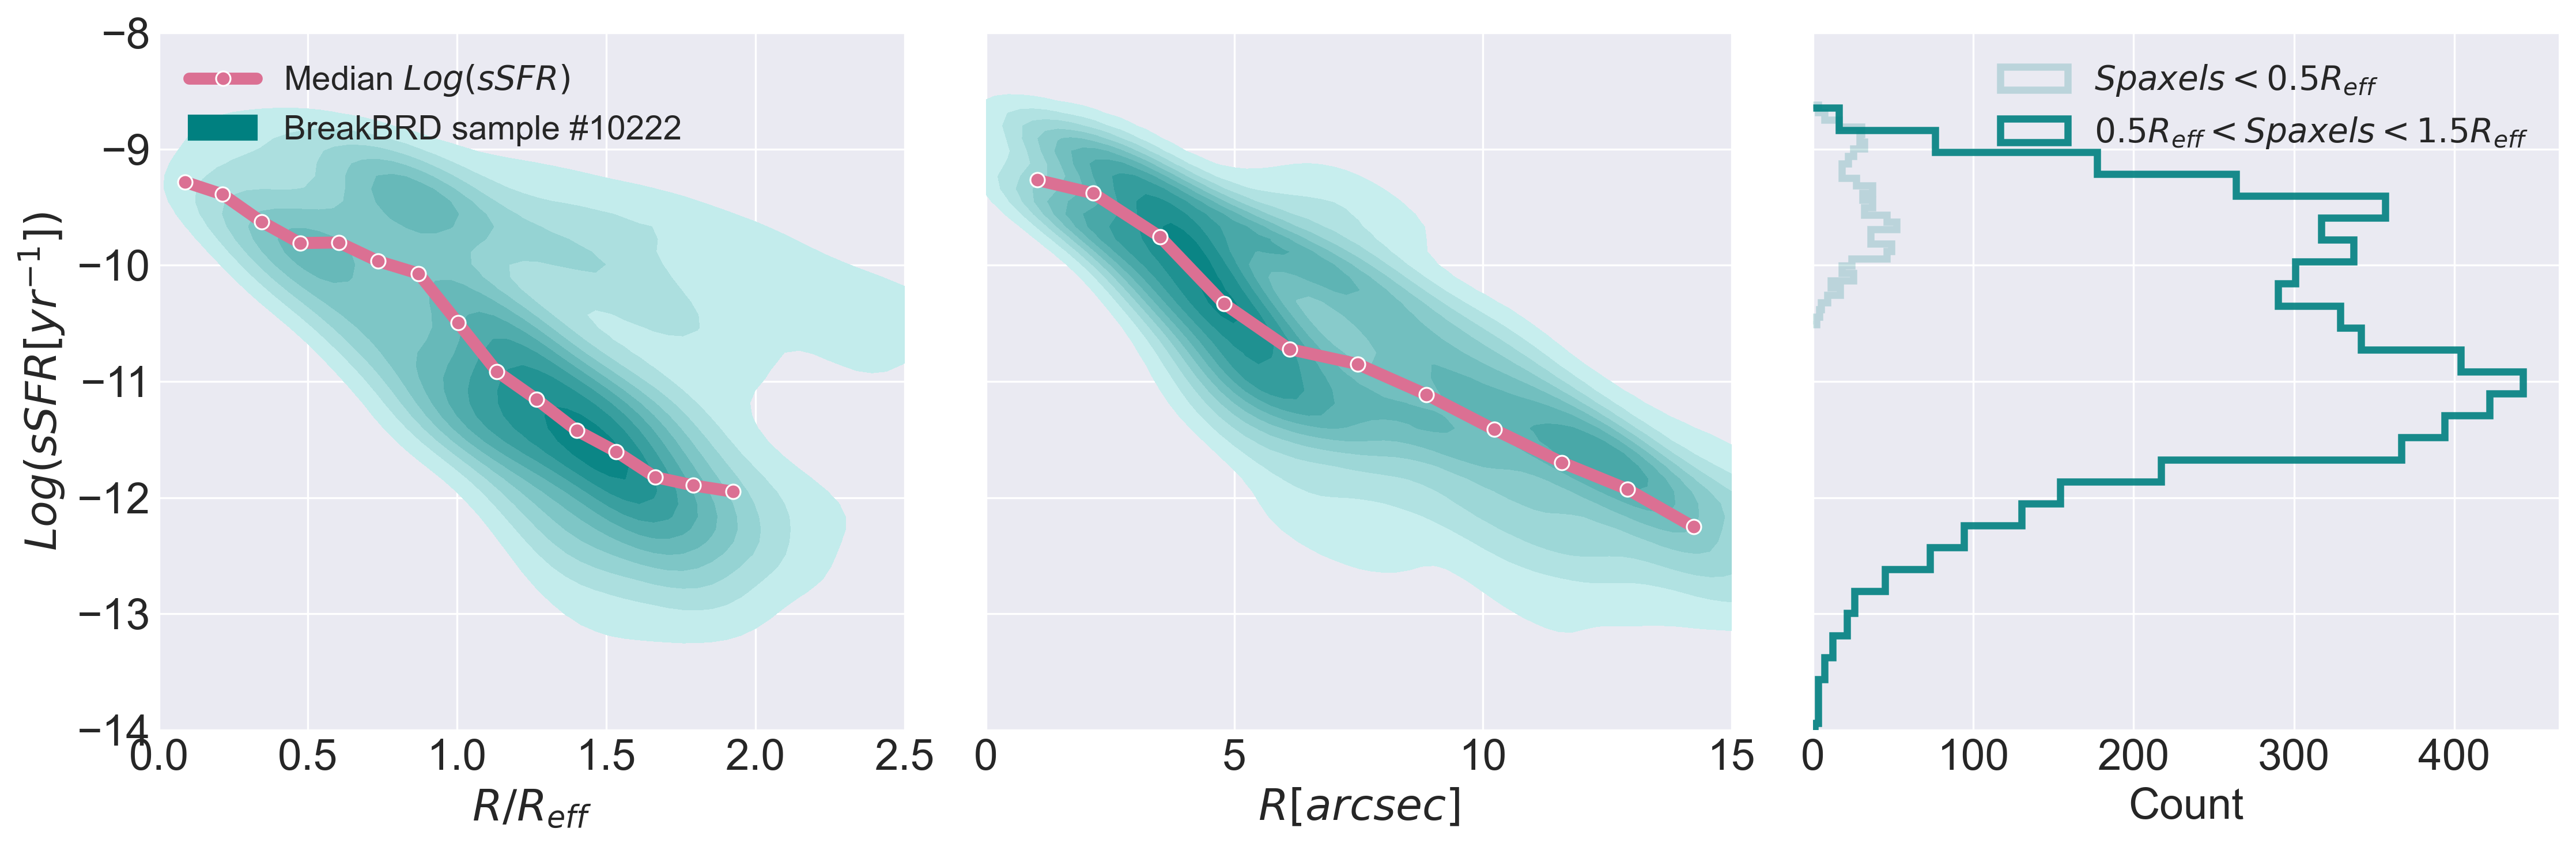

In [13]:
# Copy the combo csv to drop nan values but keep the combo_df from changing
bbrd_combo_cp_df = bbrd_combo_df.copy()
bbrd_combo_cp_df.dropna(subset=['MSUN/SPX2', 'LOGSFR DENSITY', 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)


# Make central spaxels dataframe
central_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.0, max=0.5)
outer_spaxels_df = radial_intergration(df=bbrd_combo_cp_df, radius_series_str='R/REFF', min=0.5, max=1.5)

# Read in D4000 data from DAP and Pipe3d
ydata0 = bbrd_combo_cp_df['LOGSFR DENSITY'] - bbrd_combo_cp_df['MSUN/SPX2']


# Read in error data
# ydata0_err = bbrd_combo_cp_df['MSUN_ERR']

# Read in radial data
xdata0 = bbrd_combo_cp_df['ELLIP R'] # Elliptical radius
xdata1 = bbrd_combo_cp_df['R/REFF']
xdata2 = bbrd_combo_cp_df['R_KPC']



###### R/Reff
# Bin xdata and ydata into even bins of R/Reff and take median value
bins = np.linspace(0, 2, 16)
digitized = np.digitize(xdata1, bins)
xdata1_reffbin_meds = [xdata1[digitized == i].median() for i in range(1, len(bins))]
ydata0_reffbin_meds = [ydata0[digitized == i].median() for i in range(1, len(bins))]
# ydata1_reffbin_meds = [ydata1[digitized == i].median() for i in range(1, len(bins))]
# ydata2_reffbin_meds = [ydata2[digitized == i].median() for i in range(1, len(bins))]

# Error binning into even bins of R/Reff
# ydata0_err_reffbin_meds = [ydata0_err[digitized == i].median() for i in range(1, len(bins))]



# Subplot
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), constrained_layout=False, dpi=300, sharey=True)


# AX0
sns.kdeplot(xdata1, ydata0, shade=True, shade_lowest=False, ax=ax0, color='teal', label='BreakBRD sample #{}'.format(len(ydata0)))
# sns.kdeplot(xdata1, ydata1, shade=True, shade_lowest=False, ax=ax0, color='teal', label='BreakBRD sample #{}'.format(len(ydata0)))
sns.lineplot(xdata1_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='palevioletred', label=r'Median $Log(sSFR)$', linewidth=5)
# sns.lineplot(xdata1_reffbin_meds, ydata1_reffbin_meds, ax=ax0, marker="o", color='purple', label=r'$Log(\Sigma_{SFR}[M_{\odot}yr^{-1}kpc^{-2}])$', linewidth=5)

# ax0.hlines(1.4, 0,3, color='teal')
ax0.grid(True)
ax0.set_xlim(0, 2.5)
ax0.set_ylim(-14, -8.0)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_xlabel(r'$R/R_{eff}$', fontsize=18)
ax0.set_ylabel(r'$Log(sSFR[yr^{-1}])$', fontsize=18)
ax0.legend(ncol=1, fontsize=14, loc='upper left')

# AX1

###### Elliptical radius
# Bin xdata and ydata into even bins of Elliptical and take median value
bins = np.linspace(0, 15, 12)
digitized = np.digitize(xdata0, bins)
xdata0_elliprbin_meds = [xdata0[digitized == i].median() for i in range(1, len(bins))]
ydata0_elliprbin_meds = [ydata0[digitized == i].median() for i in range(1, len(bins))]
# ydata1_elliprbin_meds = [ydata1[digitized == i].median() for i in range(1, len(bins))]
# ydata2_elliprbin_meds = [ydata2[digitized == i].median() for i in range(1, len(bins))]

# Error binning into even bins of R/Reff
# ydata0_err_elliprbin_meds = [ydata0_err[digitized == i].median() for i in range(1, len(bins))]
# ydata1_err_elliprbin_meds = [ydata1_err[digitized == i].median() for i in range(1, len(bins))]
# ydata2_err_elliprbin_meds = [ydata2_err[digitized == i].median() for i in range(1, len(bins))]


# sns.scatterplot(xdata0, ydata0)
sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax1, color='teal', label='BreakBRD sample', legend=False)
sns.lineplot(xdata0_elliprbin_meds, ydata0_elliprbin_meds, ax=ax1, marker="o", color='palevioletred', label=r'$Log(sSFR[yr^{-1}])$', legend=False, linewidth=5)
# ax1.errorbar(xdata0_elliprbin_meds, ydata0_elliprbin_meds, yerr=ydata0_err_elliprbin_meds, color='green')
# sns.lineplot(xdata0_elliprbin_meds, ydata1_elliprbin_meds, ax=ax1, marker="o", color='red', label='DAP D4000', legend=False, linewidth=5)
# ax1.errorbar(xdata0_elliprbin_meds, ydata1_elliprbin_meds, yerr=1/np.sqrt(ydata1_err_elliprbin_meds), color='red')
# sns.lineplot(xdata0_elliprbin_meds, ydata2_elliprbin_meds, ax=ax1, marker="o", color='navy', label='Pipe3D D4000', legend=False, linewidth=5)
# ax1.hlines(1.4, 0,16, color='red')
ax1.grid(True)
ax1.set_xlim(0, 15)
ax1.tick_params(axis='x', labelsize=18)
ax1.set_xlabel(r'$R[arcsec]$', fontsize=18)
ax1.set_ylabel(' ')


# AX2
# ydata0_cp = np.copy(ydata0)
# ydata0_cp[ydata0_cp==0.0]=np.nan
# central_cp = np.copy(central_spaxels_df['LOGSFR DENSITY'])
# central_cp[central_cp==0.0]=np.nan
# outer_cp = np.copy(outer_spaxels_df['LOGSFR DENSITY'])
# outer_cp[outer_cp==0.0]=np.nan

# sns.distplot(ydata0_cp, bins=200, ax=ax2, kde=False, color='blue')
# bbrd_combo_cp_df['LOGSFR DENSITY'] - bbrd_combo_cp_df['MSUN/SPX2']
sns.distplot(central_spaxels_df['LOGSFR DENSITY'] - central_spaxels_df['MSUN/SPX2'], bins=30, ax=ax2, kde=False, color='teal', hist_kws={"histtype": "step", "linewidth": 3, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(outer_spaxels_df['LOGSFR DENSITY'] - outer_spaxels_df['MSUN/SPX2'], bins=30, ax=ax2, kde=False, color='teal', hist_kws={"histtype": "step", "linewidth": 3,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')
ax2.grid(True)
ax2.set_xlabel('Count', fontsize=18)
ax2.set_ylabel(' ')
ax2.tick_params(axis='x', labelsize=18)
ax2.legend(fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/sSFR_dist_radpro.jpeg")
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/sSFR_dist_radpro.pdf")

In [14]:
#################################################################################

# Compare AGN, merger, spiral and barred galaxies radial profile

In [15]:
bbrd_agn_df = pd.read_csv('/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/bbrd_agn_combo.csv')
bbrd_merger_df = pd.read_csv('/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/8595-3703_map.csv')

In [16]:
# def dataframe_reff_bin_med_dist(df, ydata0_series_str, ydata0err_series_str, bins):
#     # Replace lower values of working with Age
#     if ydata0_series_str == 'GYR_LW':
#     # df = df.copy()
#         df[df[ydata0_series_str] < 5.0] = np.nan
#     # df.head()
#     else:
#         pass
    
    
#     df.dropna(subset=[ydata0_series_str, ydata0err_series_str, 'ELLIP R', 'R/REFF','R_KPC'], inplace=True)

#     # Make central spaxels dataframe from Combo
#     central_spaxels_df = radial_intergration(df=df, radius_series_str='R/REFF', min=0.0, max=0.5)
#     outer_spaxels_df = radial_intergration(df=df, radius_series_str='R/REFF', min=0.5, max=1.5)


#     # Read in radial data
#     xdata0 = df['R/REFF']

#     # Properties for raidal profile
#     ydata0 = df[ydata0_series_str]
#     ydata0_err = df[ydata0err_series_str] # property error


#     ###### R/Reff
#     # Bin xdata and ydata into even bins of R/Reff and take median value
#     # bins = np.linspace(0, 2, 16)
#     digitized = np.digitize(xdata0, bins)
#     xdata0_reffbin_meds = [xdata0[digitized == i].median() for i in range(1, len(bins))]
#     ydata0_reffbin_meds = [ydata0[digitized == i].median() for i in range(1, len(bins))]

#     # Error binning into even bins of R/Reff
#     ydata0_err_reffbin_meds = [ydata0_err[digitized == i].median() for i in range(1, len(bins))]

#     return xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df

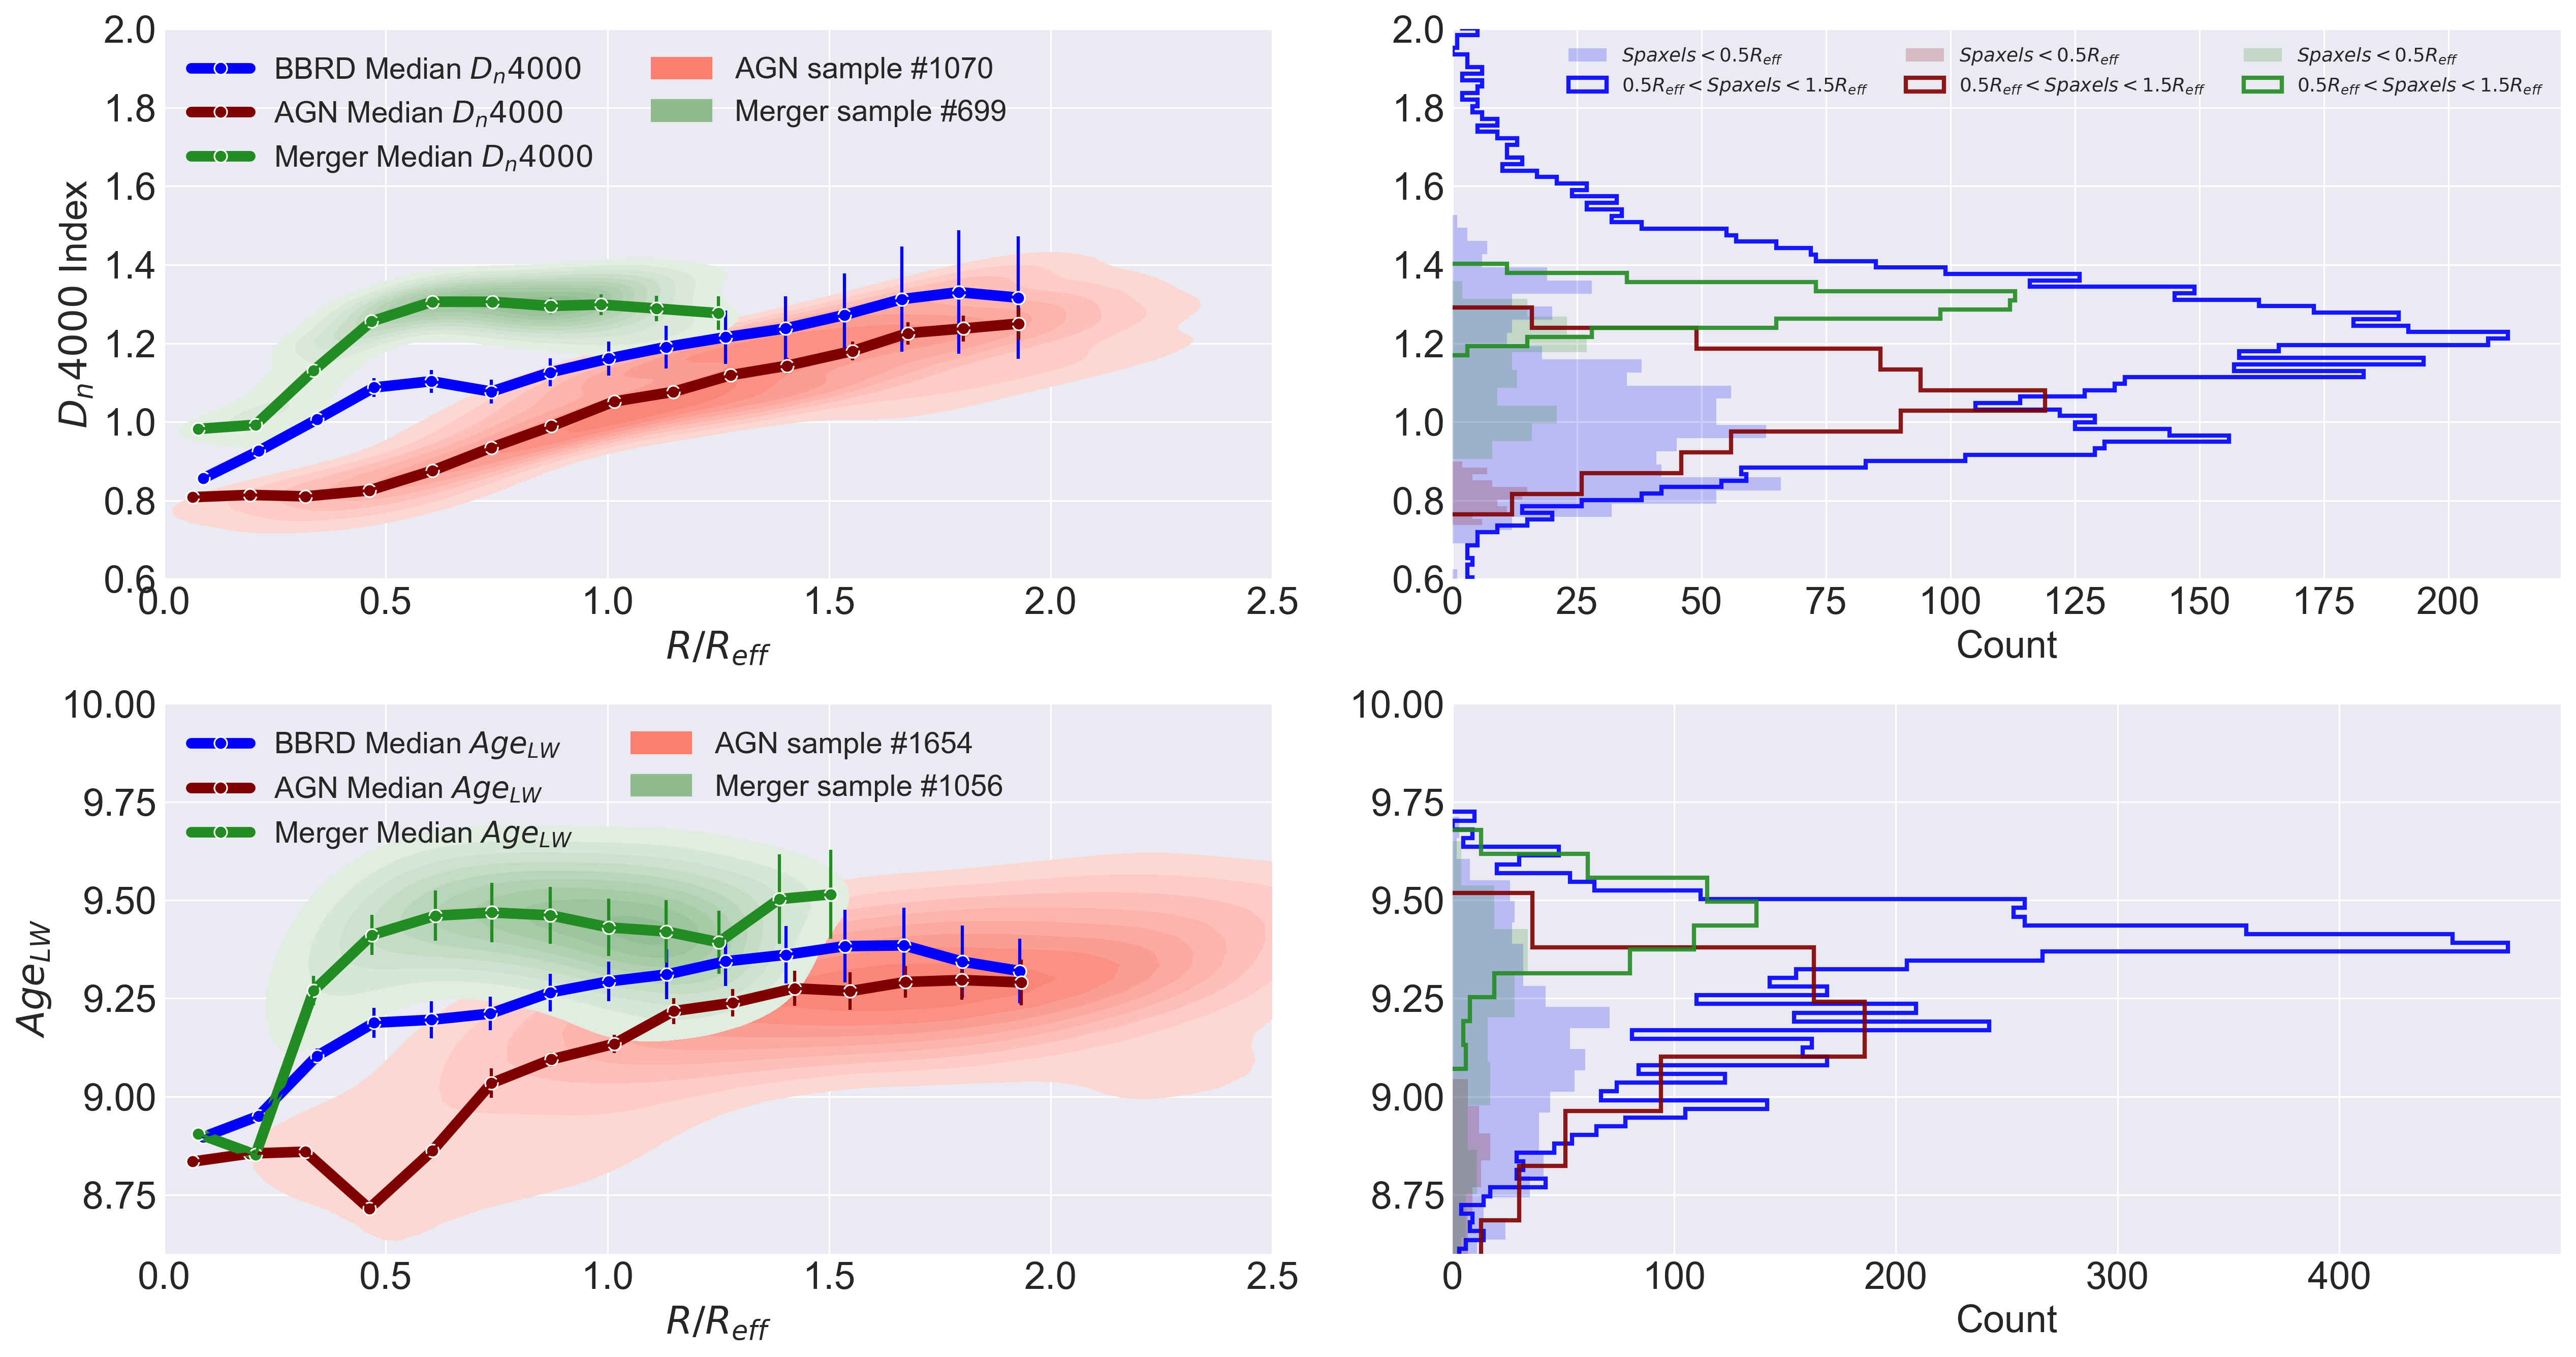

In [17]:
# Remove drop nan values for kde plot from dataframes
# Copy the combo csv to drop nan values but keep the combo_df from changing

# Dn4000
##################### Combo Dn4000
bbrd_combo_Dn4000_df = bbrd_combo_df.copy()
xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_combo_Dn4000_df, 'DAP_DN4000', 'DAP_DN4000_IVAR', bins = np.linspace(0, 2, 16))

##################### AGN Dn4000
bbrd_agn_Dn4000_df = bbrd_agn_df.copy()
agn_xdata0, agn_ydata0, agn_ydata0_err, agn_xdata0_reffbin_meds, agn_ydata0_reffbin_meds, agn_ydata0_err_reffbin_meds, agn_central_spaxels_df, agn_outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_agn_Dn4000_df, 'DAP_DN4000', 'DAP_DN4000_IVAR', bins = np.linspace(0, 2, 16))

#################### Merger Dn4000
bbrd_merger_Dn4000_df = bbrd_merger_df.copy()
merger_xdata0, merger_ydata0, merger_ydata0_err, merger_xdata0_reffbin_meds, merger_ydata0_reffbin_meds, merger_ydata0_err_reffbin_meds, merger_central_spaxels_df, merger_outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_merger_Dn4000_df, 'DAP_DN4000', 'DAP_DN4000_IVAR', bins = np.linspace(0, 2, 16))

# AgeLW
##################### Combo AgeLW
bbrd_combo_ageLW_df = bbrd_combo_df.copy()
ageLW_xdata0, ageLW_ydata0, ageLW_ydata0_err, ageLW_xdata0_reffbin_meds, ageLW_ydata0_reffbin_meds, ageLW_ydata0_err_reffbin_meds, ageLW_central_spaxels_df, ageLW_outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_combo_ageLW_df, 'GYR_LW', 'GYR_ERR', bins = np.linspace(0, 2, 16))

##################### AGN AgeLW
bbrd_agn_ageLW_df = bbrd_agn_df.copy()
agn_ageLW_xdata0, agn_ageLW_ydata0, agn_ageLW_ydata0_err, agn_ageLW_xdata0_reffbin_meds, agn_ageLW_ydata0_reffbin_meds, agn_ageLW_ydata0_err_reffbin_meds, agn_ageLW_central_spaxels_df, agn_ageLW_outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_agn_ageLW_df, 'GYR_LW', 'GYR_ERR', bins = np.linspace(0, 2, 16))


#################### Merger AgeLW
bbrd_merger_ageLW_df = bbrd_merger_df.copy()
merger_ageLW_xdata0, merger_ageLW_ydata0, merger_ageLW_ydata0_err, merger_ageLW_xdata0_reffbin_meds, merger_ageLW_ydata0_reffbin_meds, merger_ageLW_ydata0_err_reffbin_meds, merger_ageLW_central_spaxels_df, merger_ageLW_outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_merger_ageLW_df, 'GYR_LW', 'GYR_ERR', bins = np.linspace(0, 2, 16))


# Subplot
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(17,9), constrained_layout=False, dpi=300, sharey=False, sharex=False)

#AX0
# sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax0, color='grey', label='BreakBRD sample #{}'.format(len(ydata0)))
sns.lineplot(xdata0_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='blue', label=r'BBRD Median $D_{n}4000$', linewidth=5)
ax0.errorbar(xdata0_reffbin_meds, ydata0_reffbin_meds, yerr=1/np.sqrt(ydata0_err_reffbin_meds), color='blue')

# # AGN
sns.kdeplot(agn_xdata0, agn_ydata0, shade=True, shade_lowest=False, ax=ax0, color='salmon', label='AGN sample #{}'.format(len(agn_ydata0)))
sns.lineplot(agn_xdata0_reffbin_meds, agn_ydata0_reffbin_meds, ax=ax0, marker="o", color='maroon', label=r'AGN Median $D_{n}4000$', linewidth=5)
ax0.errorbar(agn_xdata0_reffbin_meds, agn_ydata0_reffbin_meds, yerr=1/np.sqrt(agn_ydata0_err_reffbin_meds), color='maroon')

# # merger
sns.kdeplot(merger_xdata0, merger_ydata0, shade=True, shade_lowest=False, ax=ax0, color='darkseagreen', label='Merger sample #{}'.format(len(merger_ydata0)))
sns.lineplot(merger_xdata0_reffbin_meds, merger_ydata0_reffbin_meds, ax=ax0, marker="o", color='forestgreen', label=r'Merger Median $D_{n}4000$', linewidth=5)
ax0.errorbar(merger_xdata0_reffbin_meds, merger_ydata0_reffbin_meds, yerr=1/np.sqrt(merger_ydata0_err_reffbin_meds), color='forestgreen')

ax0.grid(True)
ax0.set_xlim(0, 2.5)
ax0.set_ylim(0.6, 2.0)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_xlabel(r'$R/R_{eff}$', fontsize=18)
ax0.set_ylabel(r'$D_{n}4000$ Index', fontsize=18)
ax0.legend(ncol=2, fontsize=14, loc='upper left')
plt.tight_layout()


# D4000 Historgam 
# Ax1
sns.distplot(central_spaxels_df['DAP_DN4000'], bins=30, ax=ax1, kde=False, color='blue', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(outer_spaxels_df['DAP_DN4000'], bins=100, ax=ax1, kde=False, color='blue', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')

# AGN
sns.distplot(agn_central_spaxels_df['DAP_DN4000'], bins=10, ax=ax1, kde=False, color='maroon', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(agn_outer_spaxels_df['DAP_DN4000'], bins=10, ax=ax1, kde=False, color='maroon', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')

# Merger
sns.distplot(merger_central_spaxels_df['DAP_DN4000'], bins=10, ax=ax1, kde=False, color='forestgreen', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(merger_outer_spaxels_df['DAP_DN4000'], bins=10, ax=ax1, kde=False, color='forestgreen', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')

ax1.grid(True)
ax1.set_xlabel('Count', fontsize=18)
ax1.set_ylabel(' ')
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0.6, 2.0)
ax1.legend(fontsize=9, loc='upper right', ncol=3)


#AX2
# Age
# sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax2, color='grey', label='BreakBRD sample #{}'.format(len(ydata0)))
sns.lineplot(ageLW_xdata0_reffbin_meds, ageLW_ydata0_reffbin_meds, ax=ax2, marker="o", color='blue', label=r'BBRD Median $Age_{LW}$', linewidth=5, legend=False)
ax2.errorbar(ageLW_xdata0_reffbin_meds, ageLW_ydata0_reffbin_meds, yerr=(ageLW_ydata0_err_reffbin_meds), color='blue')

# # AGN
sns.kdeplot(agn_ageLW_xdata0, agn_ageLW_ydata0, shade=True, shade_lowest=False, ax=ax2, color='salmon', label='AGN sample #{}'.format(len(agn_ageLW_ydata0)), legend=False)
sns.lineplot(agn_ageLW_xdata0_reffbin_meds, agn_ageLW_ydata0_reffbin_meds, ax=ax2, marker="o", color='maroon', label=r'AGN Median $Age_{LW}$', linewidth=5, legend=False)
ax2.errorbar(agn_ageLW_xdata0_reffbin_meds, agn_ageLW_ydata0_reffbin_meds, yerr=(agn_ageLW_ydata0_err_reffbin_meds), color='maroon')

# # merger
sns.kdeplot(merger_ageLW_xdata0, merger_ageLW_ydata0, shade=True, shade_lowest=False, ax=ax2, color='darkseagreen', label='Merger sample #{}'.format(len(merger_ageLW_ydata0)), legend=False)
sns.lineplot(merger_ageLW_xdata0_reffbin_meds, merger_ageLW_ydata0_reffbin_meds, ax=ax2, marker="o", color='forestgreen', label=r'Merger Median $Age_{LW}$', linewidth=5, legend=False)
ax2.errorbar(merger_ageLW_xdata0_reffbin_meds, merger_ageLW_ydata0_reffbin_meds, yerr=(merger_ageLW_ydata0_err_reffbin_meds), color='forestgreen')

ax2.grid(True)
ax2.set_xlim(0, 2.5)
ax2.set_ylim(8.6, 10.0)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_xlabel(r'$R/R_{eff}$', fontsize=18)
ax2.set_ylabel(r'$Age_{LW}$', fontsize=18)
ax2.legend(ncol=2, fontsize=14, loc='upper left')



# AX3
# Age Historgam 
# Ax1
sns.distplot(central_spaxels_df['GYR_LW'], bins=30, ax=ax3, kde=False, color='blue', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(outer_spaxels_df['GYR_LW'], bins=100, ax=ax3, kde=False, color='blue', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')

# AGN
sns.distplot(agn_central_spaxels_df['GYR_LW'], bins=10, ax=ax3, kde=False, color='maroon', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(agn_outer_spaxels_df['GYR_LW'], bins=10, ax=ax3, kde=False, color='maroon', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')

# Merger
sns.distplot(merger_central_spaxels_df['GYR_LW'], bins=10, ax=ax3, kde=False, color='forestgreen', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(merger_outer_spaxels_df['GYR_LW'], bins=10, ax=ax3, kde=False, color='forestgreen', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')

ax3.grid(True)
ax3.set_xlabel('Count', fontsize=18)
ax3.set_ylabel(' ')
ax3.tick_params(axis='x', labelsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_ylim(8.6, 10.0)
# ax3.legend(fontsize=9, loc='upper right', ncol=3)
plt.tight_layout()

plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/Age_indicators_dist_radpro.jpeg")
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/Age_indicators_dist_radpro.pdf")

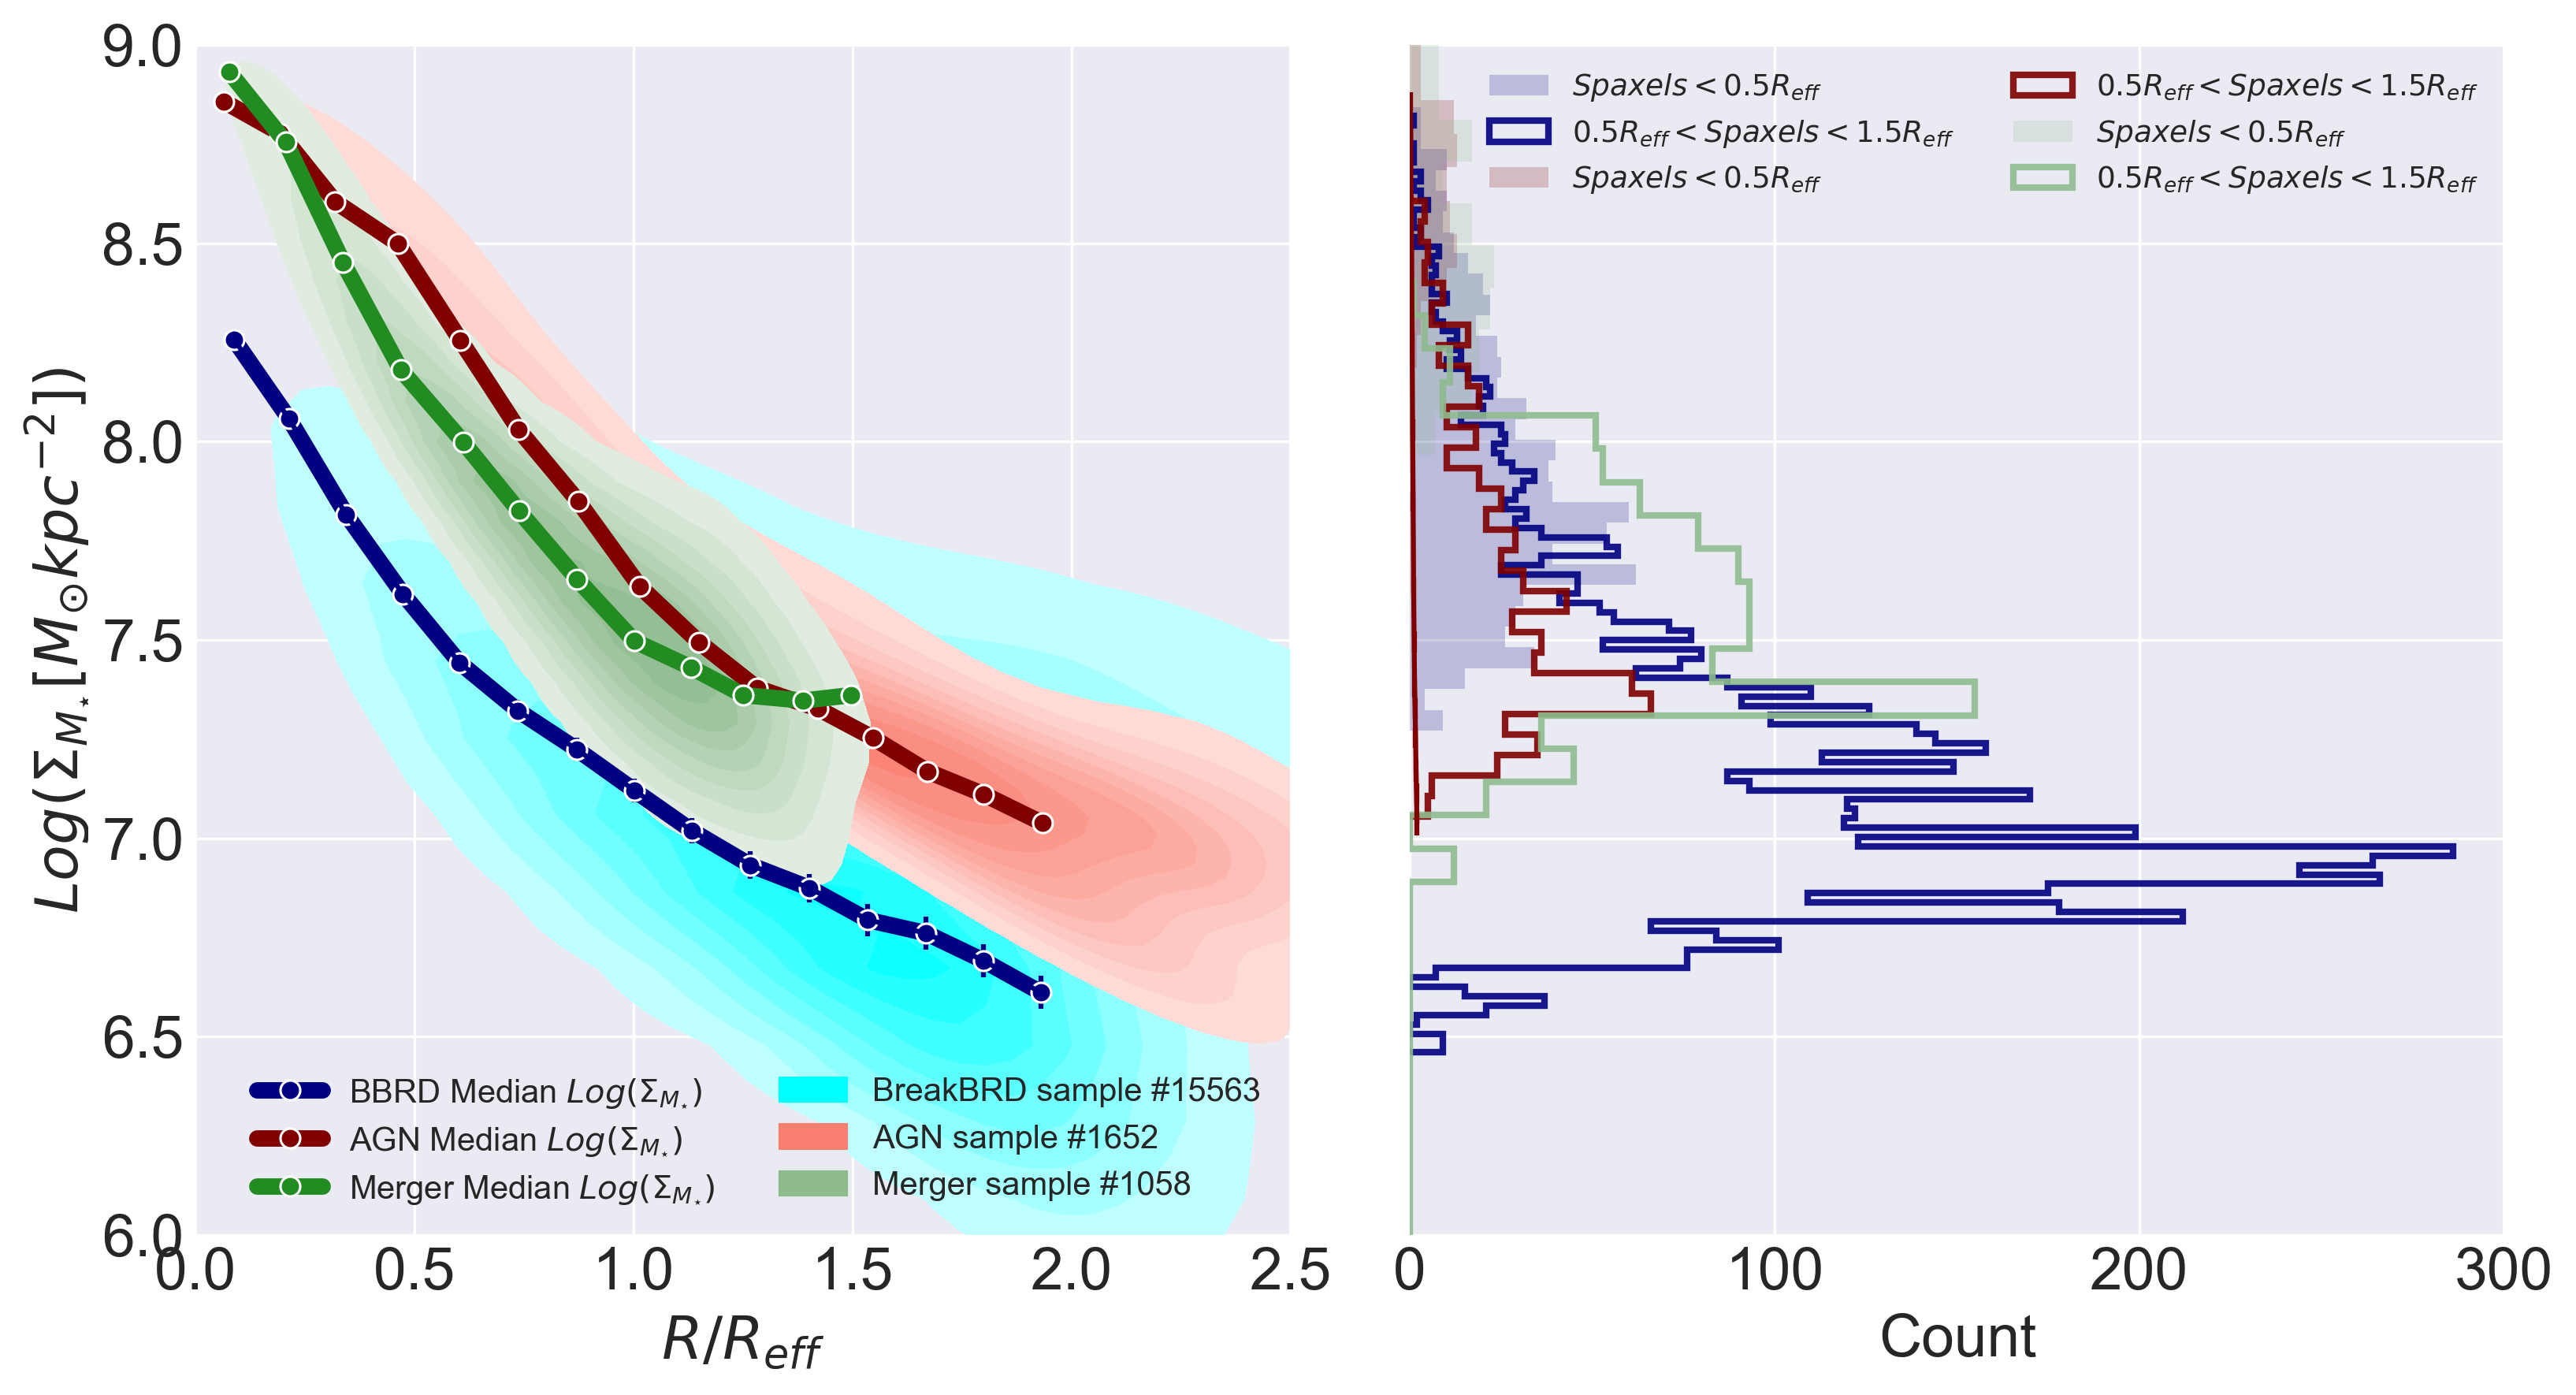

In [18]:
# Remove drop nan values for kde plot from dataframes
# Copy the combo csv to drop nan values but keep the combo_df from changing

# Dn4000
##################### Combo Dn4000
bbrd_combo_Mass_df = bbrd_combo_df.copy()
xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_combo_Mass_df, 'MSUN/SPX2', 'MSUN_ERR', bins = np.linspace(0, 2, 16))

bbrd_agn_mass_df = bbrd_agn_df.copy()
agn_mass_xdata0, agn_mass_ydata0, agn_mass_ydata0_err, agn_mass_xdata0_reffbin_meds, agn_mass_ydata0_reffbin_meds, agn_mass_ydata0_err_reffbin_meds, agn_mass_central_spaxels_df, agn_mass_outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_agn_mass_df, 'MSUN/SPX2', 'MSUN_ERR', bins = np.linspace(0, 2, 16))

bbrd_merger_mass_df = bbrd_merger_df.copy()
merger_mass_xdata0, merger_mass_ydata0, merger_mass_ydata0_err, merger_mass_xdata0_reffbin_meds, merger_mass_ydata0_reffbin_meds, merger_mass_ydata0_err_reffbin_meds, merger_mass_central_spaxels_df, merger_mass_outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_merger_mass_df, 'MSUN/SPX2', 'MSUN_ERR', bins = np.linspace(0, 2, 16))


# Subplot
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(11,6), constrained_layout=False, dpi=300, sharey=True, sharex=False)

#AX0
sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax0, color='cyan', label='BreakBRD sample #{}'.format(len(ydata0)))
sns.lineplot(xdata0_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='navy', label=r'BBRD Median $Log(\Sigma_{M_{\star}})$', linewidth=5)
ax0.errorbar(xdata0_reffbin_meds, ydata0_reffbin_meds, yerr=ydata0_err_reffbin_meds, color='navy')

sns.kdeplot(agn_mass_xdata0, agn_mass_ydata0, shade=True, shade_lowest=False, ax=ax0, color='salmon', label='AGN sample #{}'.format(len(agn_mass_ydata0)))
sns.lineplot(agn_mass_xdata0_reffbin_meds, agn_mass_ydata0_reffbin_meds, ax=ax0, marker="o", color='maroon', label=r'AGN Median $Log(\Sigma_{M_{\star}})$', linewidth=5)
ax1.errorbar(agn_mass_xdata0_reffbin_meds, agn_mass_ydata0_reffbin_meds, yerr=agn_mass_ydata0_err_reffbin_meds, color='maroon')

sns.kdeplot(merger_mass_xdata0, merger_mass_ydata0, shade=True, shade_lowest=False, ax=ax0, color='darkseagreen', label='Merger sample #{}'.format(len(merger_mass_ydata0)))
sns.lineplot(merger_mass_xdata0_reffbin_meds, merger_mass_ydata0_reffbin_meds, ax=ax0, marker="o", color='forestgreen', label=r'Merger Median $Log(\Sigma_{M_{\star}})$', linewidth=5)
ax2.errorbar(merger_mass_xdata0_reffbin_meds, merger_mass_ydata0_reffbin_meds, yerr=agn_mass_ydata0_err_reffbin_meds, color='forestgreen')


ax0.grid(True)
ax0.set_xlim(0, 2.5)
ax0.set_ylim(6.0, 9.0)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_xlabel(r'$R/R_{eff}$', fontsize=18)
ax0.set_ylabel(r'$Log(\Sigma_{M_{\star}}[M_{\odot}kpc^{-2}])$', fontsize=18)
ax0.legend(ncol=2, fontsize=10, loc='lower right')



# Mass Historgam 
# Ax1
#BBRD
sns.distplot(central_spaxels_df['MSUN/SPX2'], bins=30, ax=ax1, kde=False, color='navy', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(outer_spaxels_df['MSUN/SPX2'], bins=100, ax=ax1, kde=False, color='navy', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')

#AGN
sns.distplot(agn_mass_central_spaxels_df['MSUN/SPX2'], bins=10, ax=ax1, kde=False, color='maroon', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(agn_mass_outer_spaxels_df['MSUN/SPX2'], bins=30, ax=ax1, kde=False, color='maroon', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')

#Merger
sns.distplot(merger_mass_central_spaxels_df['MSUN/SPX2'], bins=10, ax=ax1, kde=False, color='darkseagreen', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(merger_mass_outer_spaxels_df['MSUN/SPX2'], bins=100, ax=ax1, kde=False, color='darkseagreen', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')


ax1.grid(True)
ax1.set_xlabel('Count', fontsize=18)
ax1.set_ylabel(' ')
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
# ax1.set_ylim(0.6, 2.0)
ax1.legend(fontsize=9, loc='upper right', ncol=2)

plt.tight_layout()
# #AX2

# ax2.grid(True)
# # ax2.set_xlim(0, 2.5)
# # ax2.set_ylim(8.6, 10.0)
# ax2.tick_params(axis='x', labelsize=18)
# ax2.tick_params(axis='y', labelsize=18)
# ax2.set_xlabel(r'$R/R_{eff}$', fontsize=18)
# ax2.set_ylabel(r'$Age_{LW}$', fontsize=18)
# ax2.legend(ncol=2, fontsize=14, loc='upper left')



# # AX3
# # Age Historgam 
# # Ax1
# sns.distplot(central_spaxels_df['MSUN/SPX2'], bins=30, ax=ax3, kde=False, color='blue', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
# sns.distplot(outer_spaxels_df['MSUN/SPX2'], bins=100, ax=ax3, kde=False, color='blue', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')


# ax3.grid(True)
# ax3.set_xlabel('Count', fontsize=18)
# ax3.set_ylabel(' ')
# ax3.tick_params(axis='x', labelsize=18)
# ax3.tick_params(axis='y', labelsize=18)
# # ax3.set_ylim(8.6, 10.0)
# # ax3.legend(fontsize=9, loc='upper right', ncol=3)
plt.tight_layout()

plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/Masscomp_dist_radpro.jpeg")
plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/Masscomp_dist_radpro.pdf")

In [19]:
bbrd_combo_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'HALPHA', 'HALPHA KCORR', 'HBETA KCORR',
       'NII6585 KCORR', 'OII3727 KCORR', 'OII3729 KCORR', 'OIII5008 KCORR',
       'SII6718 KCORR', 'SII6732 KCORR', 'HALPHA SNR', 'HBETA SNR',
       'NII6585 SNR', 'OII3727 SNR', 'OII3729 SNR', 'OIII5008 SNR',
       'SII6718 SNR', 'SII6732 SNR', 'HALPHA ERROR', 'HBETA ERROR',
       'NII6585 ERROR', 'OII3727 ERROR', 'OII3729 ERROR', 'OIII5008 ERROR',
       'SII6718 ERROR', 'SII6732 ERROR', 'HALPHA_DQ', 'HA/HB', 'HA LUM',
       'LOGSFR', 'LOGSFR DENSITY', 'ELLIP R', 'R/REFF', 'LOG(O/H)+12_[N2O2]',
       'LOG(O/H)+12_[O3N2]', 'LOG(O/H)+12_[N2]', 'GYR_LW', 'GYR_MW', 'GYR_ERR',
       'SP_ZSUBL', 'SP_ZSUBM', 'SP_ZERR', 'VEL_KM/S', 'VEL_ERR]', 'VDISP_KM/S',
       'VDISP_ERR', 'M/L', 'MSUN/SPX2', 'MSUN/ARCS2', 'MSUN_ERR', 'D4000',
       'D4000_ERR', 'HDELTA', 'HDELTA_ERR', 'O3HB_RATIO', 'N2HA_RATIO',
       'BPT_CLASS', 'B20_DELTASFR', 'B20_SFRD', 'B20_SFRD_UPLIM',
       'B20_SFRD_LOWLIM', 'DAP_D4000', 'DA

# Stellar Velocity Dispersion

<ErrorbarContainer object of 3 artists>

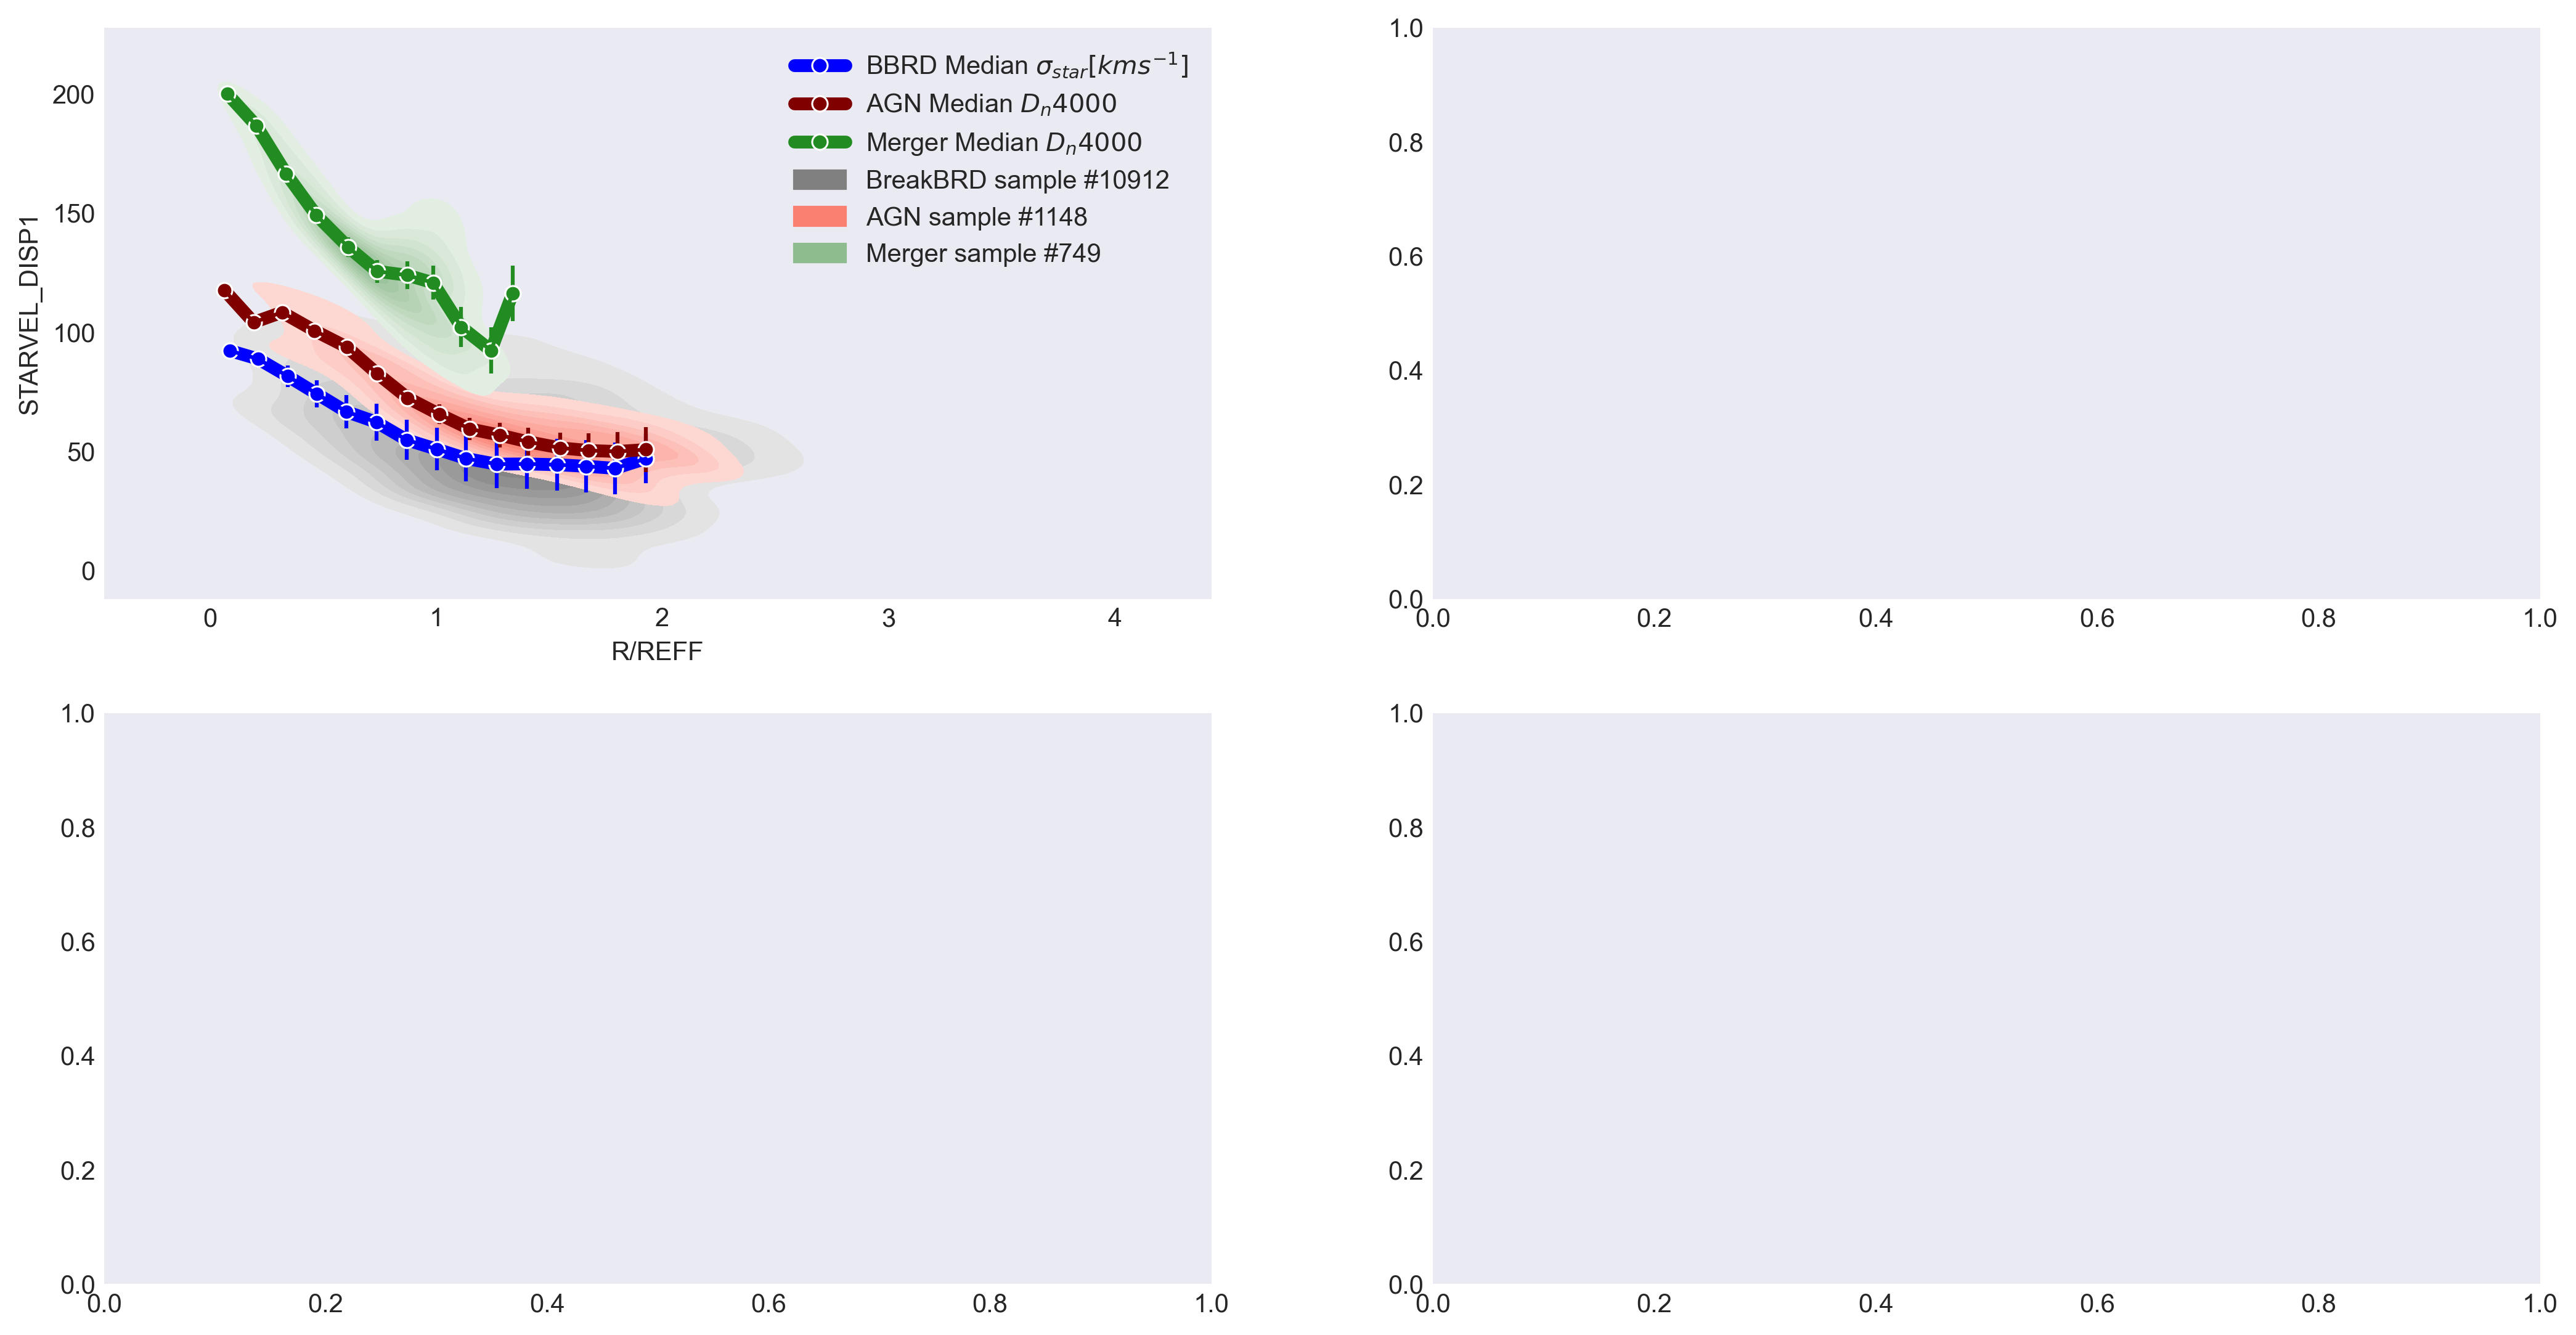

In [20]:
# Stellar velocity dispersion

##################### Combo Dn4000
bbrd_combo_Vdisp_star_df = bbrd_combo_df.copy()
xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_combo_Vdisp_star_df, 'STARVEL_DISP1', 'STARVEL_DISPERR', bins = np.linspace(0, 2, 16))

##################### AGN Dn4000
bbrd_agn_Vdisp_star_df = bbrd_agn_df.copy()
agn_xdata0, agn_ydata0, agn_ydata0_err, agn_xdata0_reffbin_meds, agn_ydata0_reffbin_meds, agn_ydata0_err_reffbin_meds, agn_central_spaxels_df, agn_outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_agn_Vdisp_star_df, 'STARVEL_DISP1', 'STARVEL_DISPERR', bins = np.linspace(0, 2, 16))

#################### Merger Dn4000
bbrd_merger_Vdisp_star_df = bbrd_merger_df.copy()
merger_xdata0, merger_ydata0, merger_ydata0_err, merger_xdata0_reffbin_meds, merger_ydata0_reffbin_meds, merger_ydata0_err_reffbin_meds, merger_central_spaxels_df, merger_outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_merger_Vdisp_star_df, 'STARVEL_DISP1', 'STARVEL_DISPERR', bins = np.linspace(0, 2, 16))


# Subplot
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(17,9), constrained_layout=False, dpi=300, sharey=False, sharex=False)

#AX0
sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax0, color='grey', label='BreakBRD sample #{}'.format(len(ydata0)))
# sns.scatterplot(xdata0, ydata0, ax=ax0)
sns.lineplot(xdata0_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='blue', label=r'BBRD Median $\sigma_{star}[kms^{-1}]$', linewidth=5)
ax0.errorbar(xdata0_reffbin_meds, ydata0_reffbin_meds, yerr=1/np.sqrt(ydata0_err_reffbin_meds), color='blue')

# # AGN
sns.kdeplot(agn_xdata0, agn_ydata0, shade=True, shade_lowest=False, ax=ax0, color='salmon', label='AGN sample #{}'.format(len(agn_ydata0)))
sns.lineplot(agn_xdata0_reffbin_meds, agn_ydata0_reffbin_meds, ax=ax0, marker="o", color='maroon', label=r'AGN Median $D_{n}4000$', linewidth=5)
ax0.errorbar(agn_xdata0_reffbin_meds, agn_ydata0_reffbin_meds, yerr=1/np.sqrt(agn_ydata0_err_reffbin_meds), color='maroon')

# # merger
sns.kdeplot(merger_xdata0, merger_ydata0, shade=True, shade_lowest=False, ax=ax0, color='darkseagreen', label='Merger sample #{}'.format(len(merger_ydata0)))
sns.lineplot(merger_xdata0_reffbin_meds, merger_ydata0_reffbin_meds, ax=ax0, marker="o", color='forestgreen', label=r'Merger Median $D_{n}4000$', linewidth=5)
ax0.errorbar(merger_xdata0_reffbin_meds, merger_ydata0_reffbin_meds, yerr=1/np.sqrt(merger_ydata0_err_reffbin_meds), color='forestgreen')




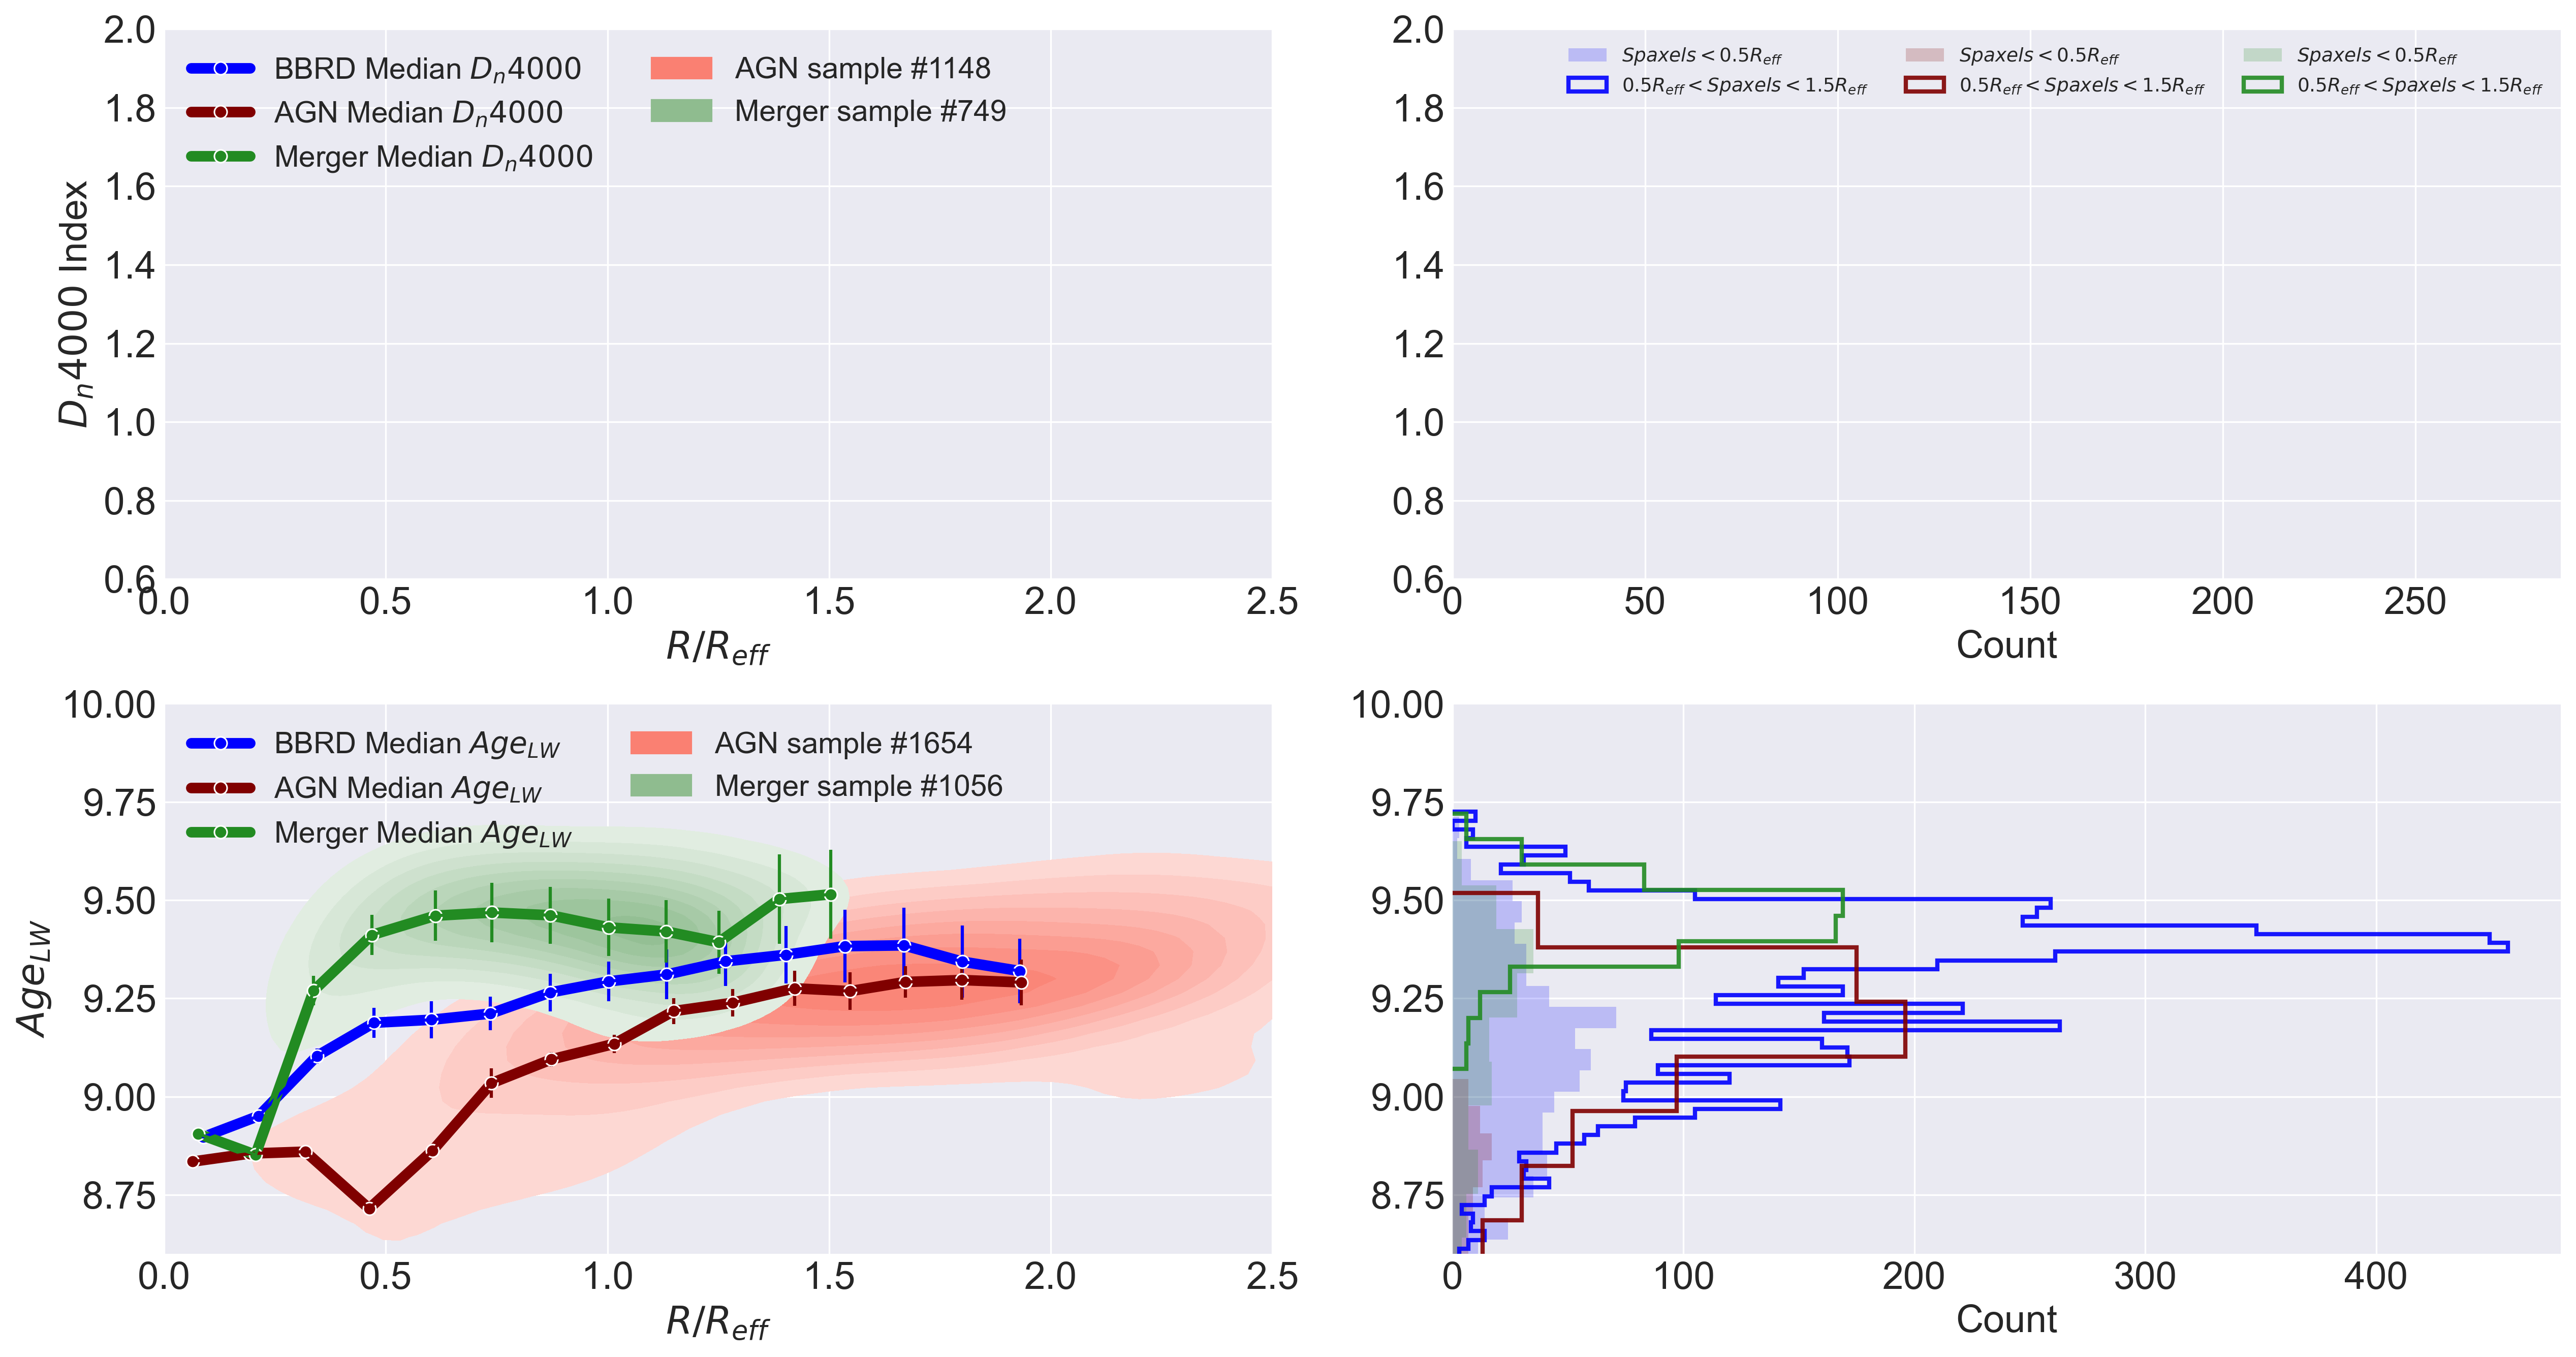

In [21]:


# Dn4000
##################### Combo Dn4000
bbrd_combo_Vgas_df = bbrd_combo_df.copy()
xdata0, ydata0, ydata0_err, xdata0_reffbin_meds, ydata0_reffbin_meds, ydata0_err_reffbin_meds, central_spaxels_df, outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_combo_Vgas_df, 'STARVEL_DISP1', 'STARVEL_DISPERR', bins = np.linspace(0, 2, 16))

##################### AGN Dn4000
bbrd_agn_Vgas_df = bbrd_agn_df.copy()
agn_xdata0, agn_ydata0, agn_ydata0_err, agn_xdata0_reffbin_meds, agn_ydata0_reffbin_meds, agn_ydata0_err_reffbin_meds, agn_central_spaxels_df, agn_outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_agn_Vgas_df, 'STARVEL_DISP1', 'STARVEL_DISPERR', bins = np.linspace(0, 2, 16))

#################### Merger Dn4000
bbrd_merger_Vgas_df = bbrd_merger_df.copy()
merger_xdata0, merger_ydata0, merger_ydata0_err, merger_xdata0_reffbin_meds, merger_ydata0_reffbin_meds, merger_ydata0_err_reffbin_meds, merger_central_spaxels_df, merger_outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_merger_Vgas_df, 'STARVEL_DISP1', 'STARVEL_DISPERR', bins = np.linspace(0, 2, 16))

# AgeLW
##################### Combo AgeLW
bbrd_combo_ageLW_df = bbrd_combo_df.copy()
ageLW_xdata0, ageLW_ydata0, ageLW_ydata0_err, ageLW_xdata0_reffbin_meds, ageLW_ydata0_reffbin_meds, ageLW_ydata0_err_reffbin_meds, ageLW_central_spaxels_df, ageLW_outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_combo_ageLW_df, 'GYR_LW', 'GYR_ERR', bins = np.linspace(0, 2, 16))

##################### AGN AgeLW
bbrd_agn_ageLW_df = bbrd_agn_df.copy()
agn_ageLW_xdata0, agn_ageLW_ydata0, agn_ageLW_ydata0_err, agn_ageLW_xdata0_reffbin_meds, agn_ageLW_ydata0_reffbin_meds, agn_ageLW_ydata0_err_reffbin_meds, agn_ageLW_central_spaxels_df, agn_ageLW_outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_agn_ageLW_df, 'GYR_LW', 'GYR_ERR', bins = np.linspace(0, 2, 16))


#################### Merger AgeLW
bbrd_merger_ageLW_df = bbrd_merger_df.copy()
merger_ageLW_xdata0, merger_ageLW_ydata0, merger_ageLW_ydata0_err, merger_ageLW_xdata0_reffbin_meds, merger_ageLW_ydata0_reffbin_meds, merger_ageLW_ydata0_err_reffbin_meds, merger_ageLW_central_spaxels_df, merger_ageLW_outer_spaxels_df = dataframe_reff_bin_med_dist(bbrd_merger_ageLW_df, 'GYR_LW', 'GYR_ERR', bins = np.linspace(0, 2, 16))


# Subplot
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(17,9), constrained_layout=False, dpi=300, sharey=False, sharex=False)

#AX0
# sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax0, color='grey', label='BreakBRD sample #{}'.format(len(ydata0)))
sns.lineplot(xdata0_reffbin_meds, ydata0_reffbin_meds, ax=ax0, marker="o", color='blue', label=r'BBRD Median $D_{n}4000$', linewidth=5)
ax0.errorbar(xdata0_reffbin_meds, ydata0_reffbin_meds, yerr=1/np.sqrt(ydata0_err_reffbin_meds), color='blue')

# # AGN
sns.kdeplot(agn_xdata0, agn_ydata0, shade=True, shade_lowest=False, ax=ax0, color='salmon', label='AGN sample #{}'.format(len(agn_ydata0)))
sns.lineplot(agn_xdata0_reffbin_meds, agn_ydata0_reffbin_meds, ax=ax0, marker="o", color='maroon', label=r'AGN Median $D_{n}4000$', linewidth=5)
ax0.errorbar(agn_xdata0_reffbin_meds, agn_ydata0_reffbin_meds, yerr=1/np.sqrt(agn_ydata0_err_reffbin_meds), color='maroon')

# # merger
sns.kdeplot(merger_xdata0, merger_ydata0, shade=True, shade_lowest=False, ax=ax0, color='darkseagreen', label='Merger sample #{}'.format(len(merger_ydata0)))
sns.lineplot(merger_xdata0_reffbin_meds, merger_ydata0_reffbin_meds, ax=ax0, marker="o", color='forestgreen', label=r'Merger Median $D_{n}4000$', linewidth=5)
ax0.errorbar(merger_xdata0_reffbin_meds, merger_ydata0_reffbin_meds, yerr=1/np.sqrt(merger_ydata0_err_reffbin_meds), color='forestgreen')

ax0.grid(True)
ax0.set_xlim(0, 2.5)
ax0.set_ylim(0.6, 2.0)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_xlabel(r'$R/R_{eff}$', fontsize=18)
ax0.set_ylabel(r'$D_{n}4000$ Index', fontsize=18)
ax0.legend(ncol=2, fontsize=14, loc='upper left')
plt.tight_layout()


# D4000 Historgam 
# Ax1
sns.distplot(central_spaxels_df['STARVEL_DISP1'], bins=30, ax=ax1, kde=False, color='blue', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(outer_spaxels_df['STARVEL_DISP1'], bins=100, ax=ax1, kde=False, color='blue', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')

# AGN
sns.distplot(agn_central_spaxels_df['STARVEL_DISP1'], bins=10, ax=ax1, kde=False, color='maroon', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(agn_outer_spaxels_df['STARVEL_DISP1'], bins=10, ax=ax1, kde=False, color='maroon', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')

# Merger
sns.distplot(merger_central_spaxels_df['STARVEL_DISP1'], bins=10, ax=ax1, kde=False, color='forestgreen', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(merger_outer_spaxels_df['STARVEL_DISP1'], bins=10, ax=ax1, kde=False, color='forestgreen', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')

ax1.grid(True)
ax1.set_xlabel('Count', fontsize=18)
ax1.set_ylabel(' ')
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0.6, 2.0)
ax1.legend(fontsize=9, loc='upper right', ncol=3)


#AX2
# Age
# sns.kdeplot(xdata0, ydata0, shade=True, shade_lowest=False, ax=ax2, color='grey', label='BreakBRD sample #{}'.format(len(ydata0)))
sns.lineplot(ageLW_xdata0_reffbin_meds, ageLW_ydata0_reffbin_meds, ax=ax2, marker="o", color='blue', label=r'BBRD Median $Age_{LW}$', linewidth=5, legend=False)
ax2.errorbar(ageLW_xdata0_reffbin_meds, ageLW_ydata0_reffbin_meds, yerr=(ageLW_ydata0_err_reffbin_meds), color='blue')

# # AGN
sns.kdeplot(agn_ageLW_xdata0, agn_ageLW_ydata0, shade=True, shade_lowest=False, ax=ax2, color='salmon', label='AGN sample #{}'.format(len(agn_ageLW_ydata0)), legend=False)
sns.lineplot(agn_ageLW_xdata0_reffbin_meds, agn_ageLW_ydata0_reffbin_meds, ax=ax2, marker="o", color='maroon', label=r'AGN Median $Age_{LW}$', linewidth=5, legend=False)
ax2.errorbar(agn_ageLW_xdata0_reffbin_meds, agn_ageLW_ydata0_reffbin_meds, yerr=(agn_ageLW_ydata0_err_reffbin_meds), color='maroon')

# # merger
sns.kdeplot(merger_ageLW_xdata0, merger_ageLW_ydata0, shade=True, shade_lowest=False, ax=ax2, color='darkseagreen', label='Merger sample #{}'.format(len(merger_ageLW_ydata0)), legend=False)
sns.lineplot(merger_ageLW_xdata0_reffbin_meds, merger_ageLW_ydata0_reffbin_meds, ax=ax2, marker="o", color='forestgreen', label=r'Merger Median $Age_{LW}$', linewidth=5, legend=False)
ax2.errorbar(merger_ageLW_xdata0_reffbin_meds, merger_ageLW_ydata0_reffbin_meds, yerr=(merger_ageLW_ydata0_err_reffbin_meds), color='forestgreen')

ax2.grid(True)
ax2.set_xlim(0, 2.5)
ax2.set_ylim(8.6, 10.0)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_xlabel(r'$R/R_{eff}$', fontsize=18)
ax2.set_ylabel(r'$Age_{LW}$', fontsize=18)
ax2.legend(ncol=2, fontsize=14, loc='upper left')



# AX3
# Age Historgam 
# Ax1
sns.distplot(central_spaxels_df['GYR_LW'], bins=30, ax=ax3, kde=False, color='blue', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(outer_spaxels_df['GYR_LW'], bins=100, ax=ax3, kde=False, color='blue', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')

# AGN
sns.distplot(agn_central_spaxels_df['GYR_LW'], bins=10, ax=ax3, kde=False, color='maroon', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(agn_outer_spaxels_df['GYR_LW'], bins=10, ax=ax3, kde=False, color='maroon', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')

# Merger
sns.distplot(merger_central_spaxels_df['GYR_LW'], bins=10, ax=ax3, kde=False, color='forestgreen', hist_kws={"histtype": "bar", "linewidth": 2, "alpha":0.2}, vertical=True, label=r'$Spaxels < 0.5 R_{eff}$')
sns.distplot(merger_outer_spaxels_df['GYR_LW'], bins=10, ax=ax3, kde=False, color='forestgreen', hist_kws={"histtype": "step", "linewidth": 2,  "alpha":0.9}, vertical=True, label=r'$0.5 R_{eff} < Spaxels < 1.5 R_{eff}$')

ax3.grid(True)
ax3.set_xlabel('Count', fontsize=18)
ax3.set_ylabel(' ')
ax3.tick_params(axis='x', labelsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_ylim(8.6, 10.0)
# ax3.legend(fontsize=9, loc='upper right', ncol=3)
plt.tight_layout()

# plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/Age_indicators_dist_radpro.jpeg")
# plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/Age_indicators_dist_radpro.pdf")

In [22]:
# plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/SFRgroup_dist_radpro.jpeg")
# plt.savefig("/Users/mmckay/Desktop/research/FMR_MZR/bbrd_MMfits/SFRgroup_dist_radpro.pdf")